In [ ]:
import cairocffi as cairo
import io
import numpy as np
from IPython.display import display, Image

from cairo_jupyter import *
from shapes import *

class dog:
    def __init__(self):
        self.rotation = np.random.uniform(0, 10, 100)
        self.tail = np.random.uniform(-20, 100, 100)
        self.scale = np.random.uniform(0.5, 1, 100)
        self.leg1 = np.random.uniform(-10, 100, 50)
        self.leg2 = np.random.uniform(-20, 100, 50)
    def dog_shape(self, tail, leg1, leg2, **kwargs):
        dog = ShapeGroup({
            'root': Transform(translation = (0.5, 0.2), children = ShapeGroup({
                'head': Circle(-0.24, 0.21, 0.07, fill = (0.8, 0, 0)),
                'mouth': Transform(translation = (-0.03, 0.52), rotation = 90, children = ShapeGroup({
                    'mouth': Circle(-0.26, 0.27, 0.037, fill = (0.8, 0, 0))
                })),
                'body': Rectangle(-0.2, 0.27, 0.35, 0.15, fill = (0, 0, 0.9)),
                'tail': Transform(translation = (0.17, 0.30), rotation = 135+tail, children = ShapeGroup({
                    'tail': Rectangle(-0.025, 0, 0.05, 0.2, fill = (0, 0.0, 0.9))
                })), 
                'front_leg1': Transform(translation = (-0.15, 0.42), rotation = 30+leg1, children = ShapeGroup({
                    'leg': Rectangle(-0.025, 0, 0.05, 0.2, fill = (0.8, 0.8, 0))
                })),
                'front_leg2': Transform(translation = (-0.15, 0.42), rotation = -10-leg2, children = ShapeGroup({
                    'leg': Rectangle(-0.025, 0, 0.05, 0.2, fill = (0.8, 0.8, 0))
                })),
                'back_leg1': Transform(translation = (0.1, 0.42), rotation = 30+leg1, children = ShapeGroup({
                    'leg': Rectangle(-0.025, 0, 0.05, 0.2, fill = (0.8, 0.8, 0))
                })),
                'back_leg2': Transform(translation = (0.1, 0.42), rotation = -10-leg2, children = ShapeGroup({
                    'leg': Rectangle(-0.025, 0, 0.05, 0.2, fill = (0.8, 0.8, 0))
                })),
            }))
        })
        return dog
    
    def draw_dog(self, Rata = 0, sc = 1, tail = 0, leg1 = 0, leg2 = 0):
        scale = 512
        inv_scale = 1. / scale
        size = (scale, scale)
        surface = cairo.ImageSurface(cairo.FORMAT_RGB24, *size)
        ctx = cairo.Context(surface)
        ctx.scale(*size)
        d = self.dog_shape(tail, leg1, leg2)
        t=Transform(children = d, rotation = Rata, scale = [sc,1])
        t.draw(ctx)
        display(surface_to_image(surface))
        return surface
    def generate_dog(self):
        i = 0
        for r in self.rotation:
            for s in self.scale: 
                for t in self.tail:
                    for l1 in self.leg1:
                        for l2 in self.leg2:
                            surface = self.draw_dog(r, s, t, l1, l2)
                            surface.write_to_png('dog/dog_{}.png'.format(i))
                            i = i+1


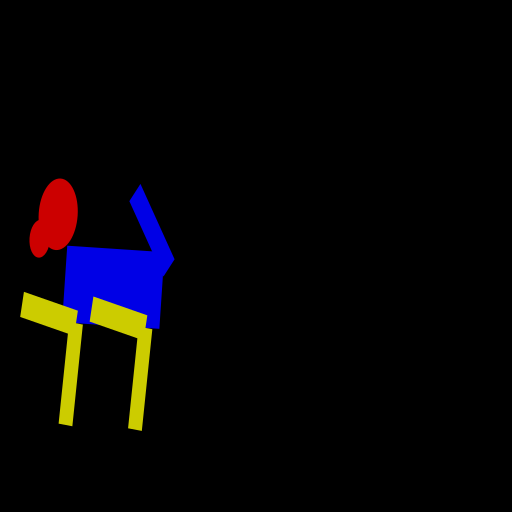

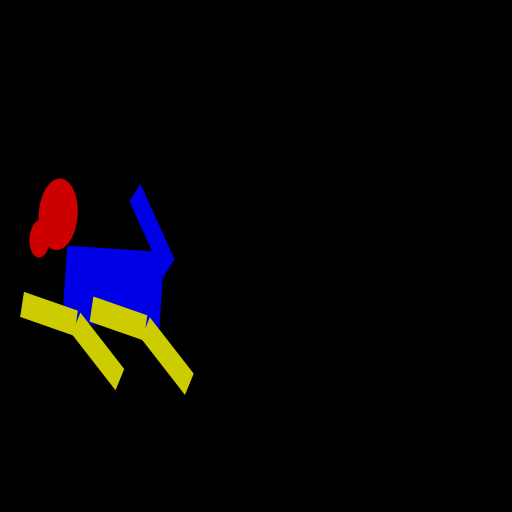

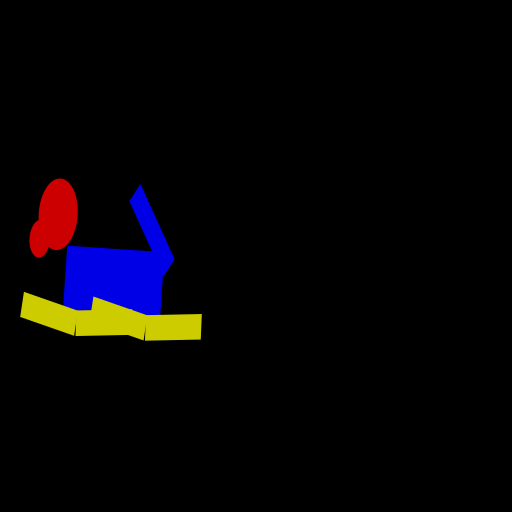

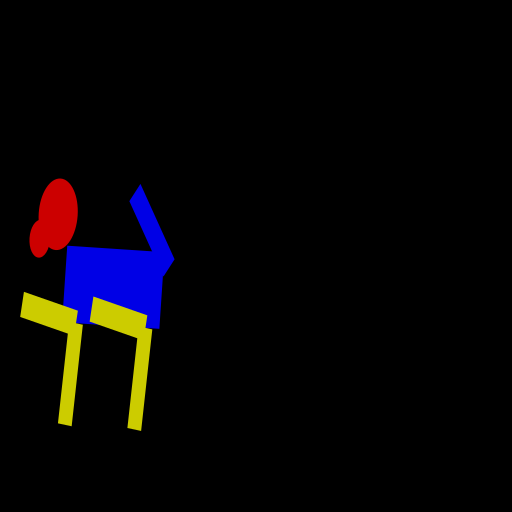

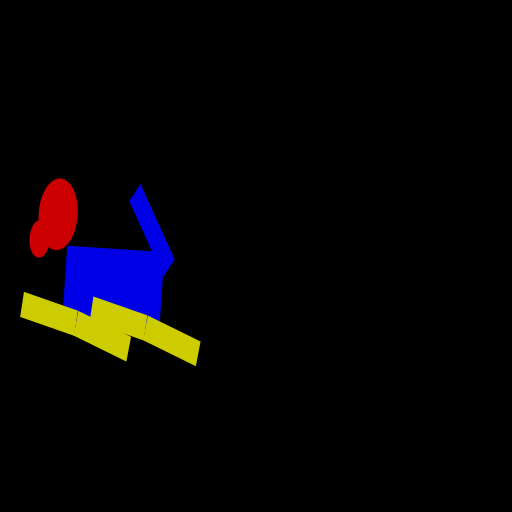

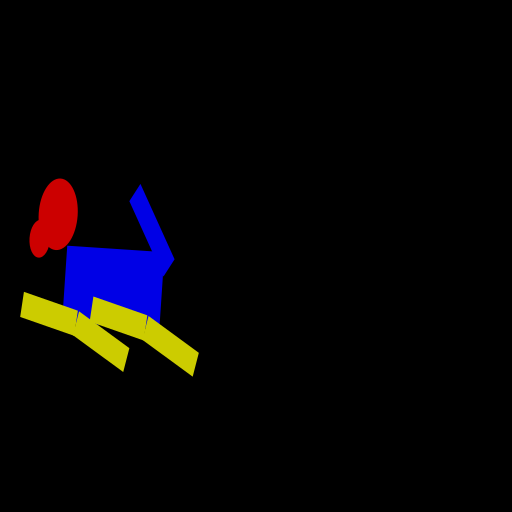

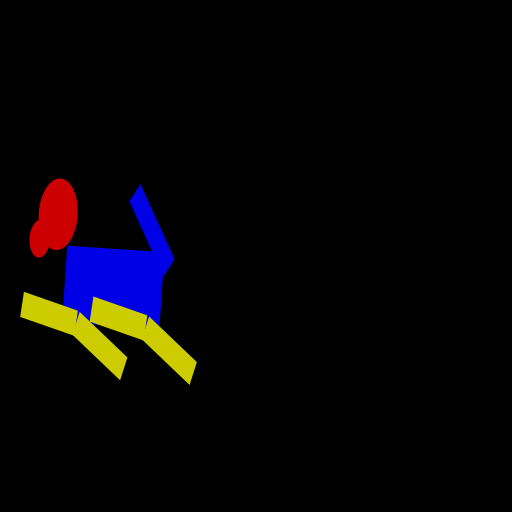

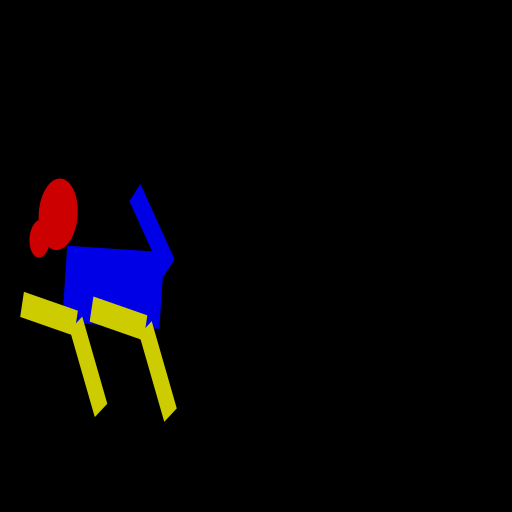

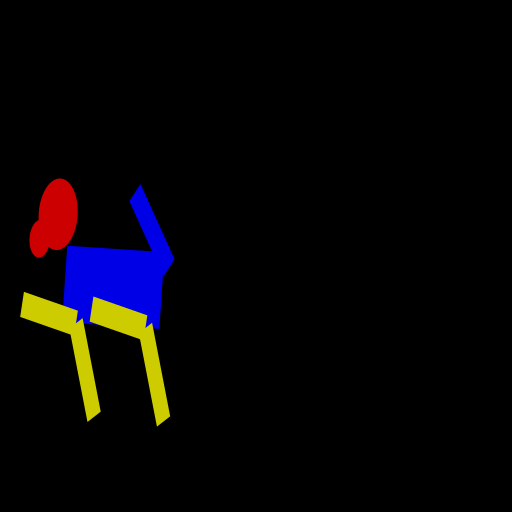

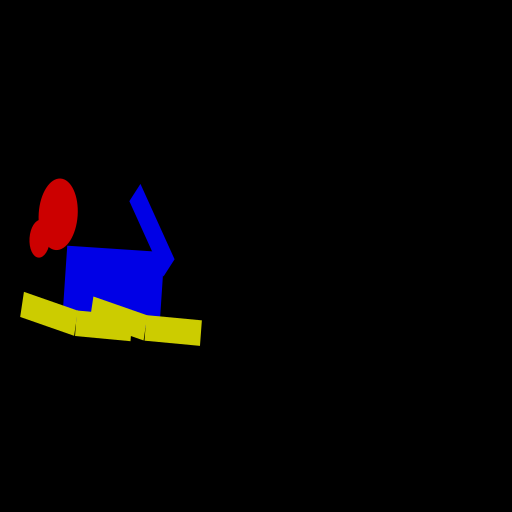

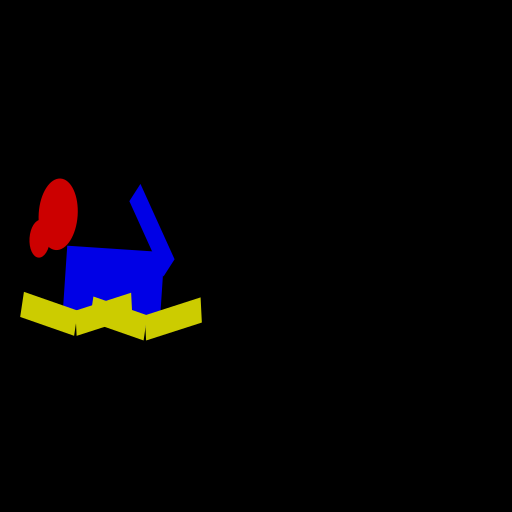

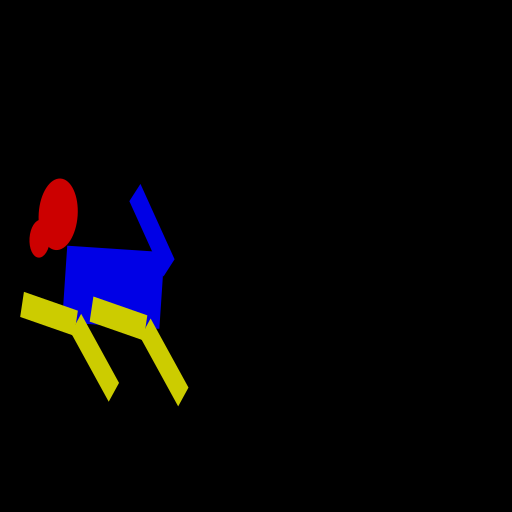

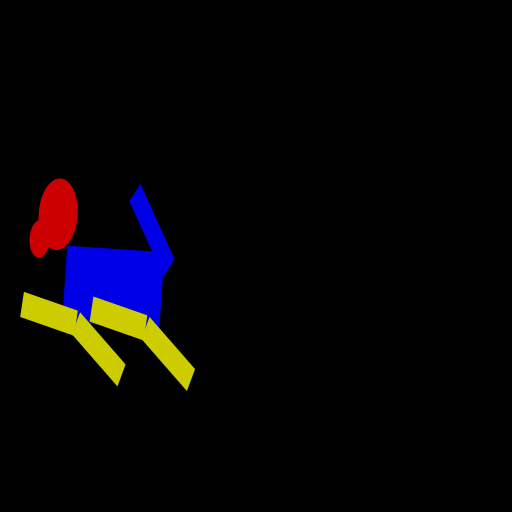

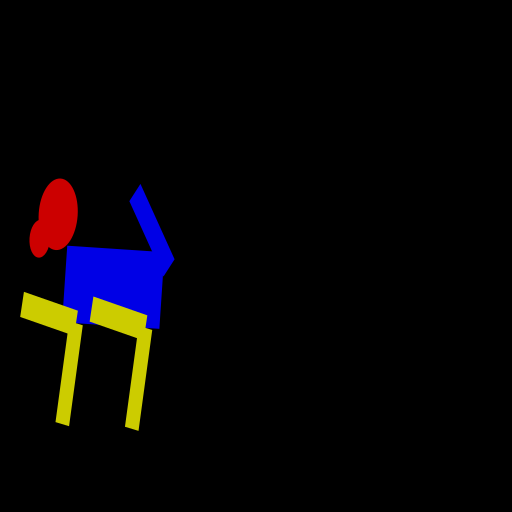

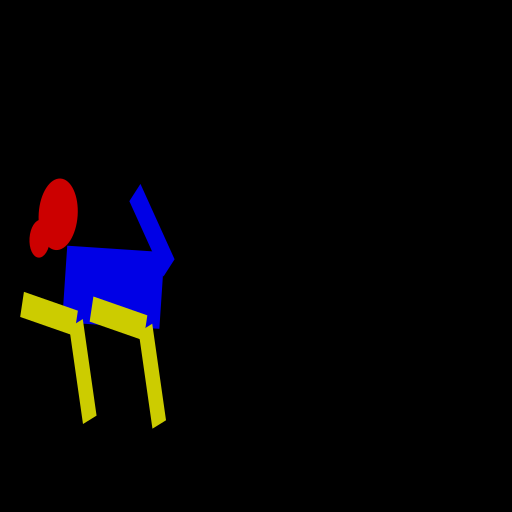

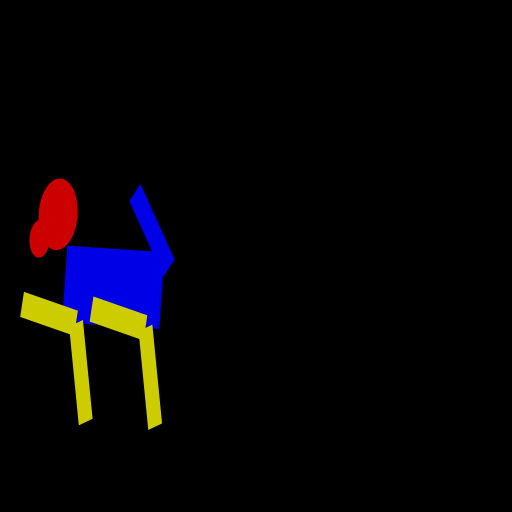

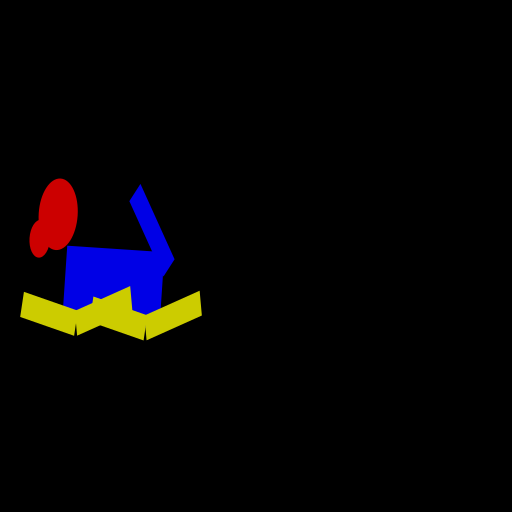

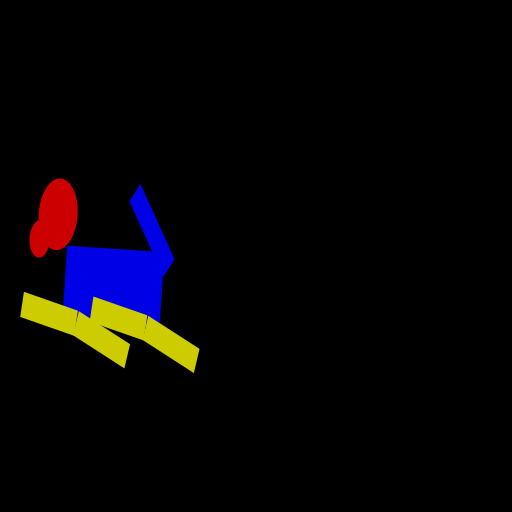

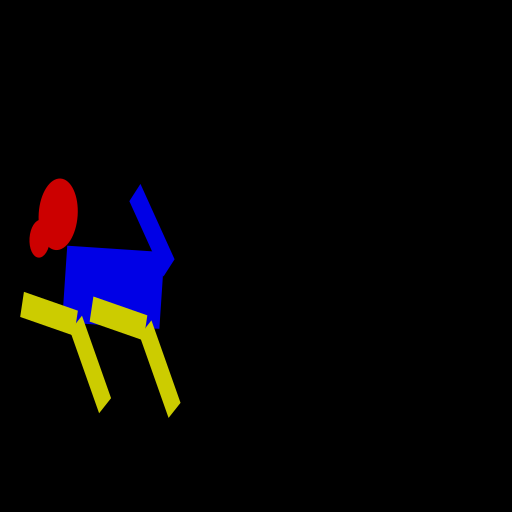

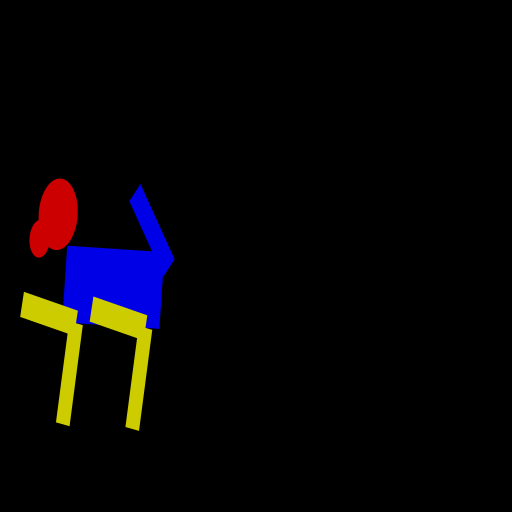

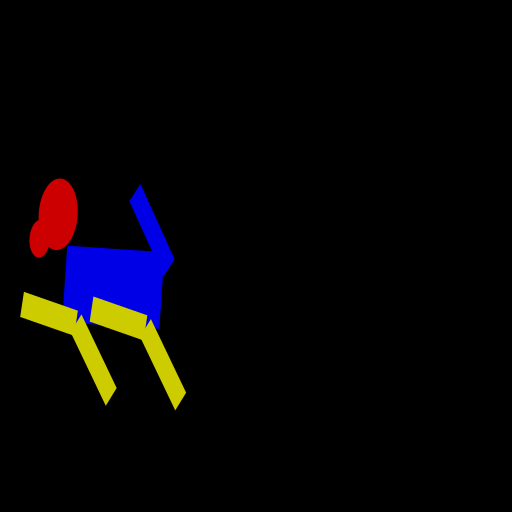

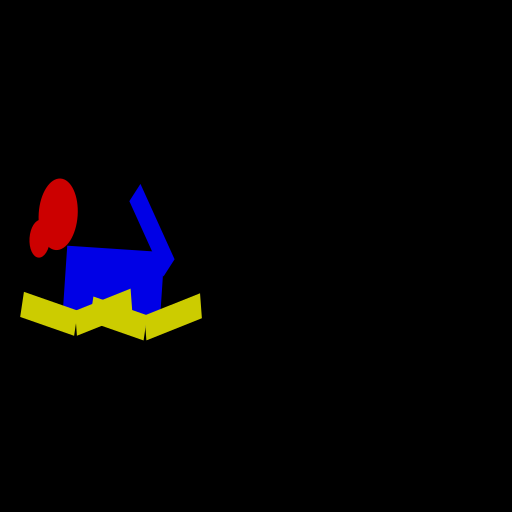

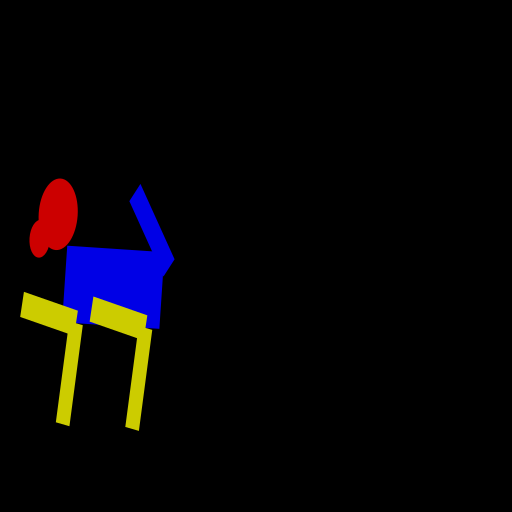

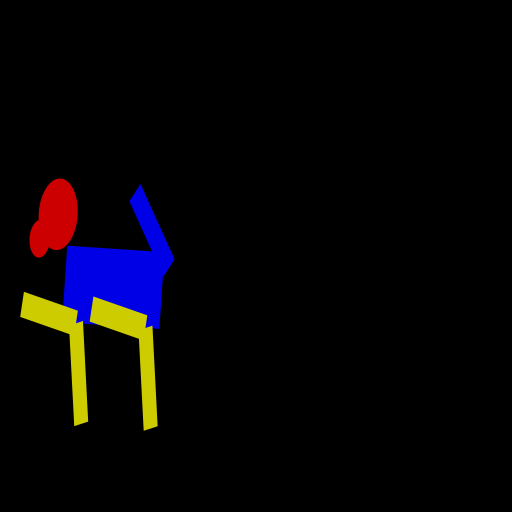

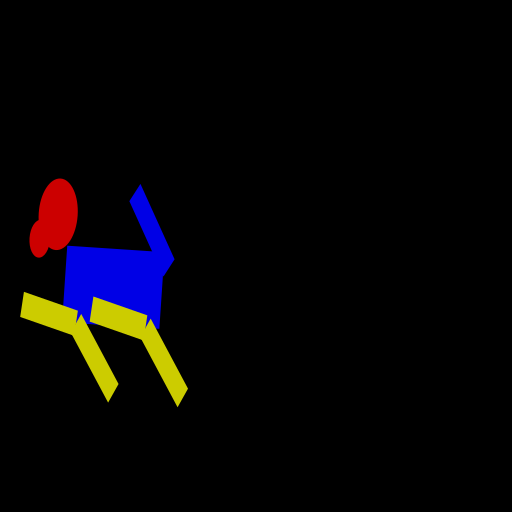

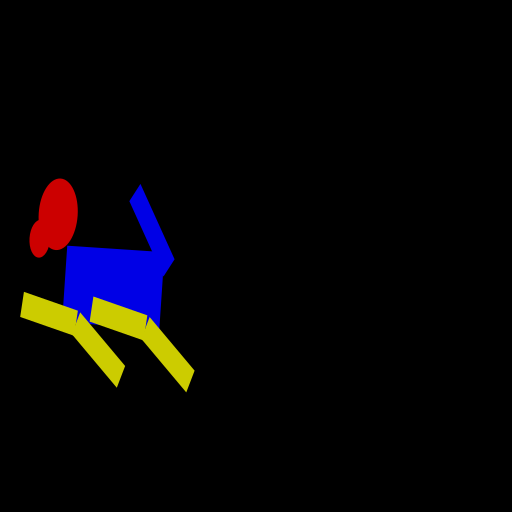

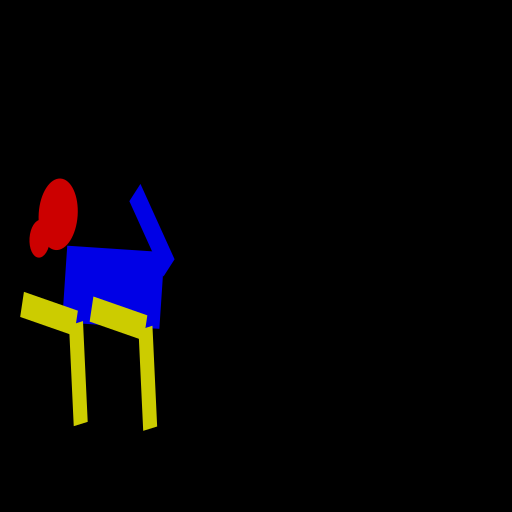

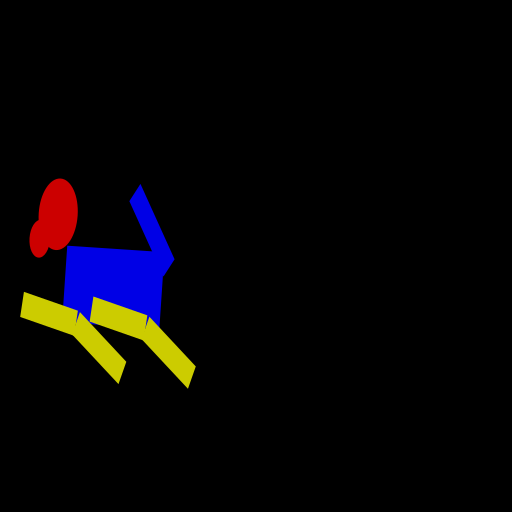

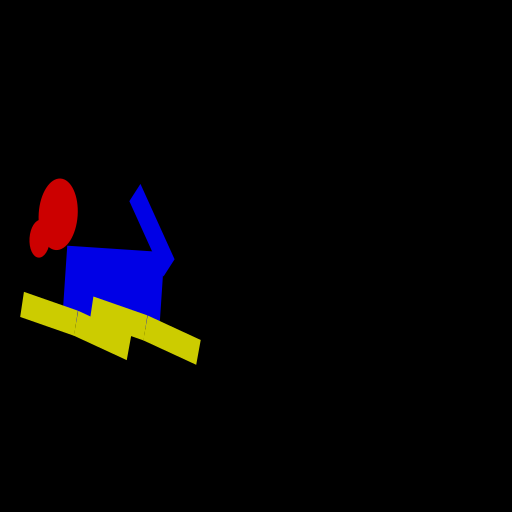

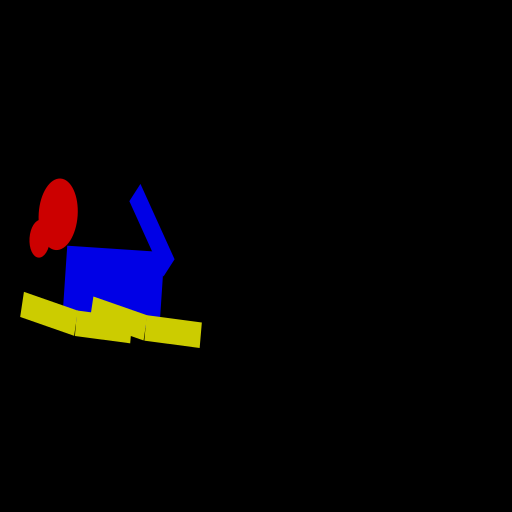

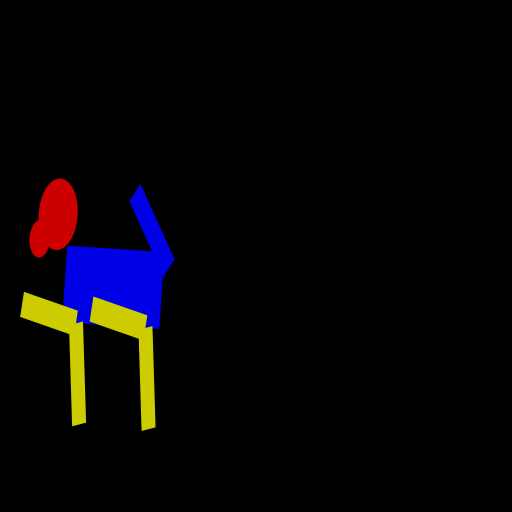

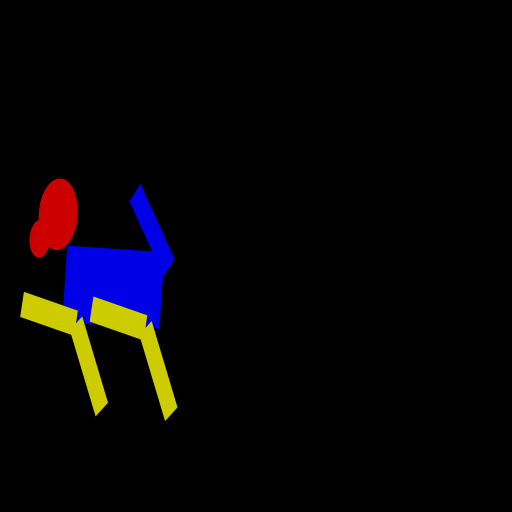

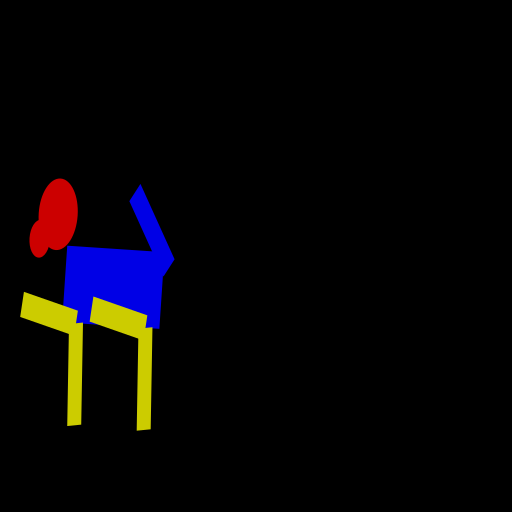

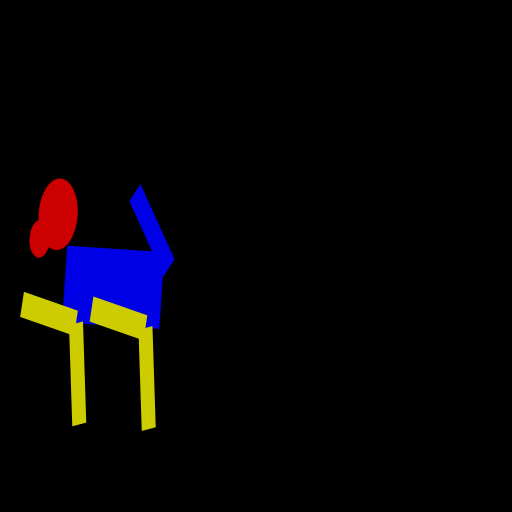

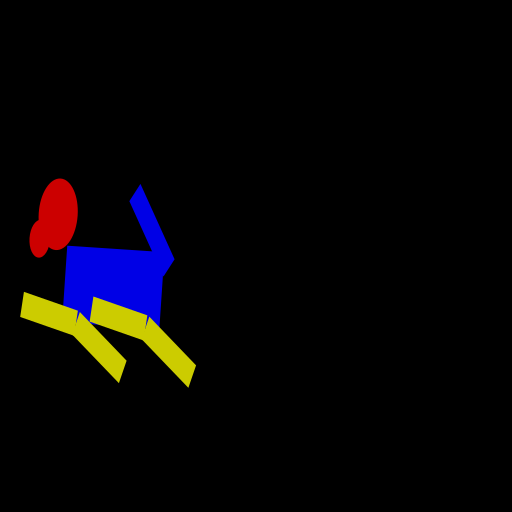

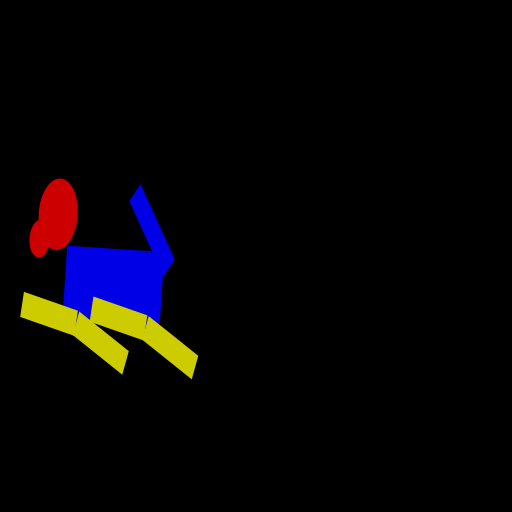

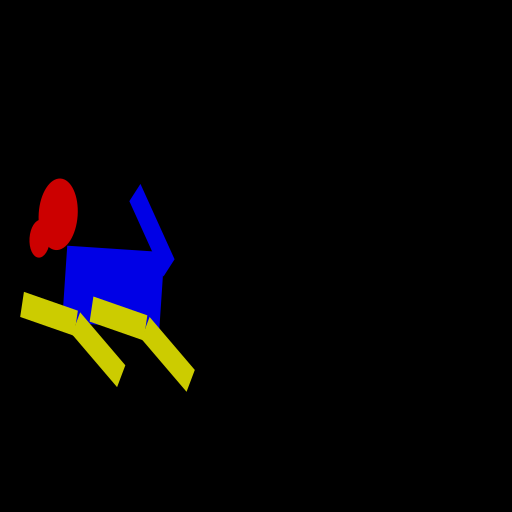

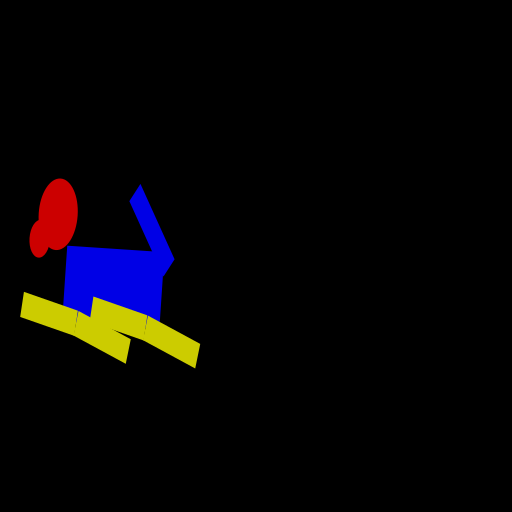

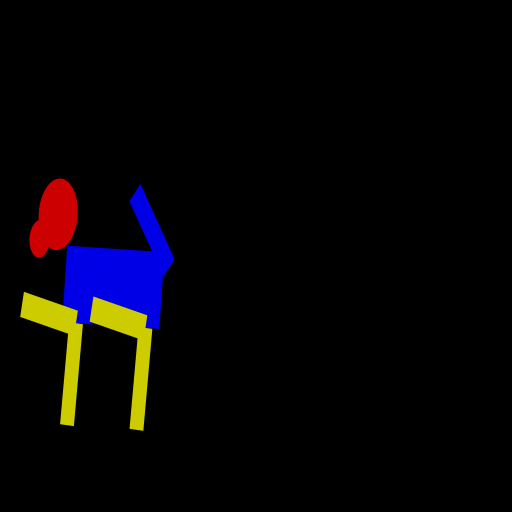

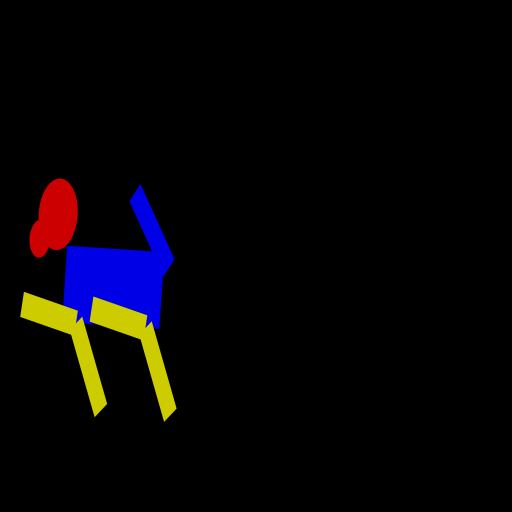

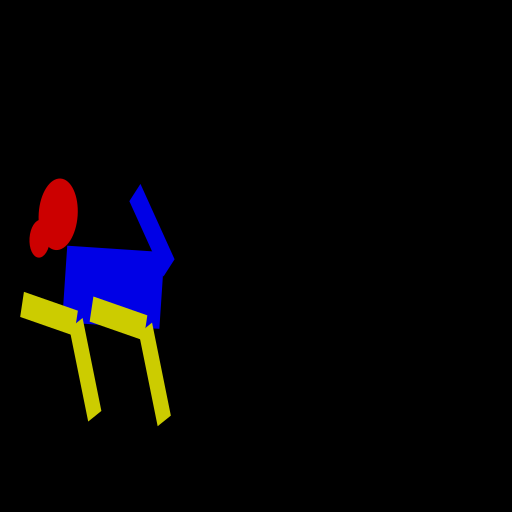

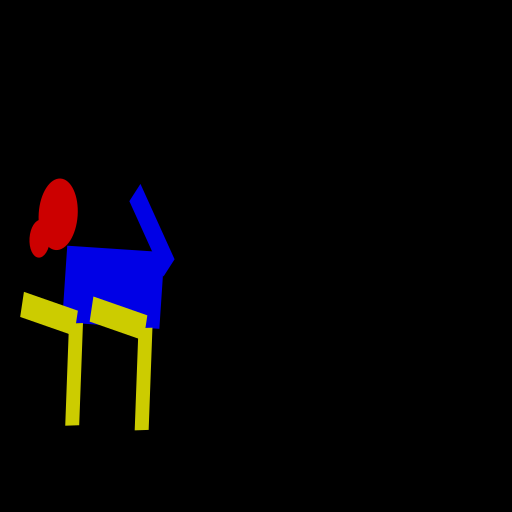

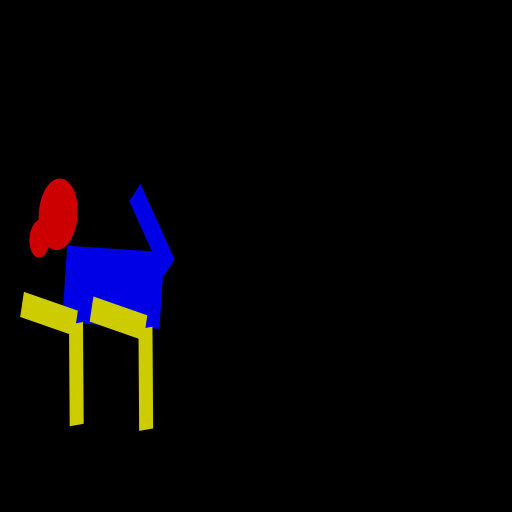

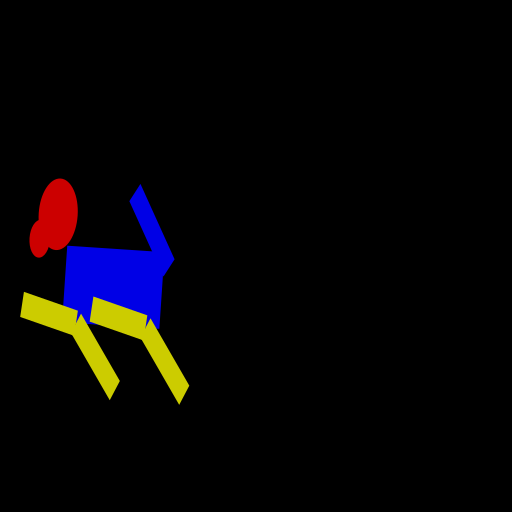

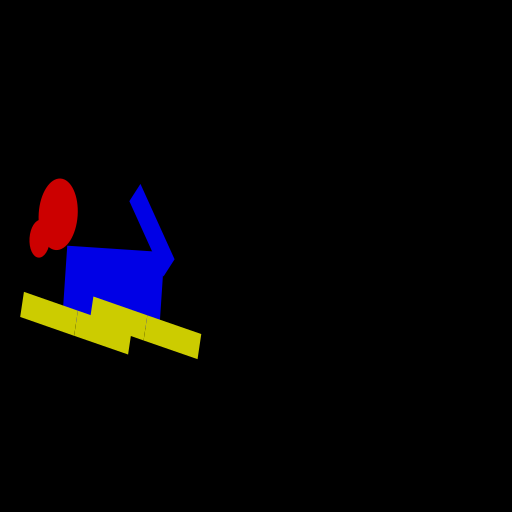

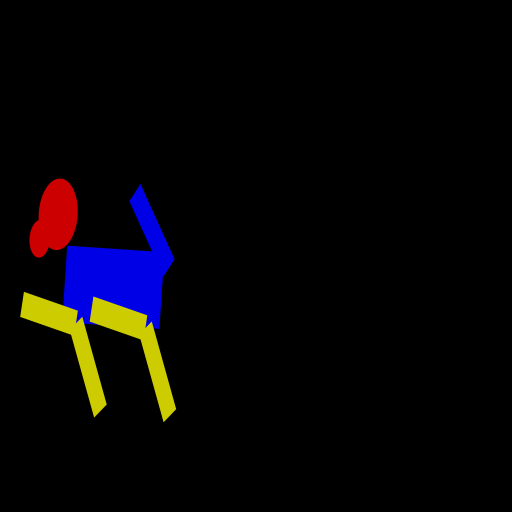

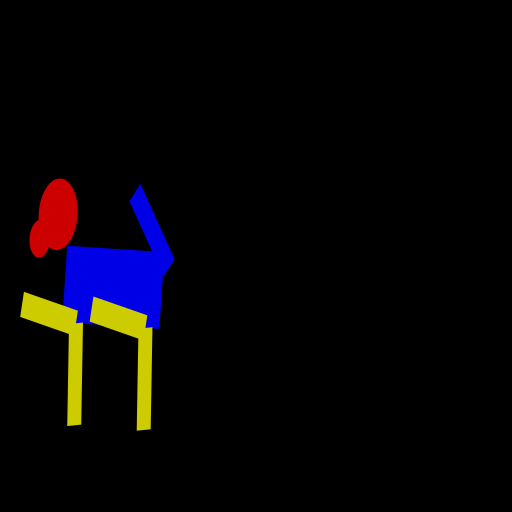

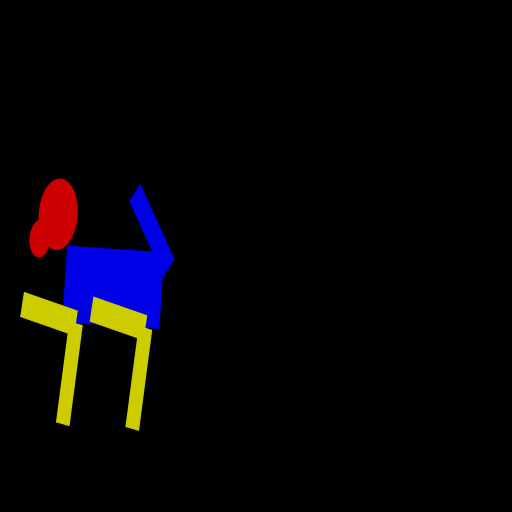

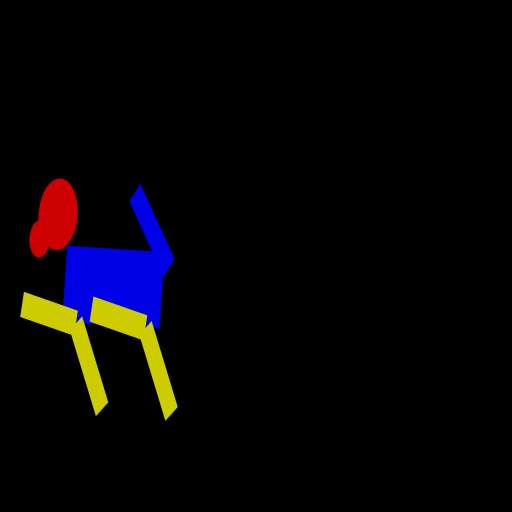

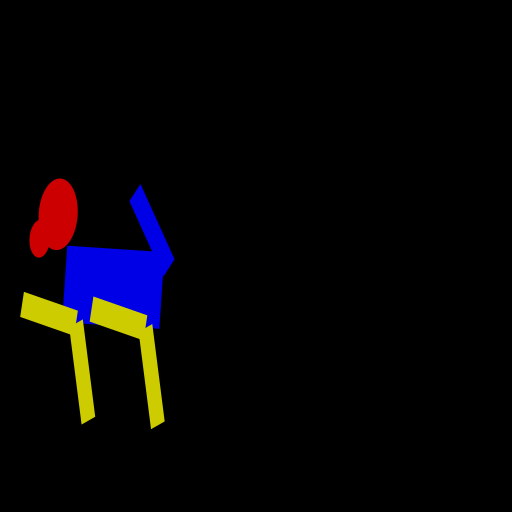

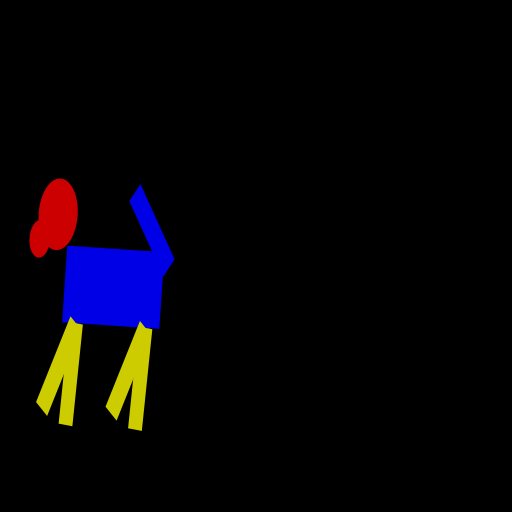

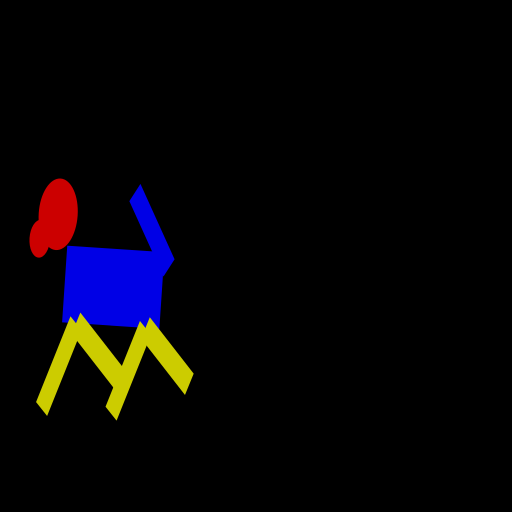

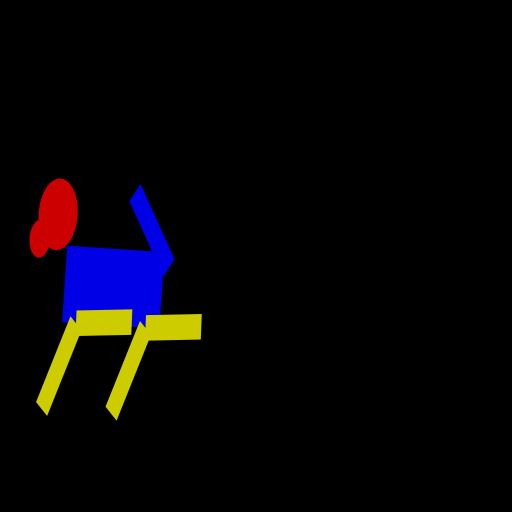

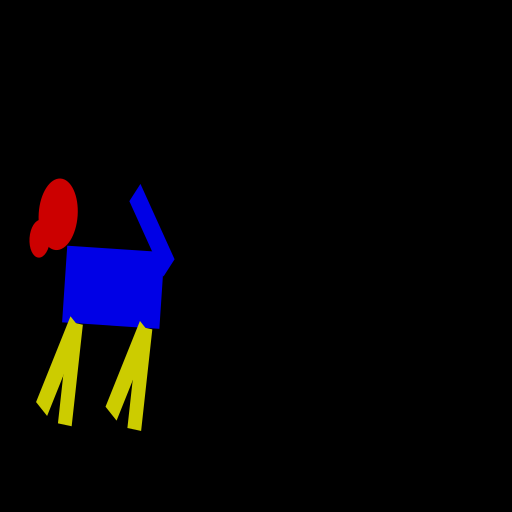

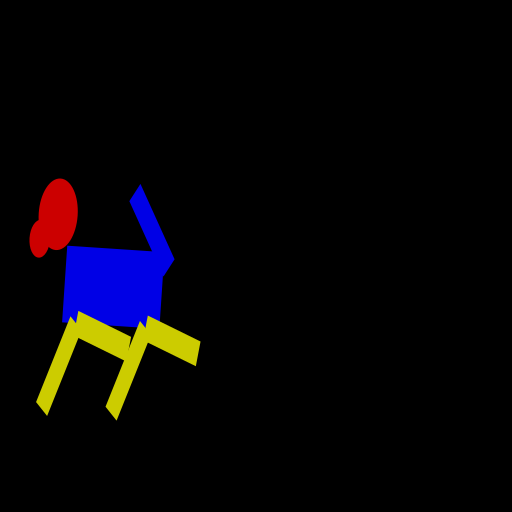

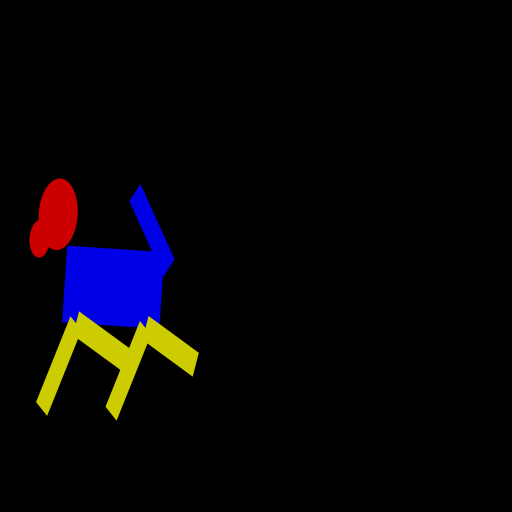

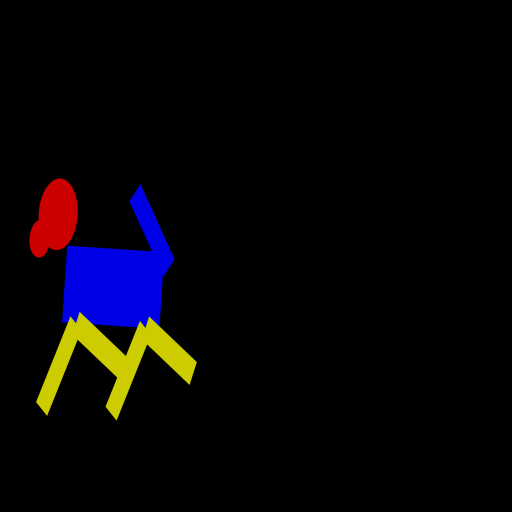

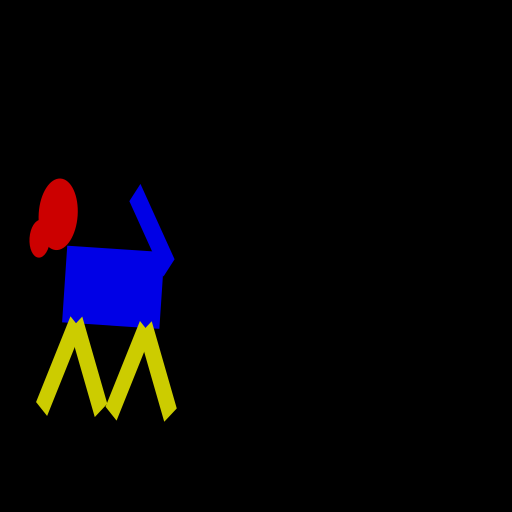

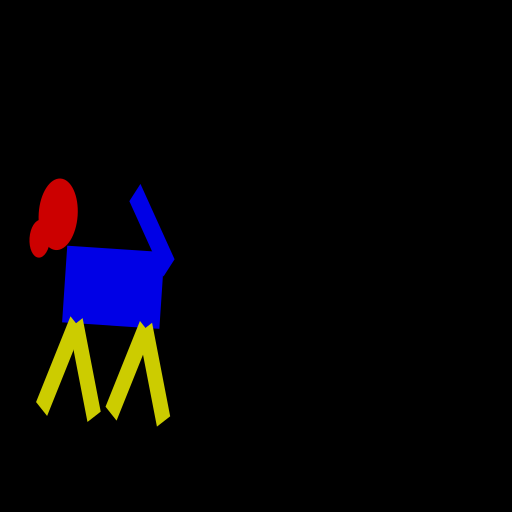

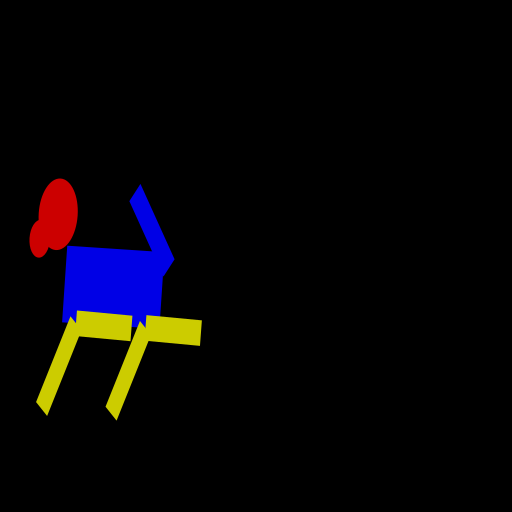

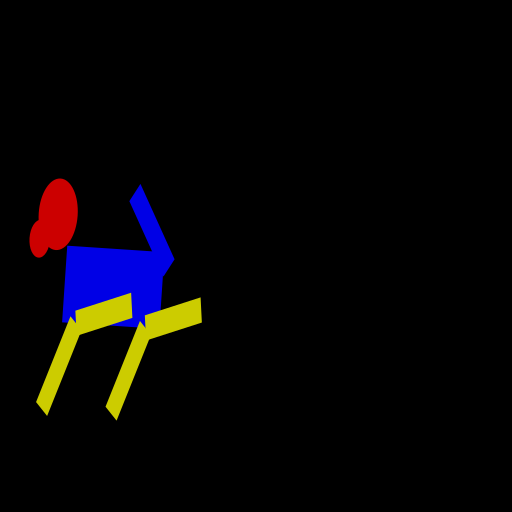

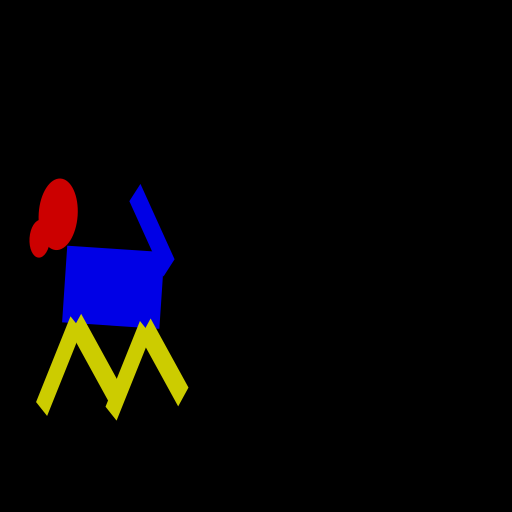

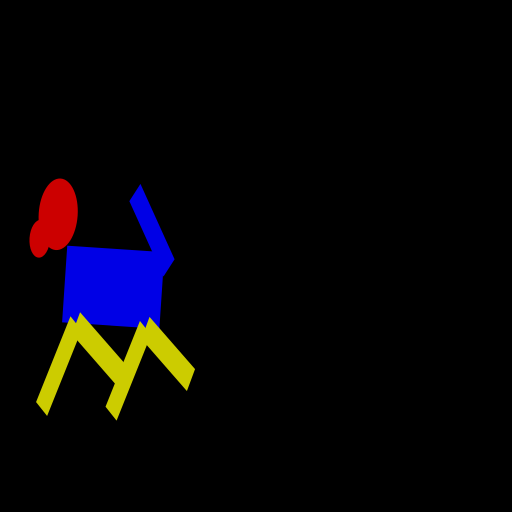

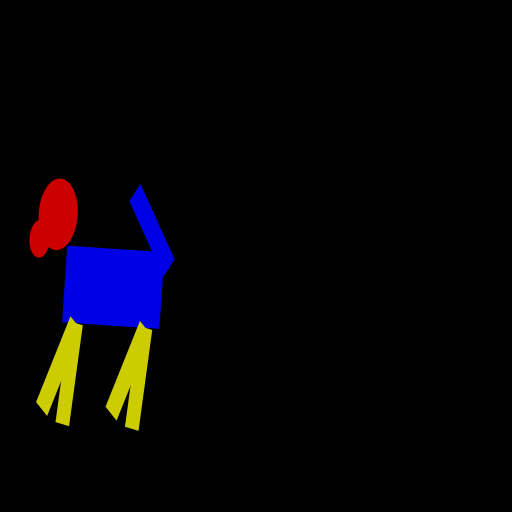

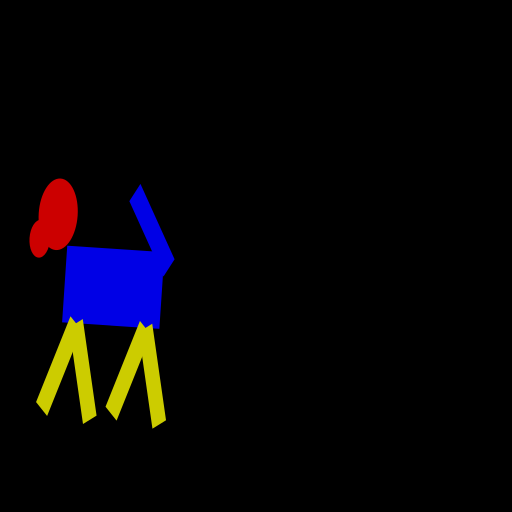

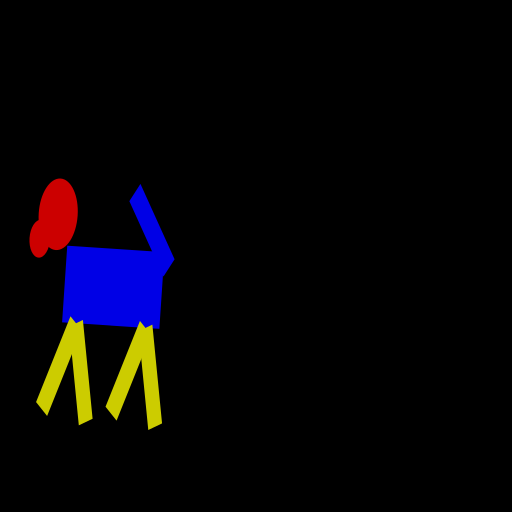

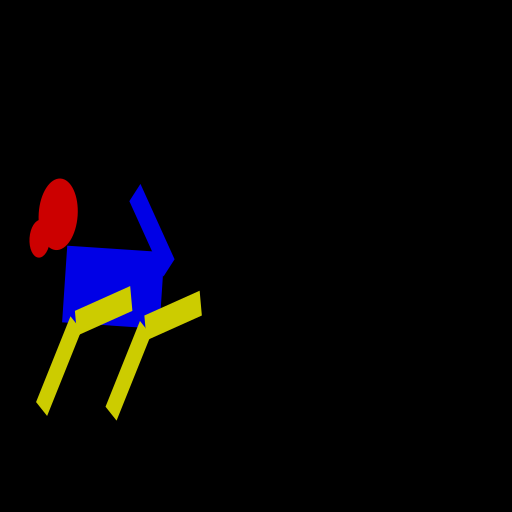

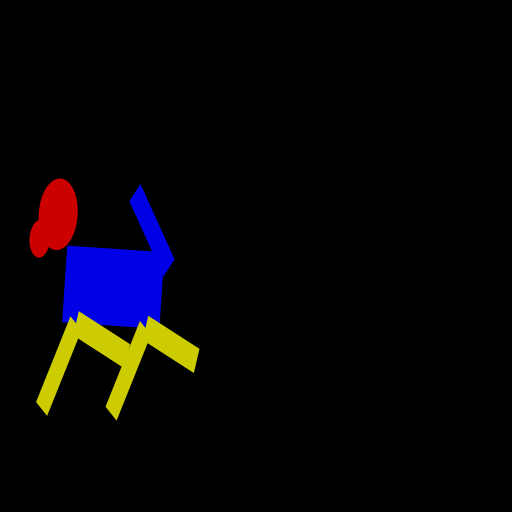

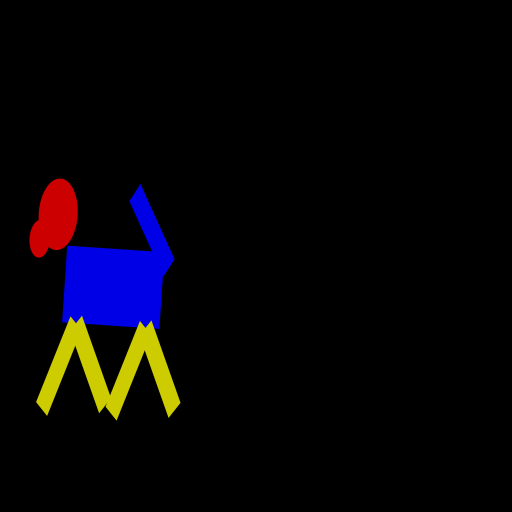

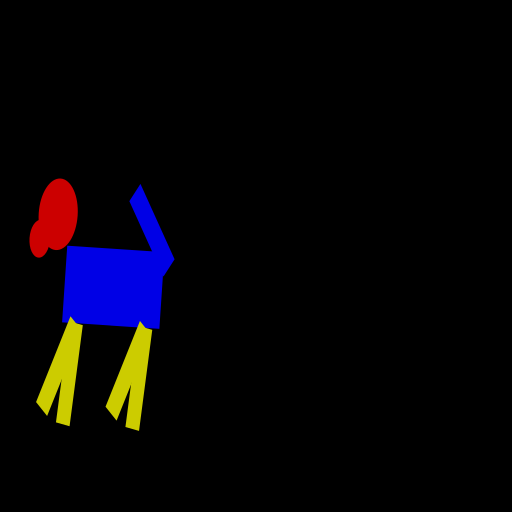

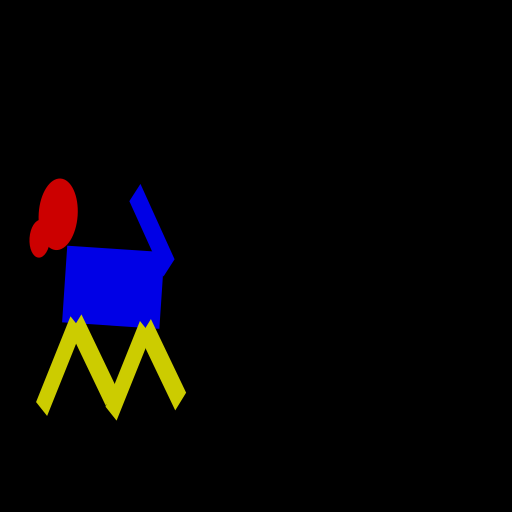

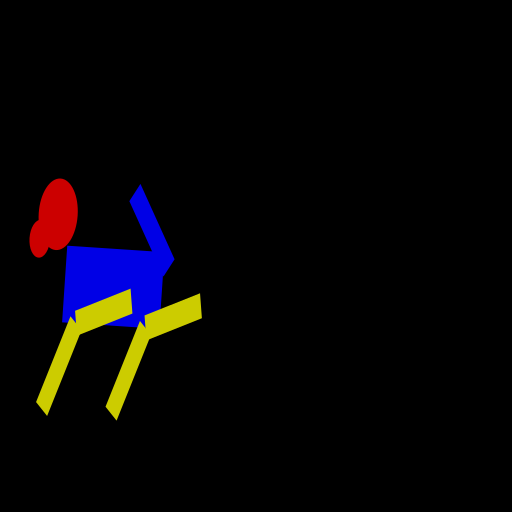

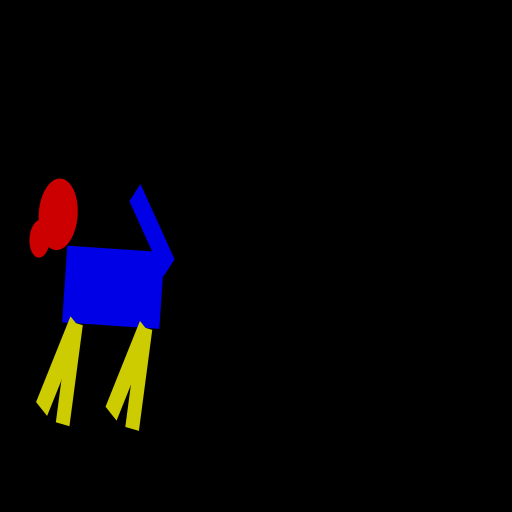

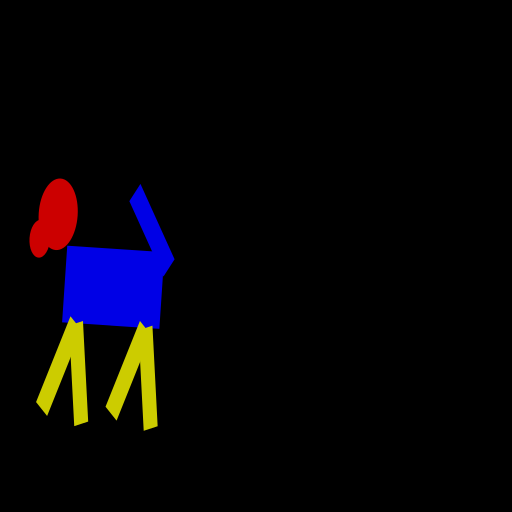

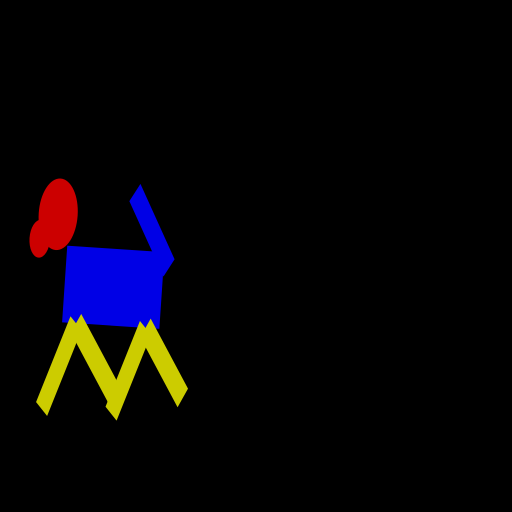

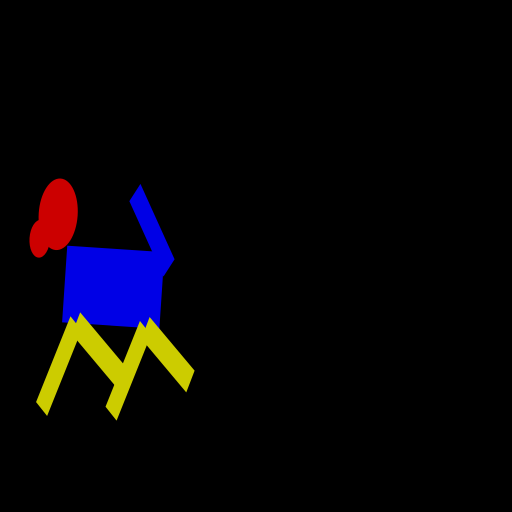

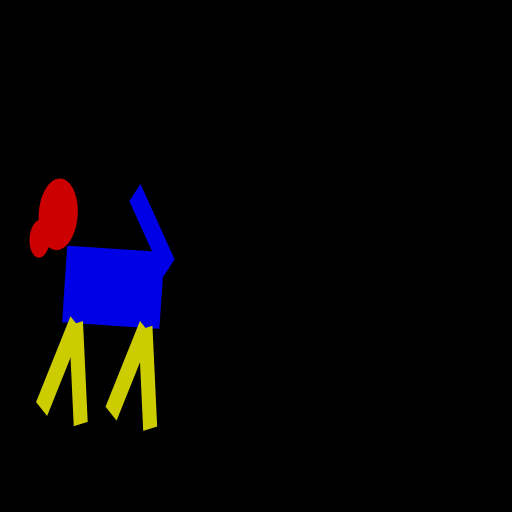

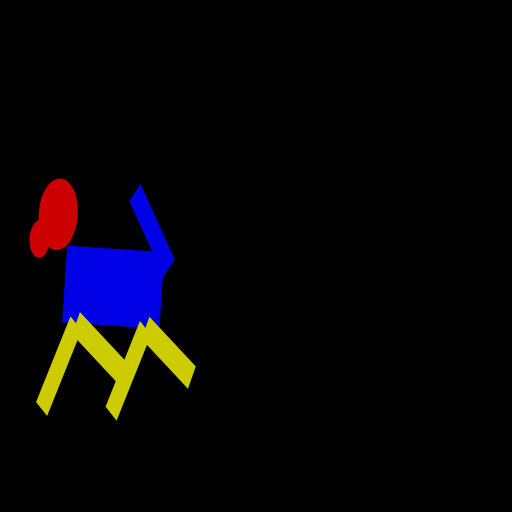

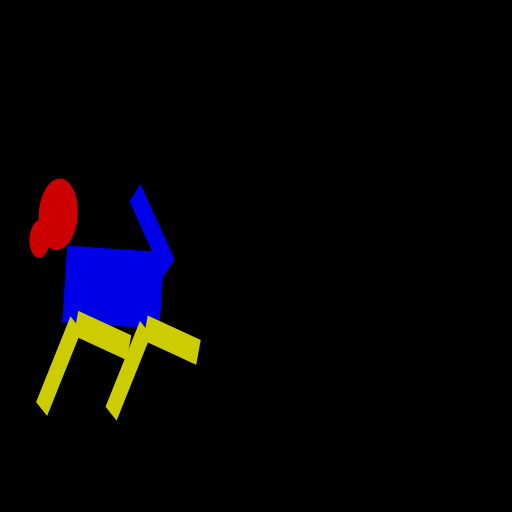

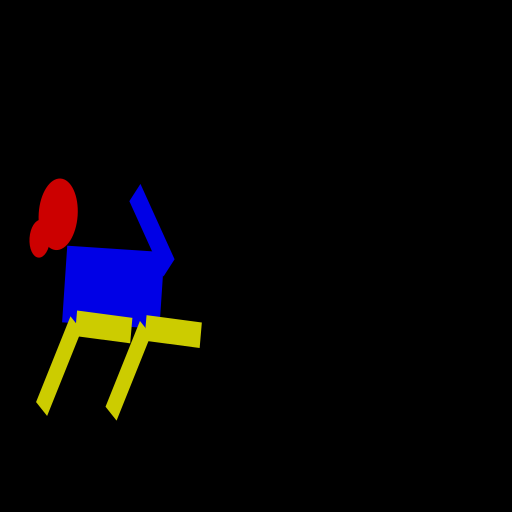

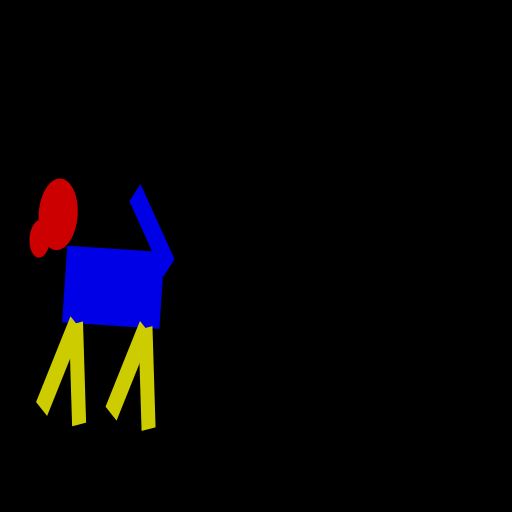

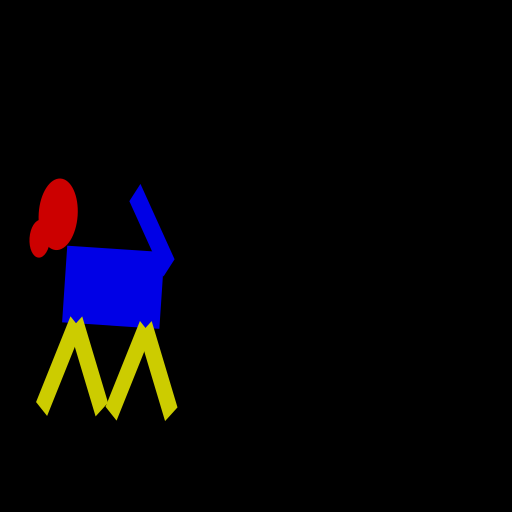

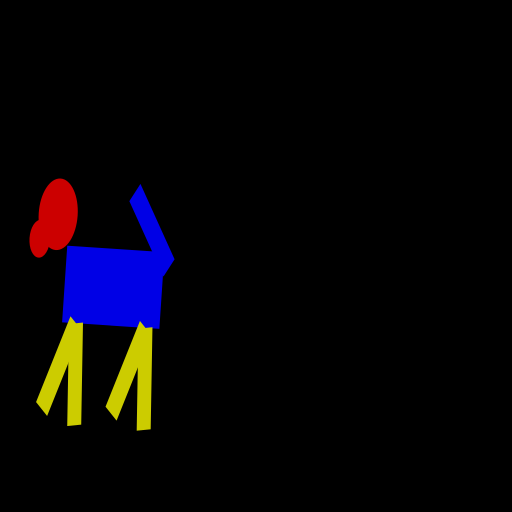

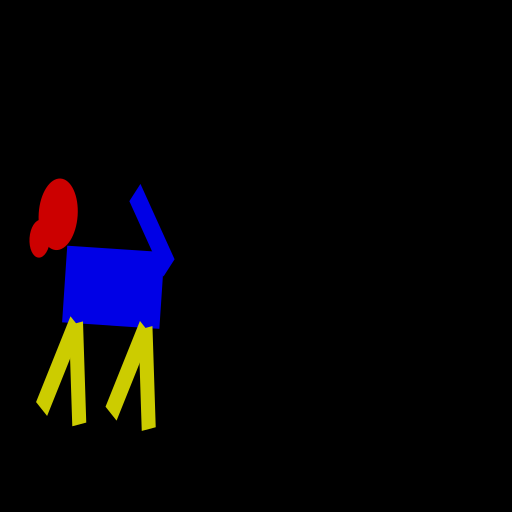

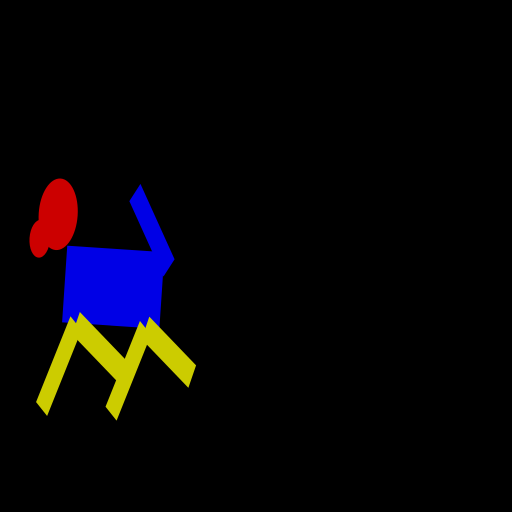

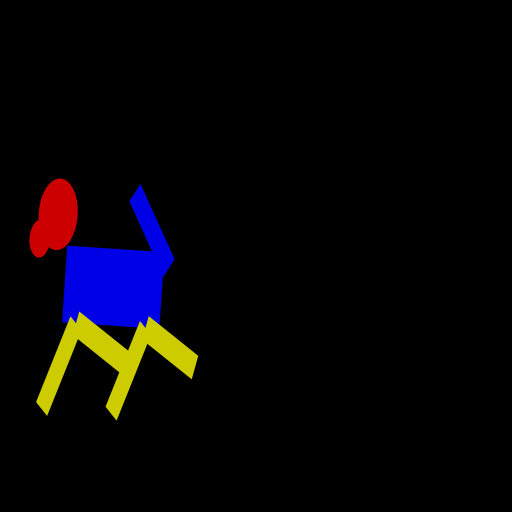

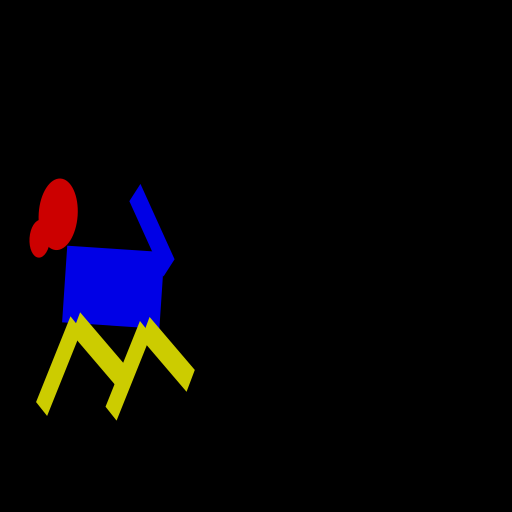

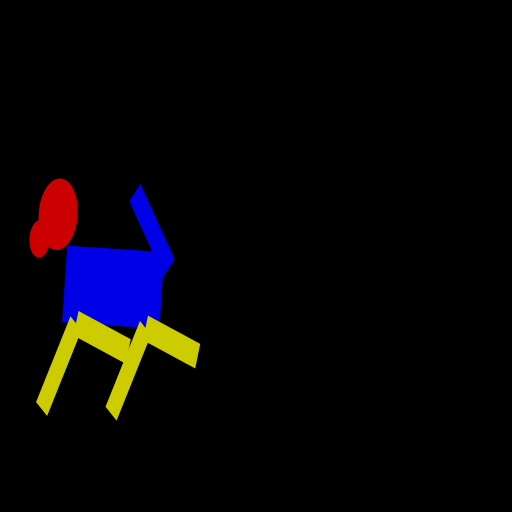

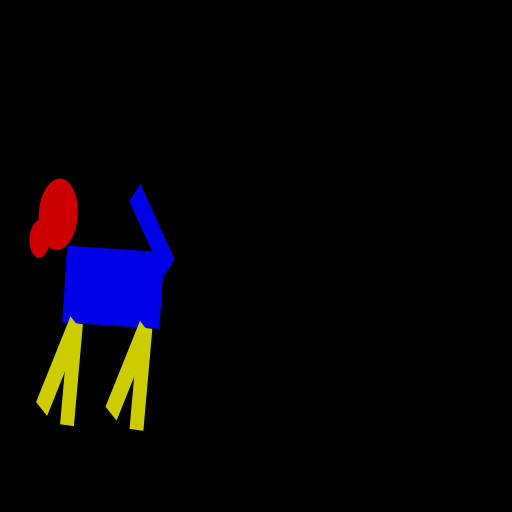

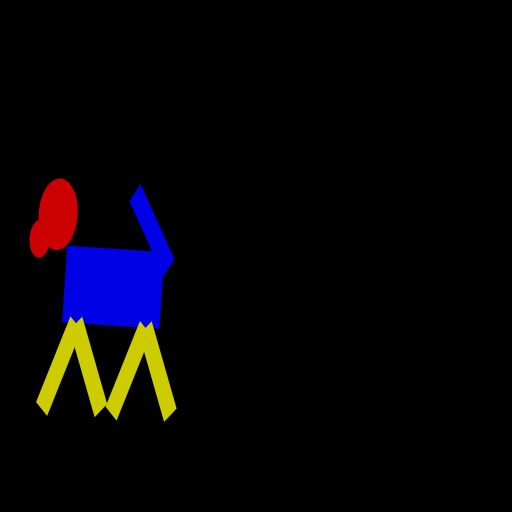

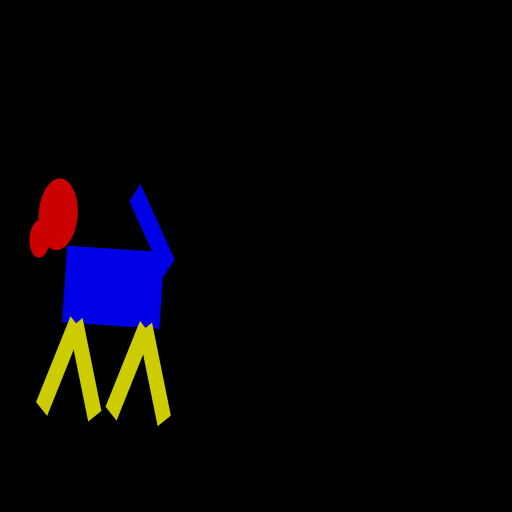

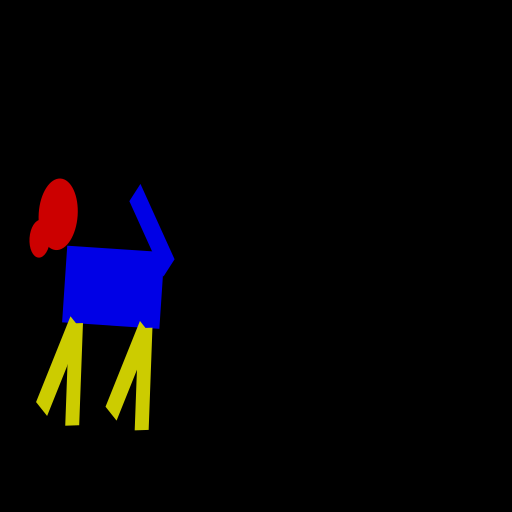

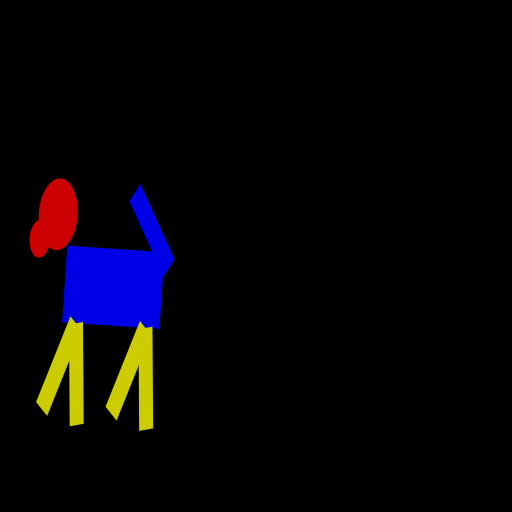

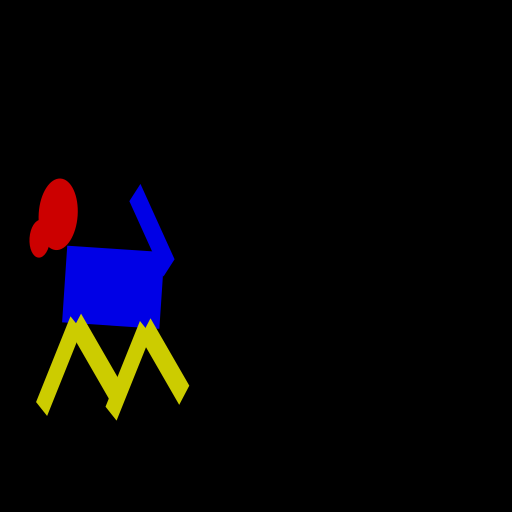

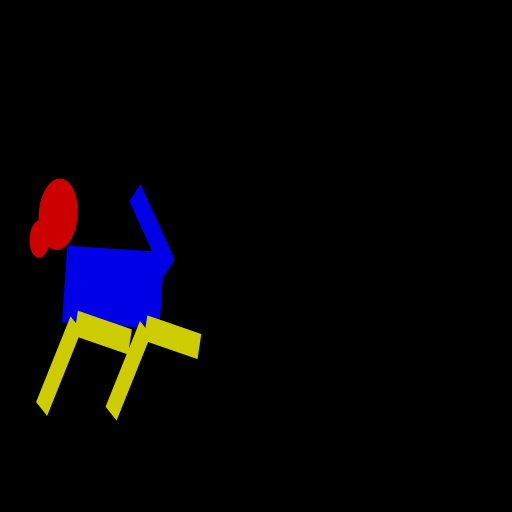

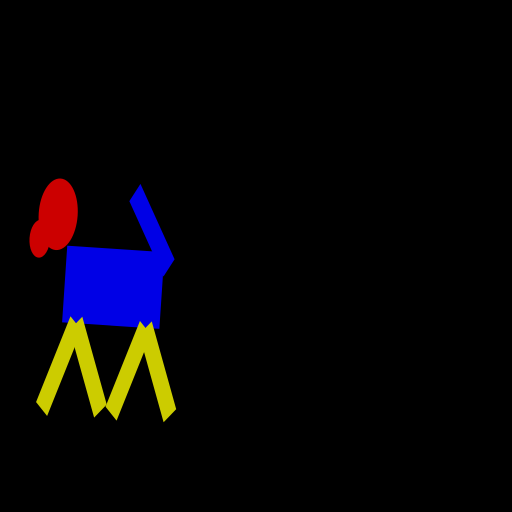

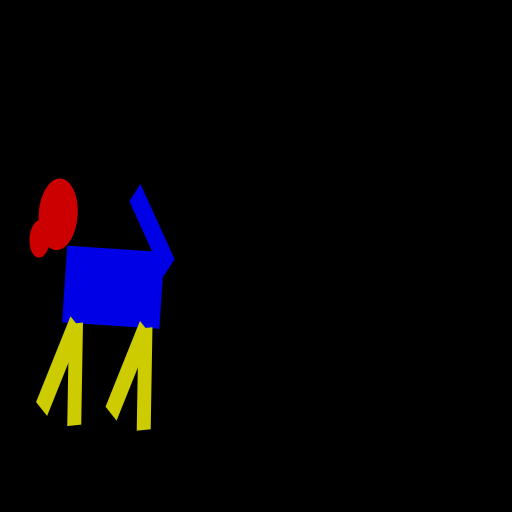

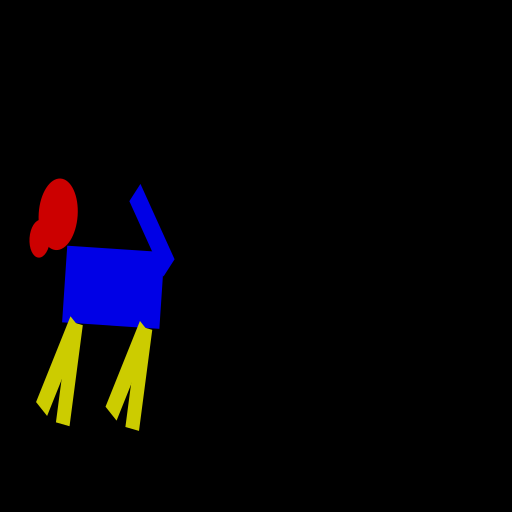

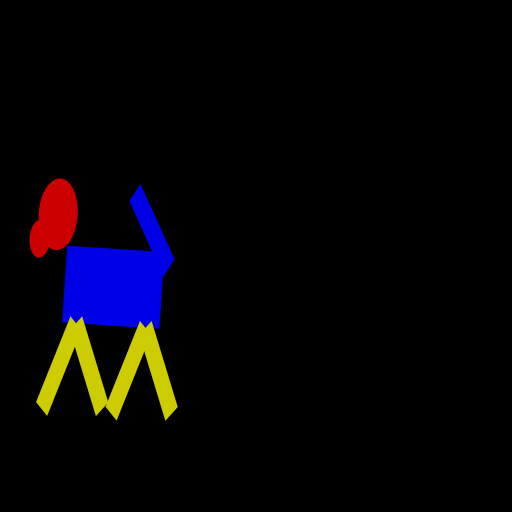

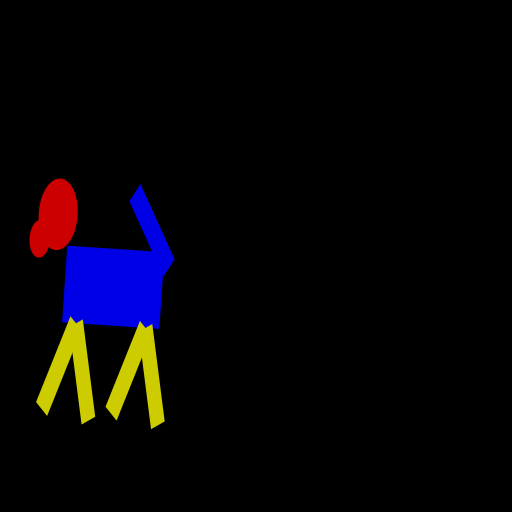

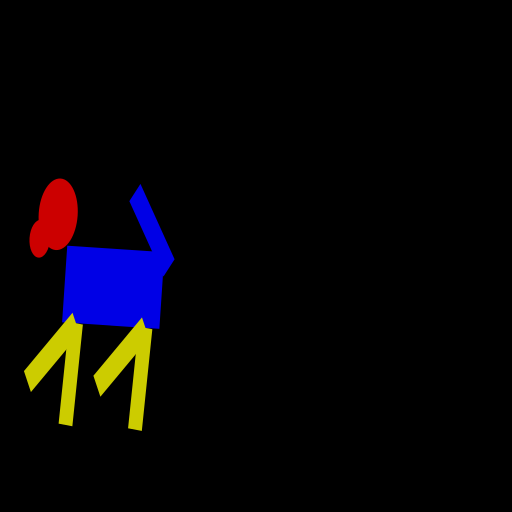

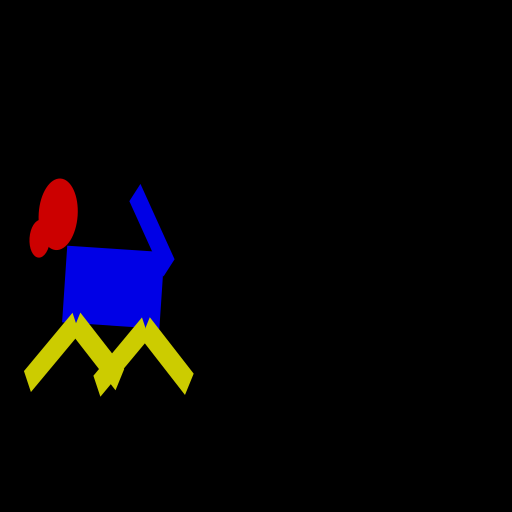

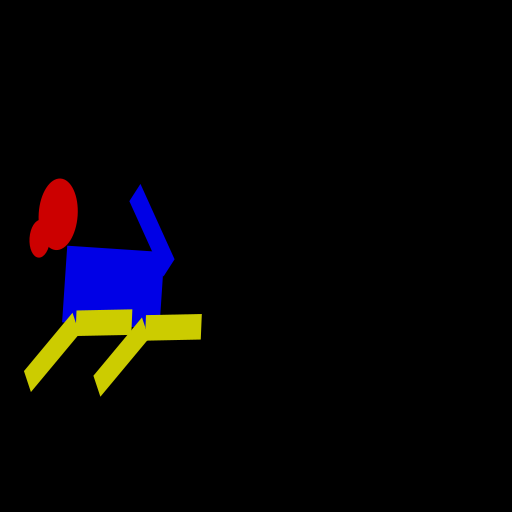

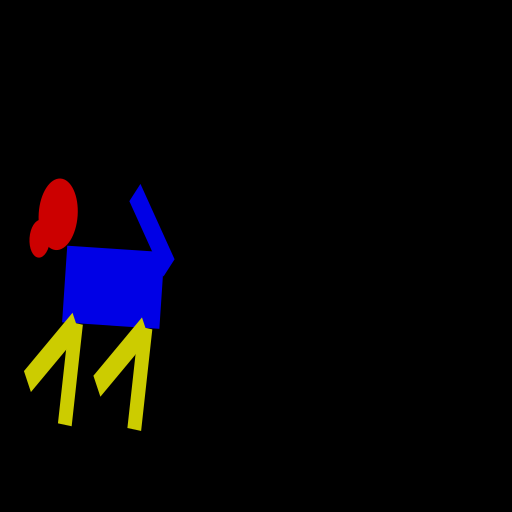

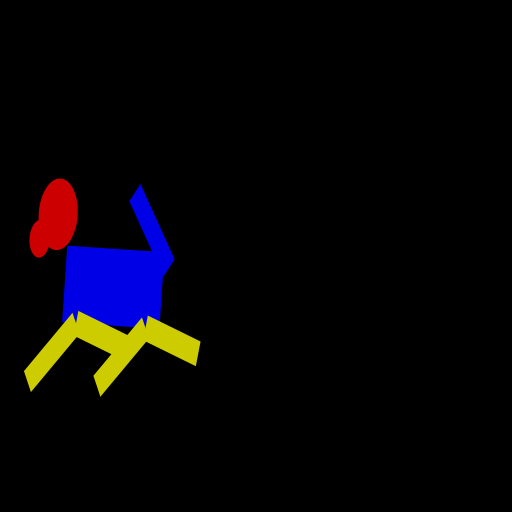

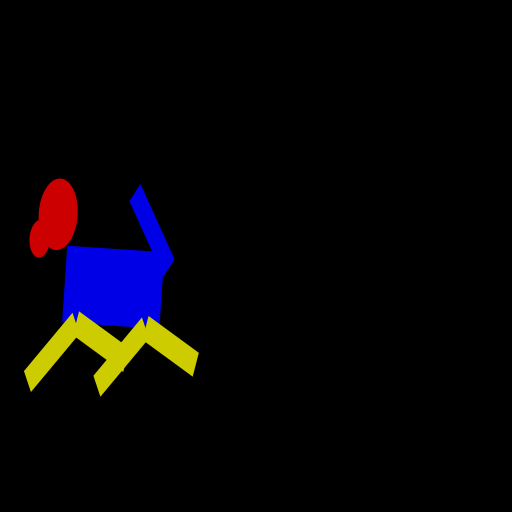

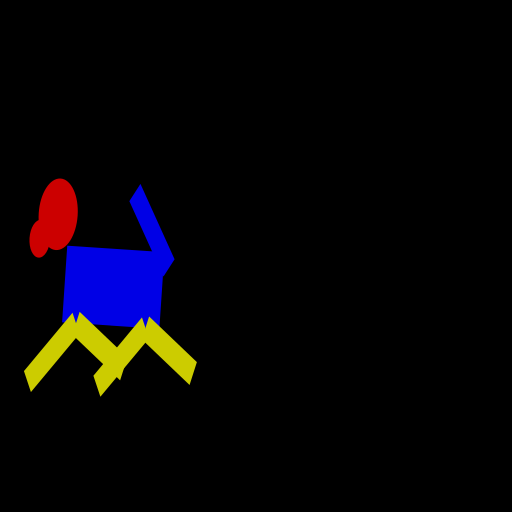

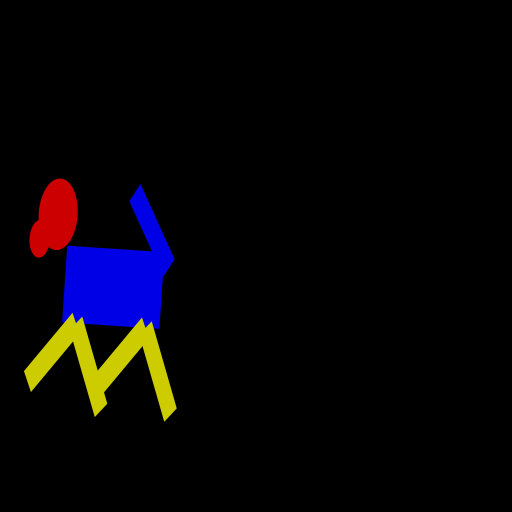

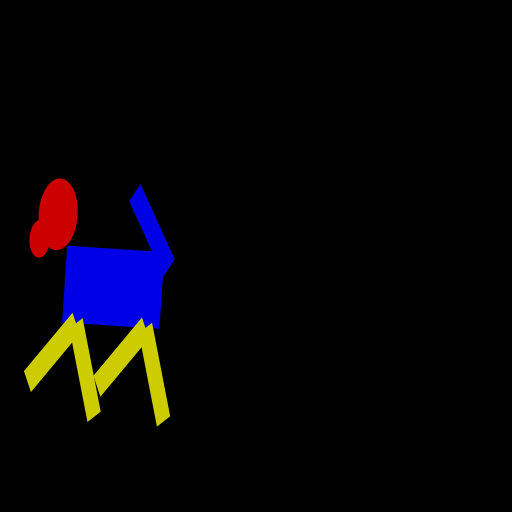

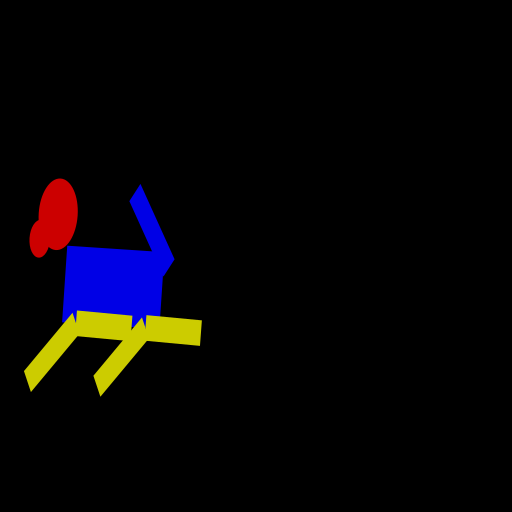

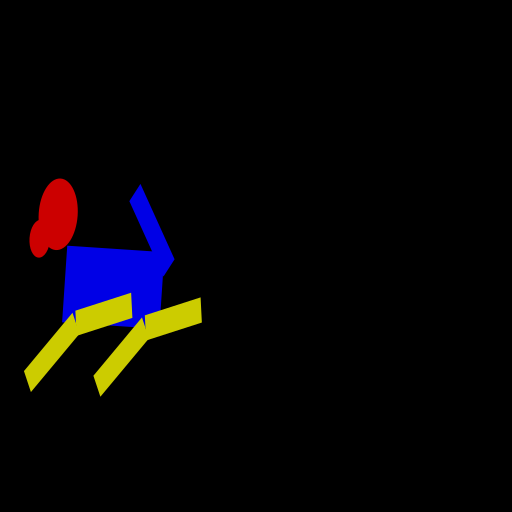

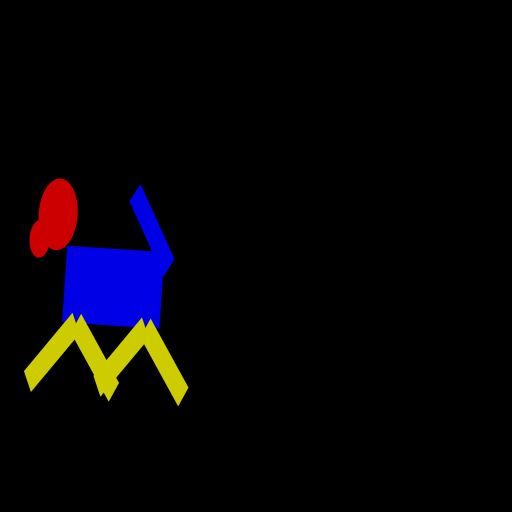

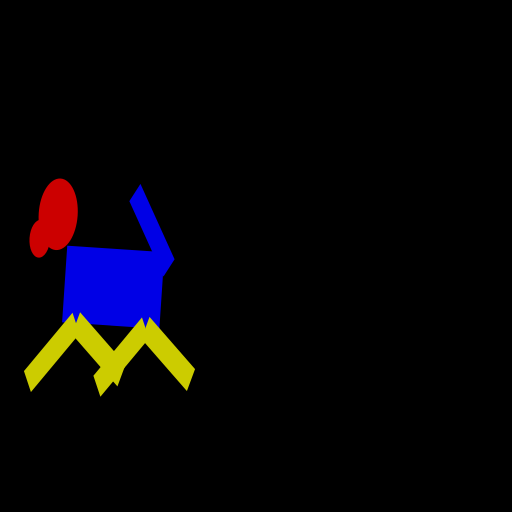

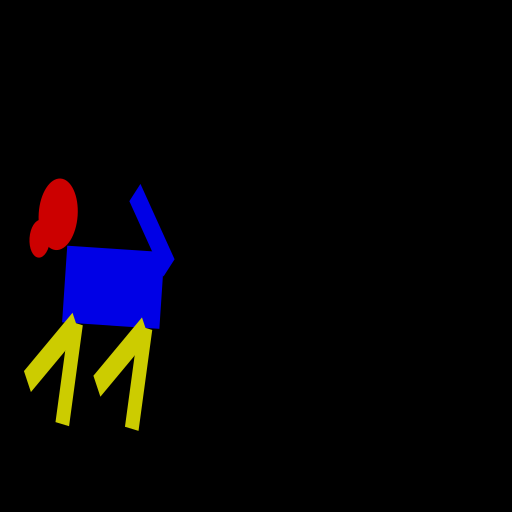

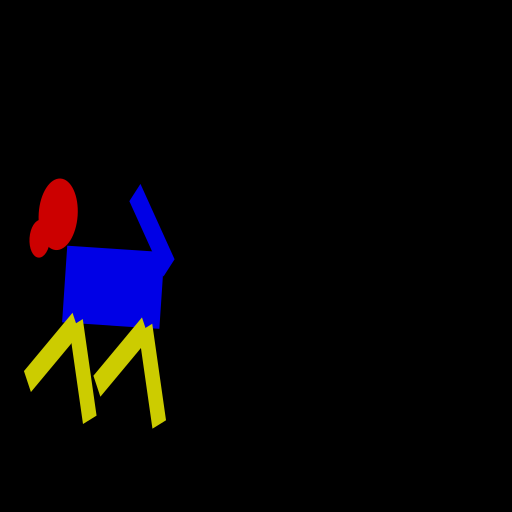

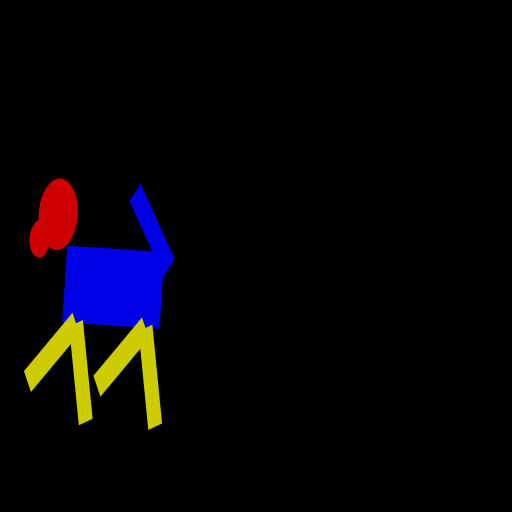

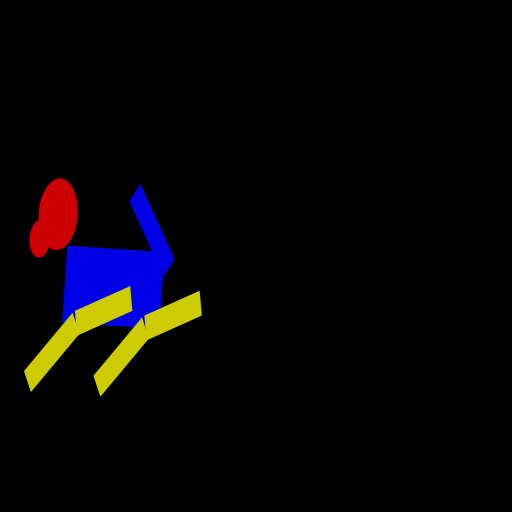

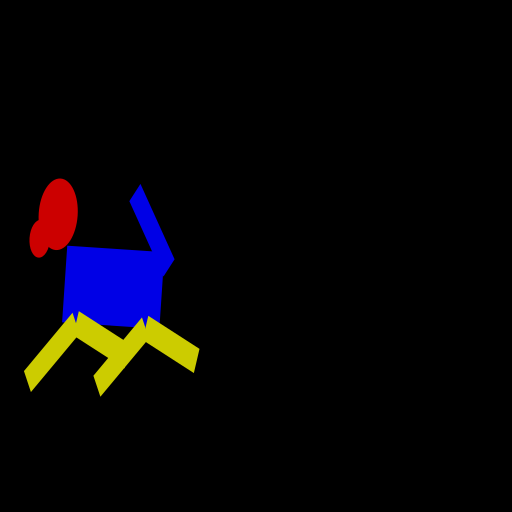

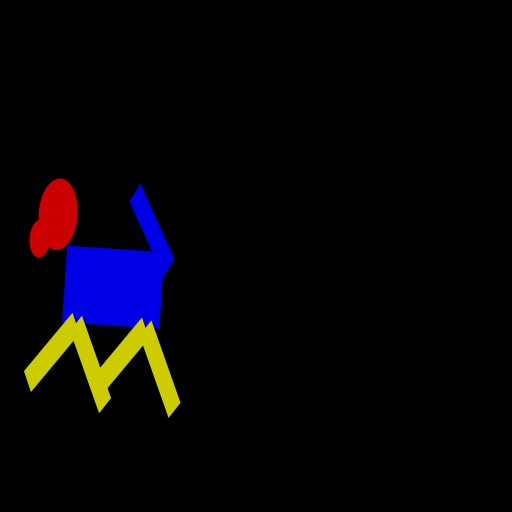

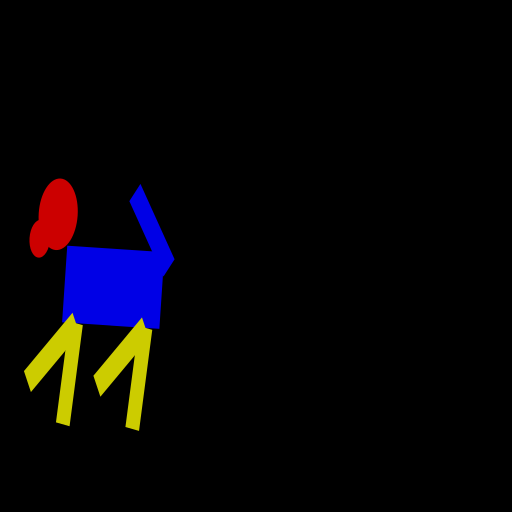

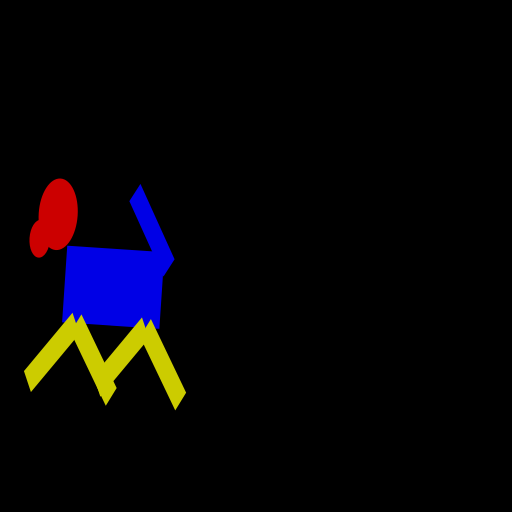

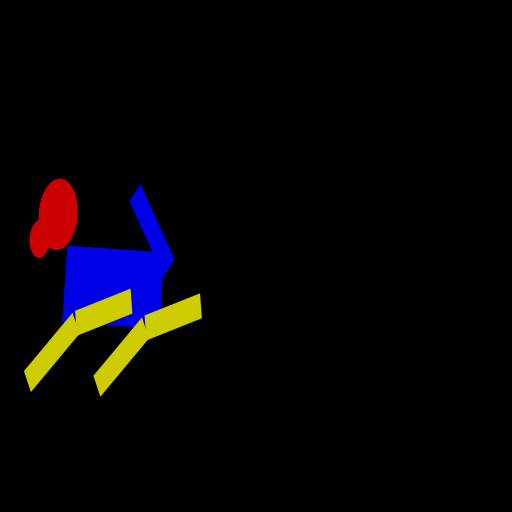

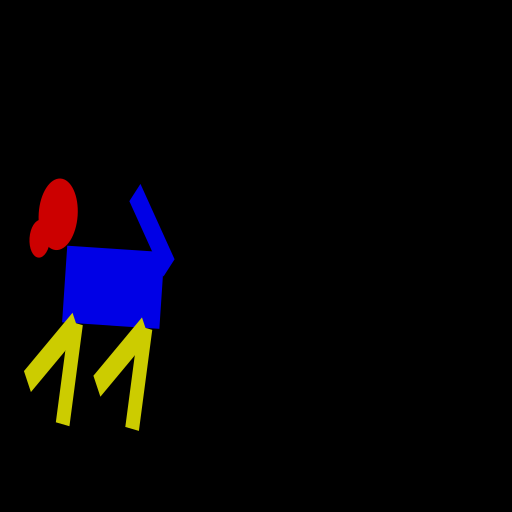

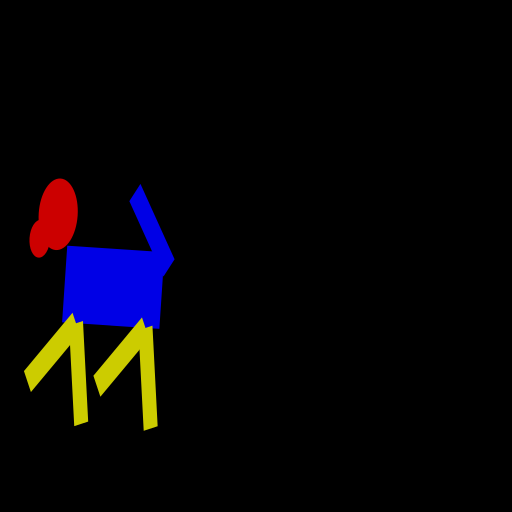

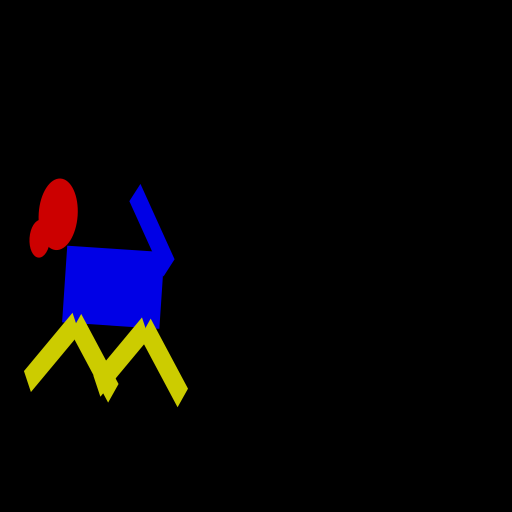

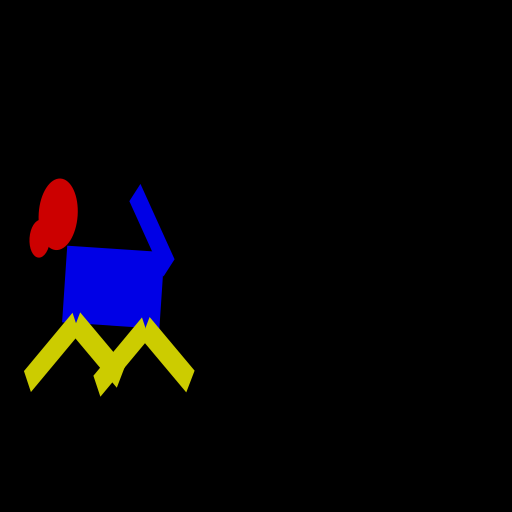

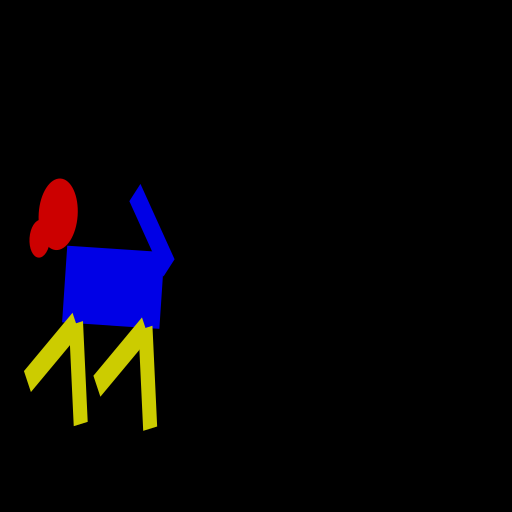

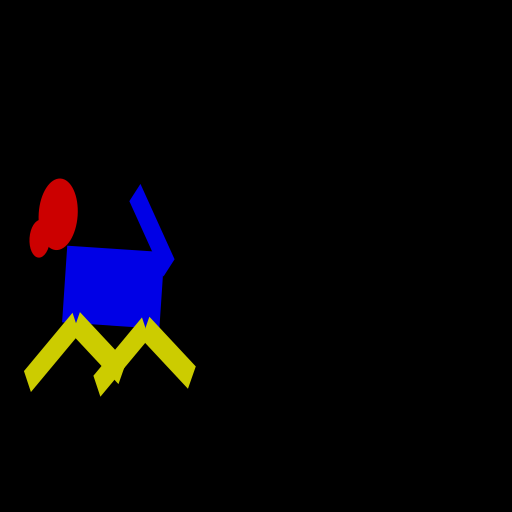

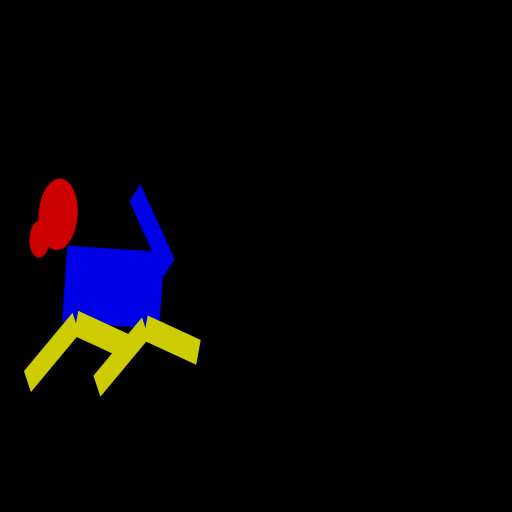

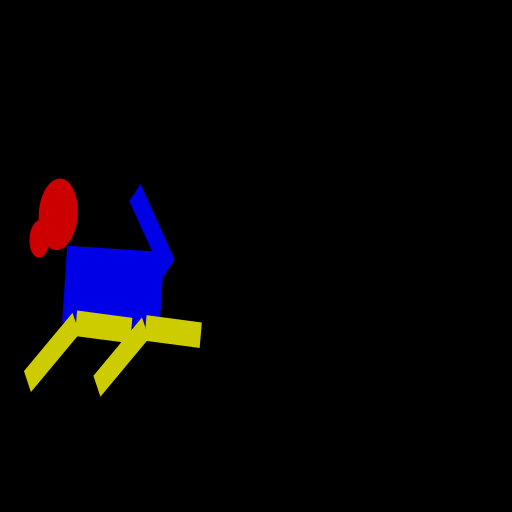

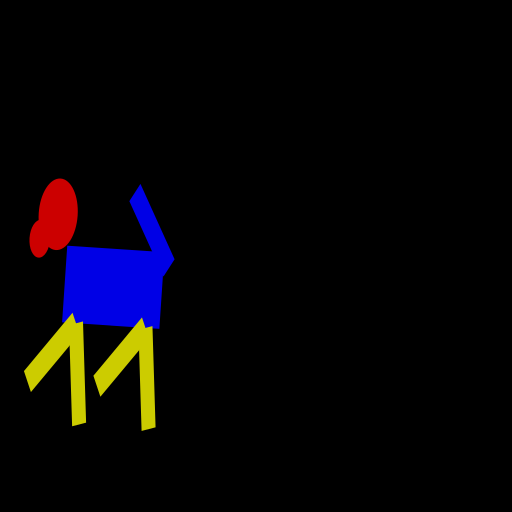

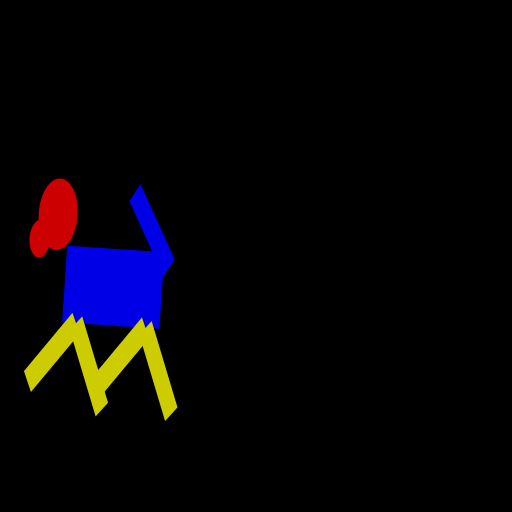

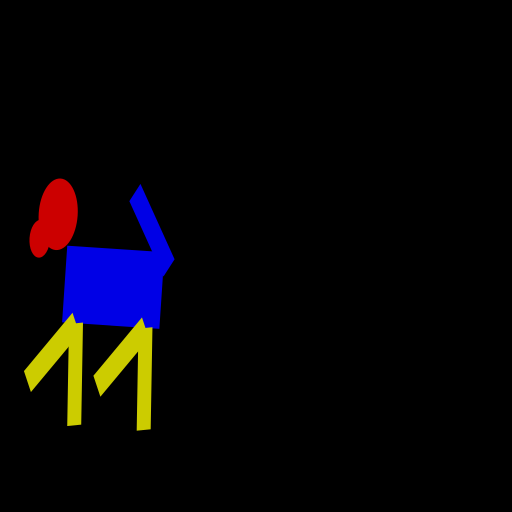

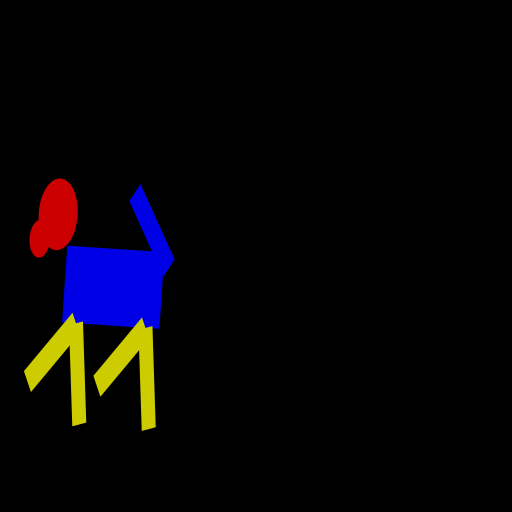

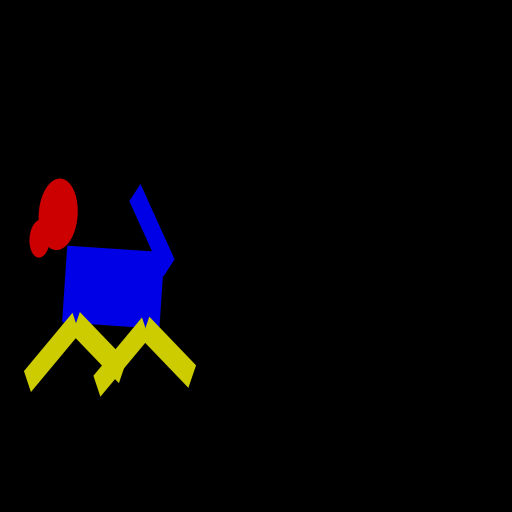

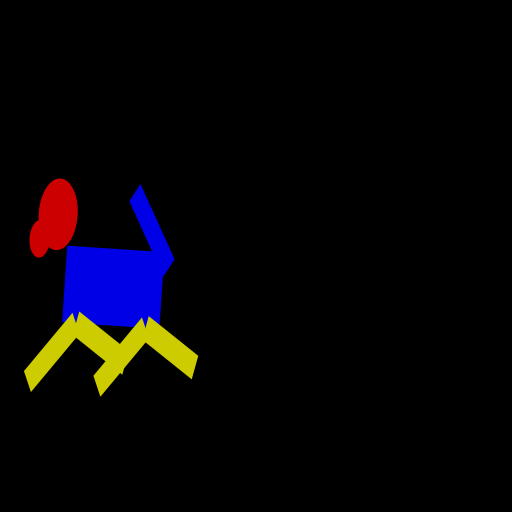

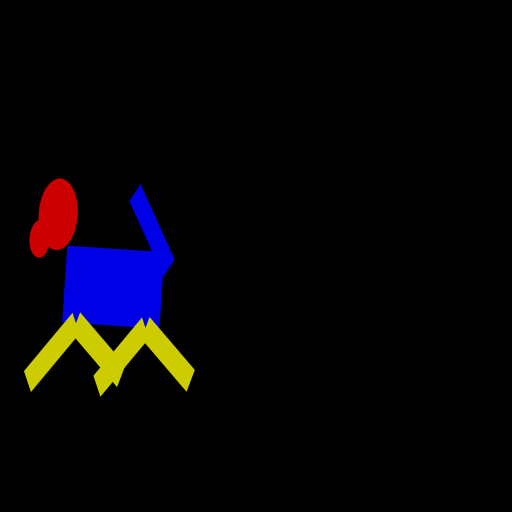

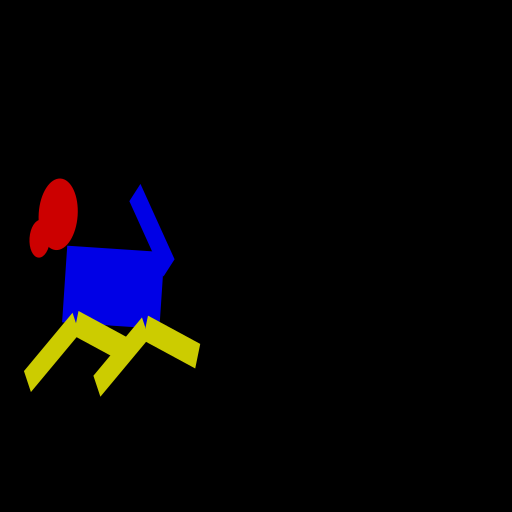

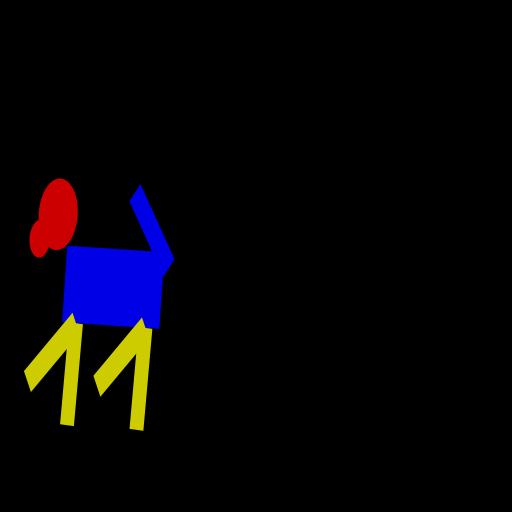

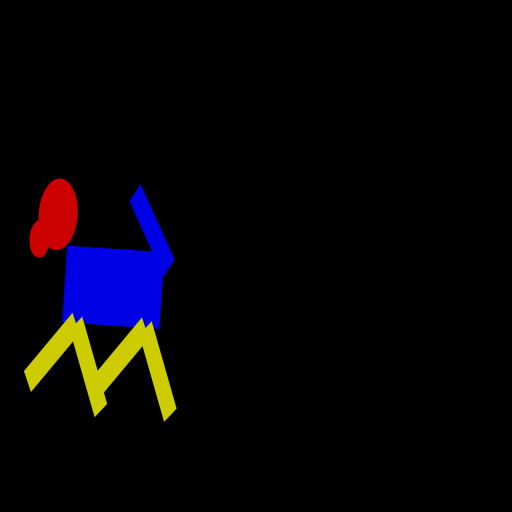

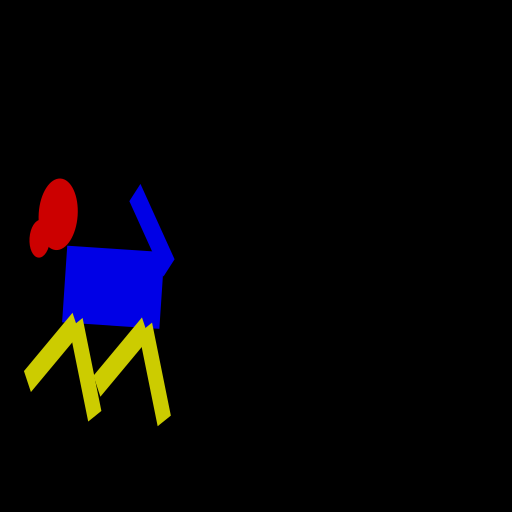

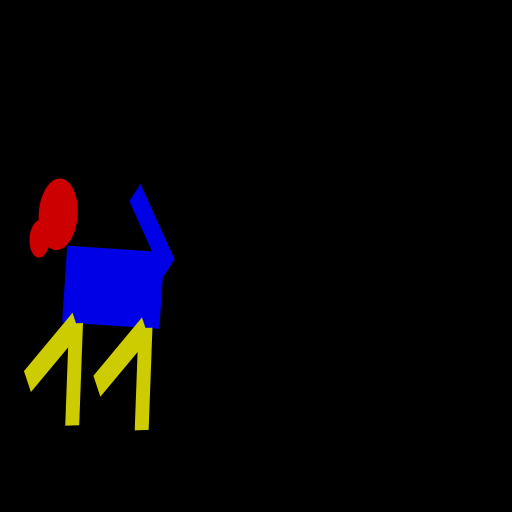

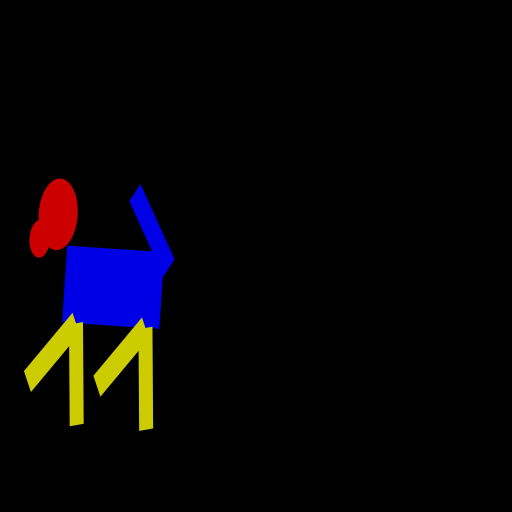

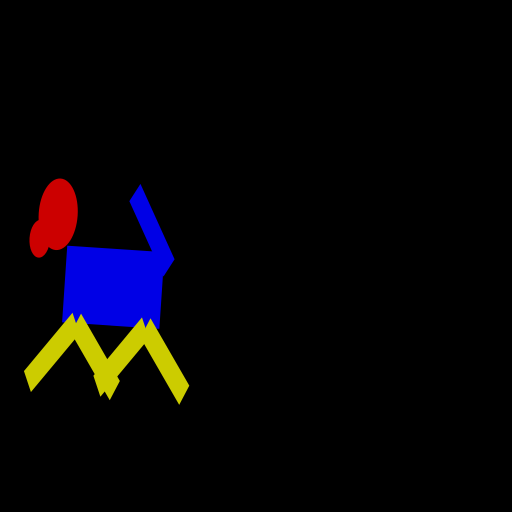

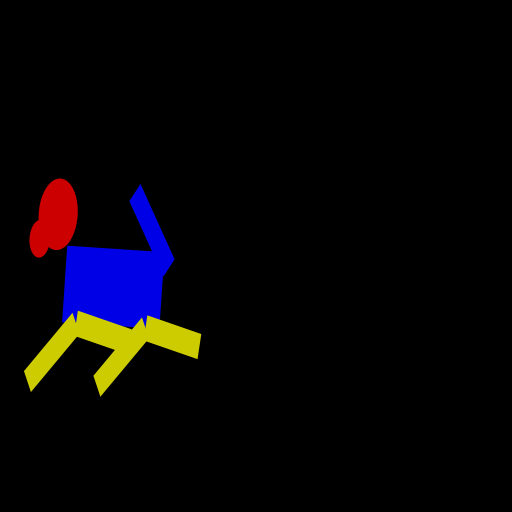

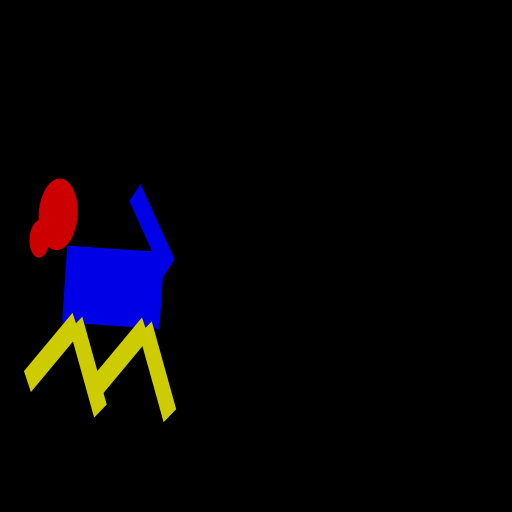

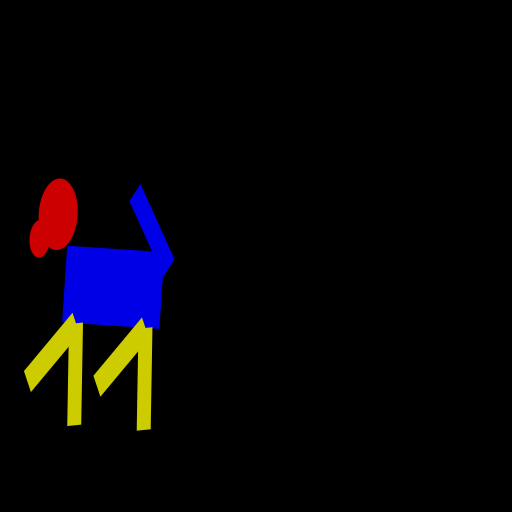

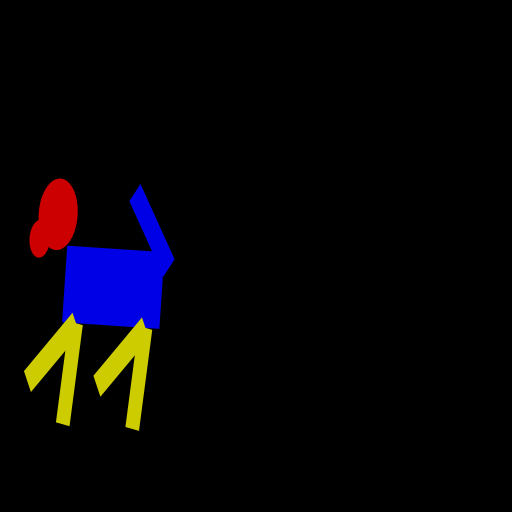

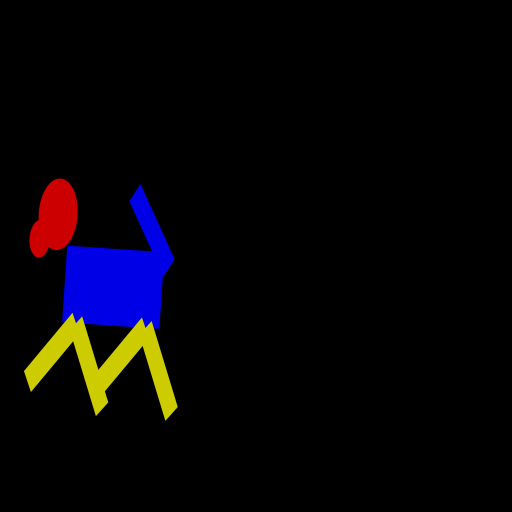

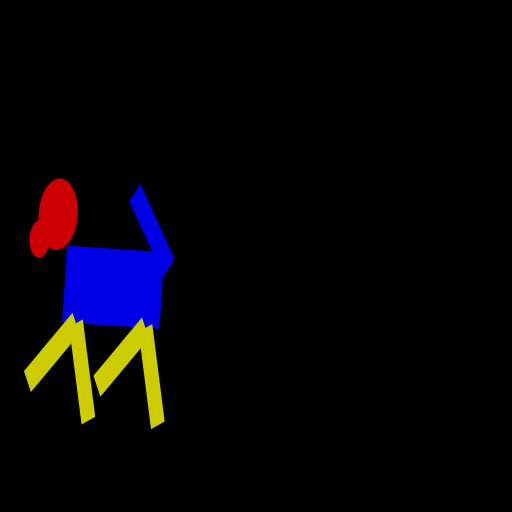

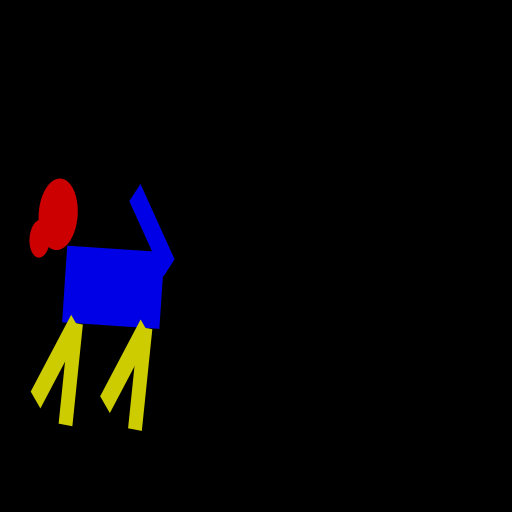

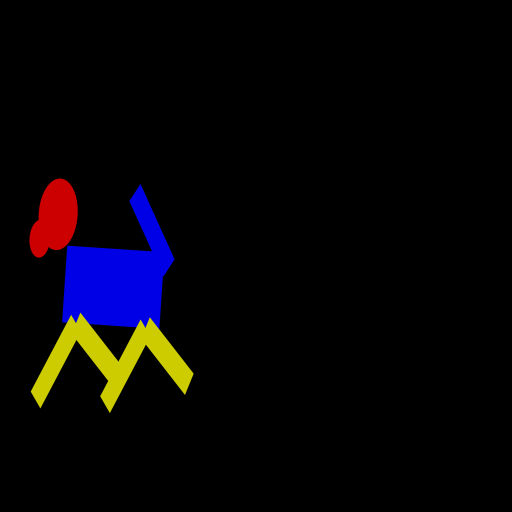

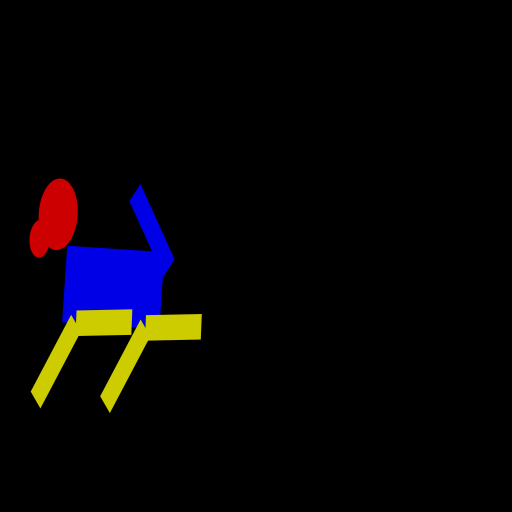

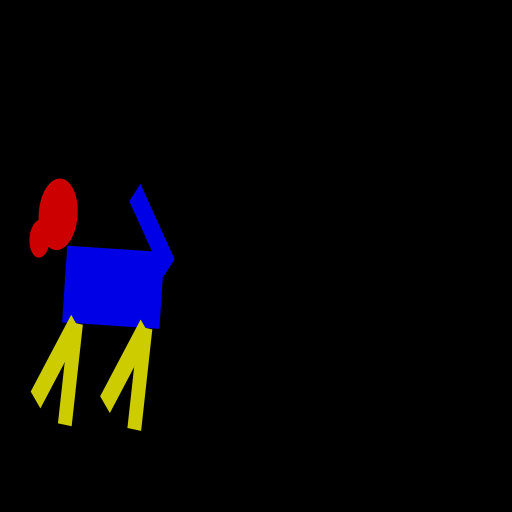

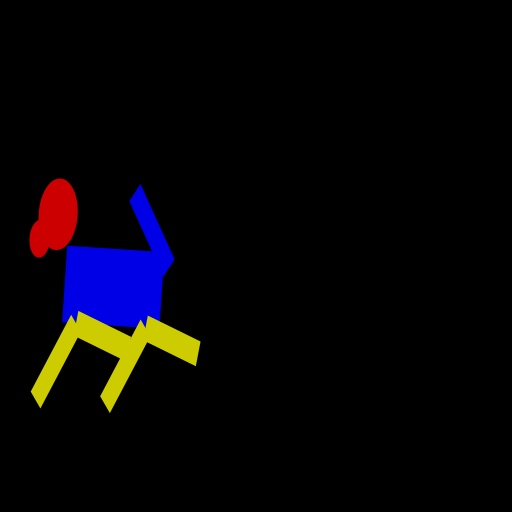

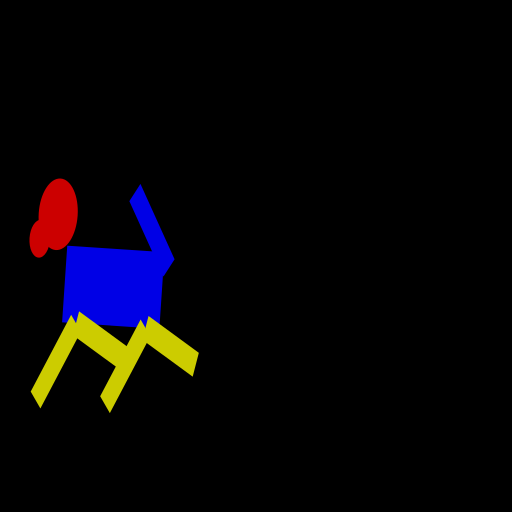

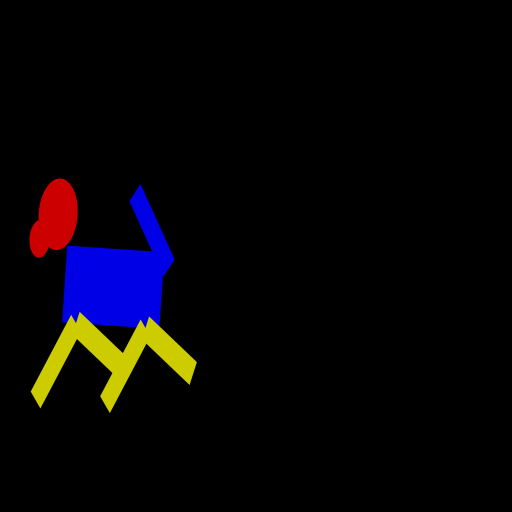

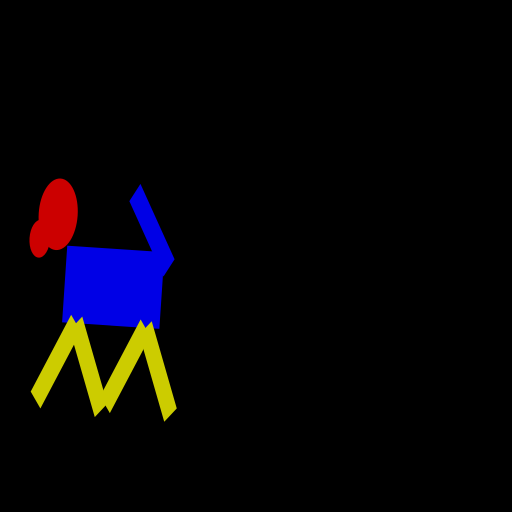

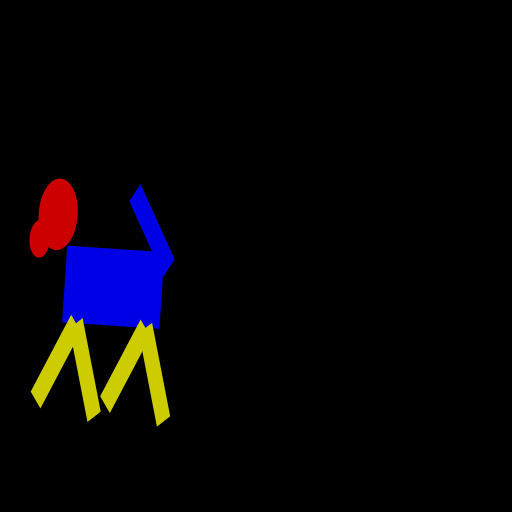

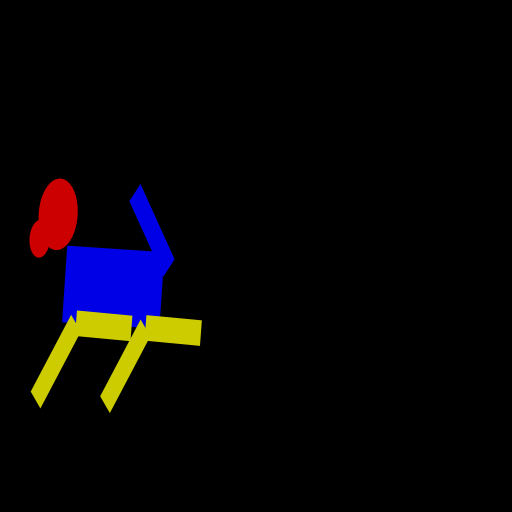

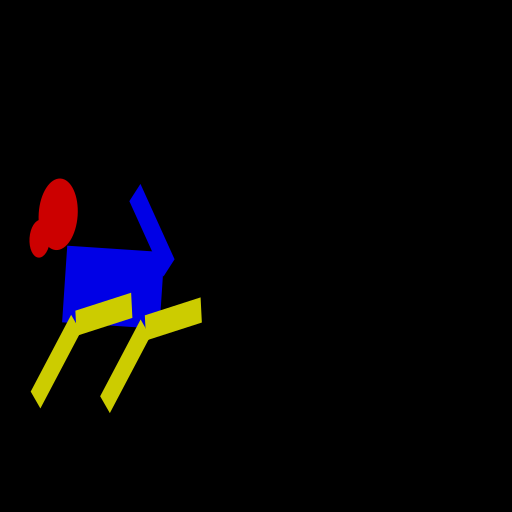

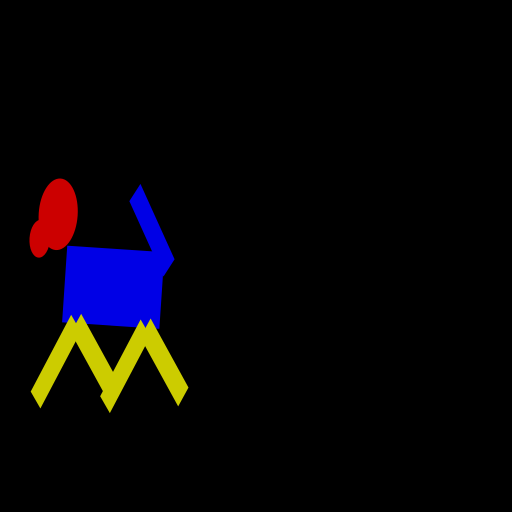

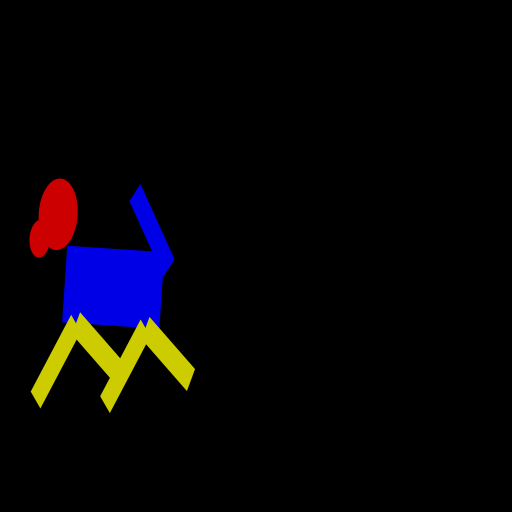

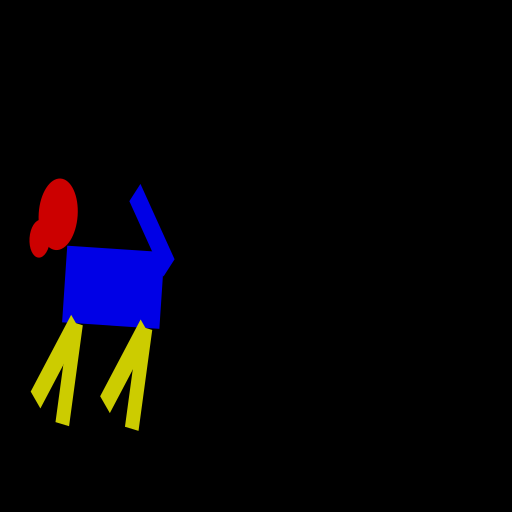

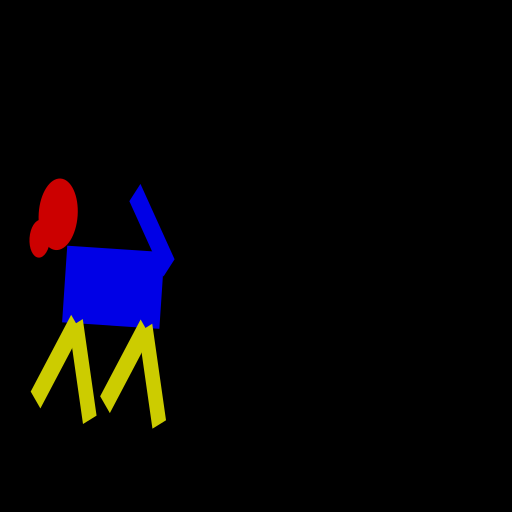

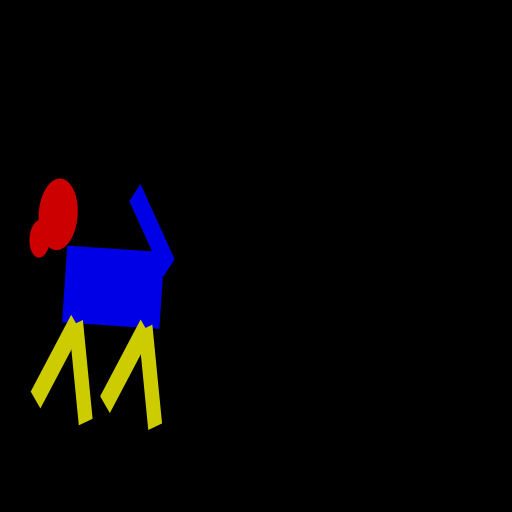

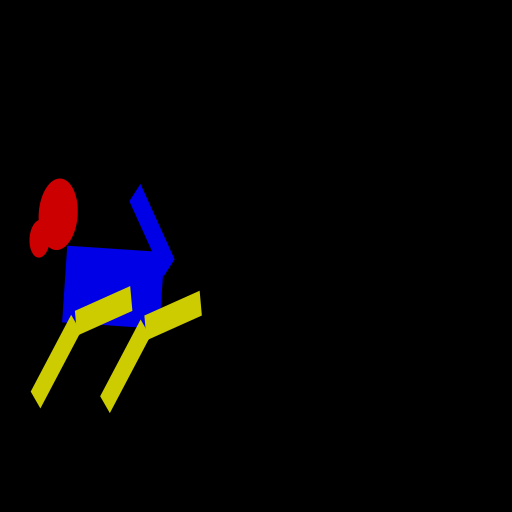

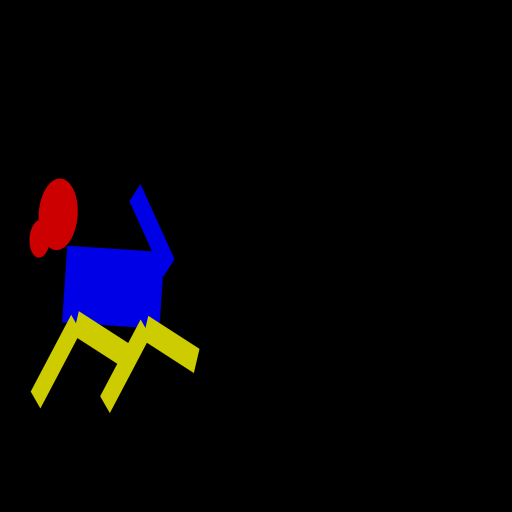

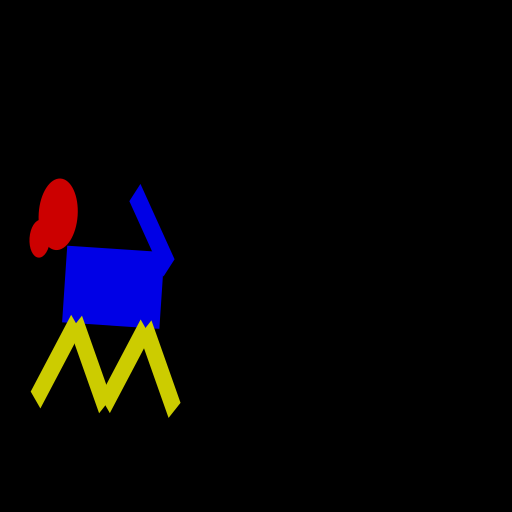

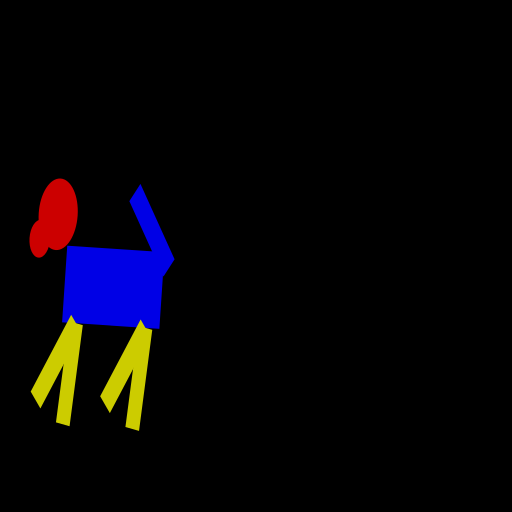

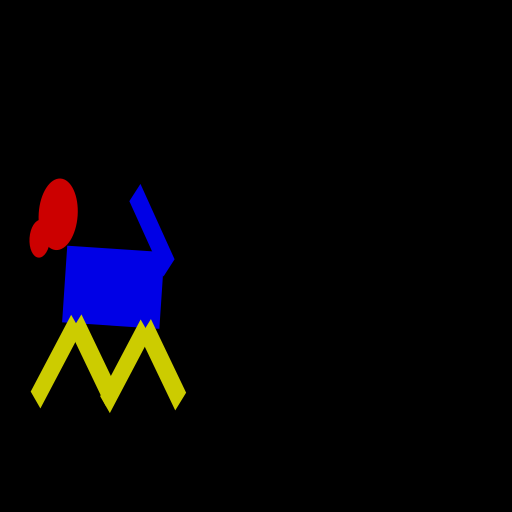

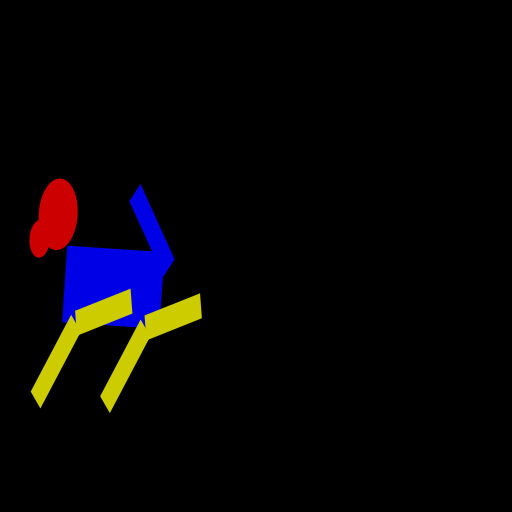

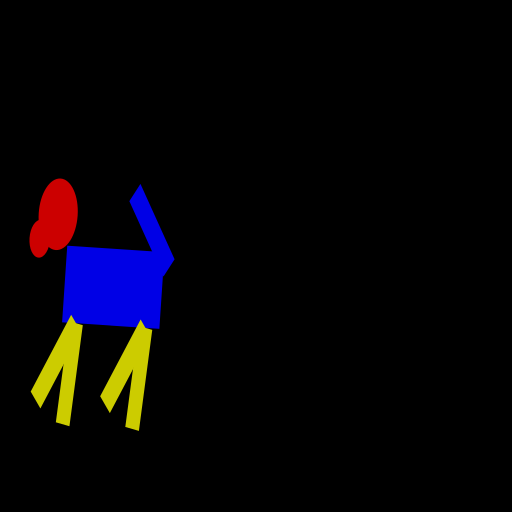

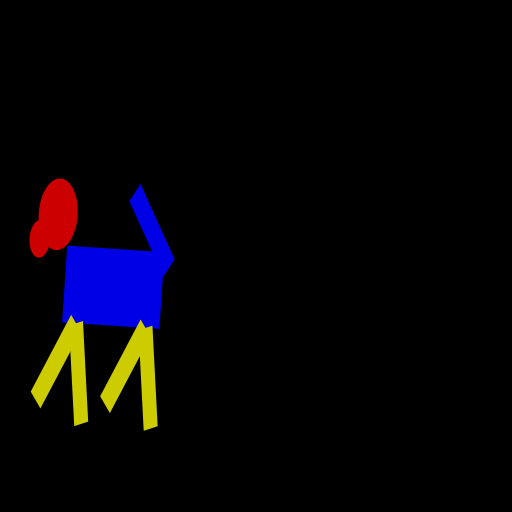

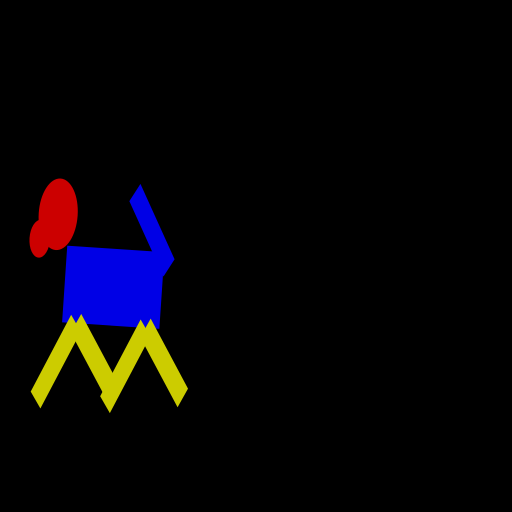

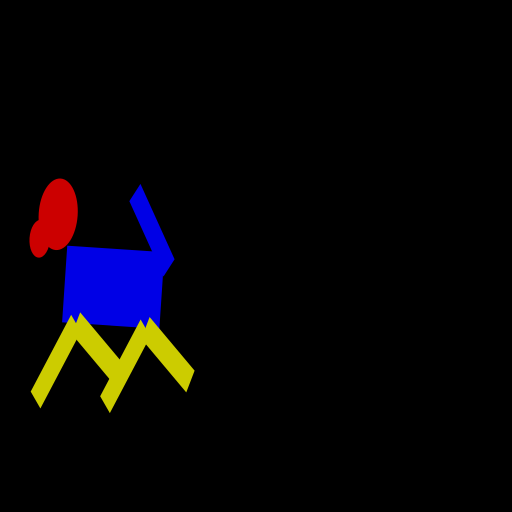

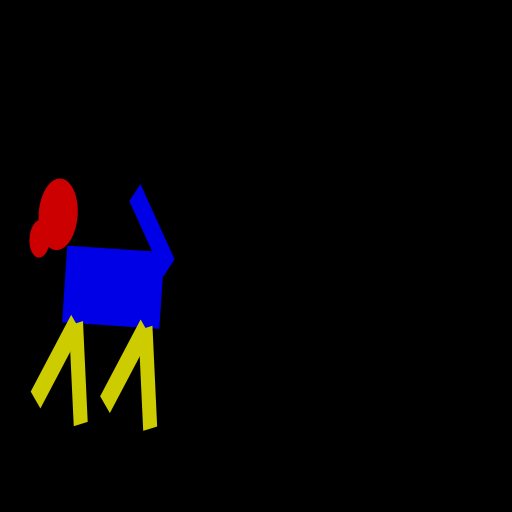

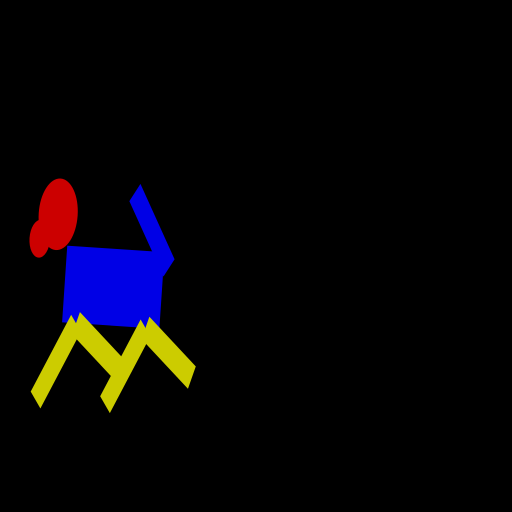

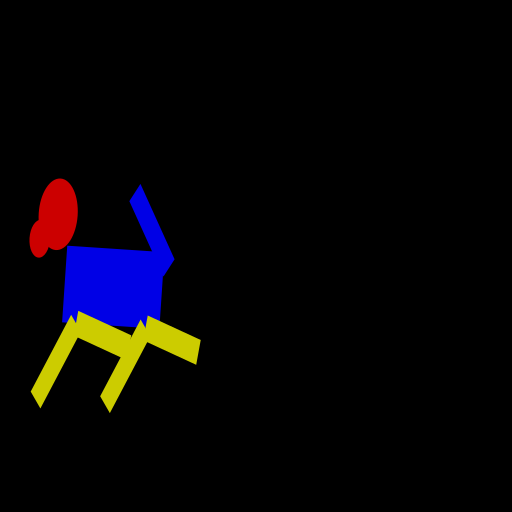

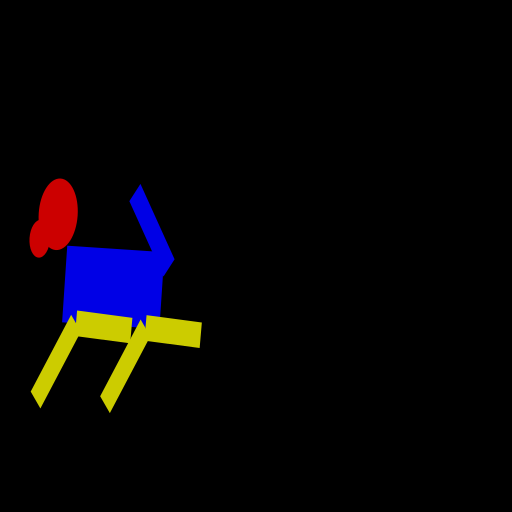

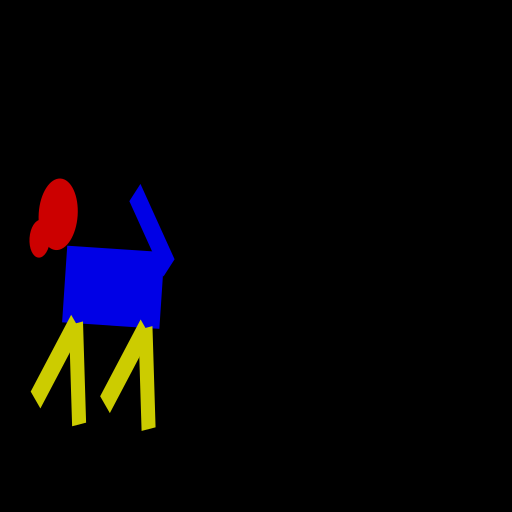

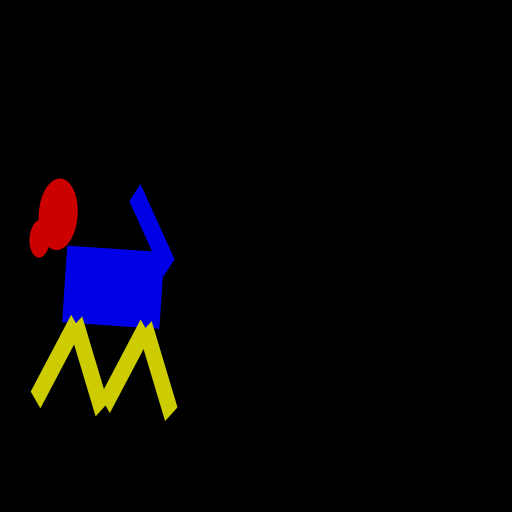

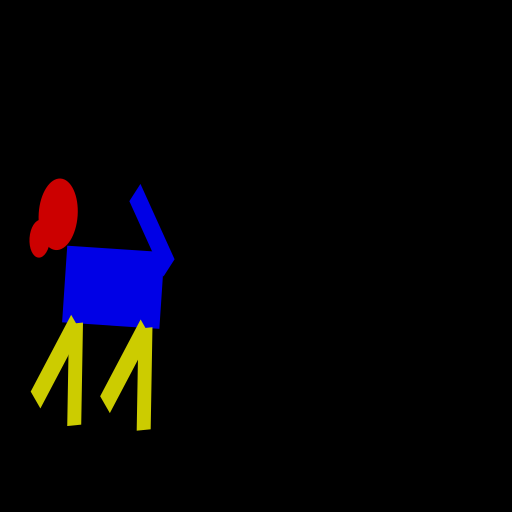

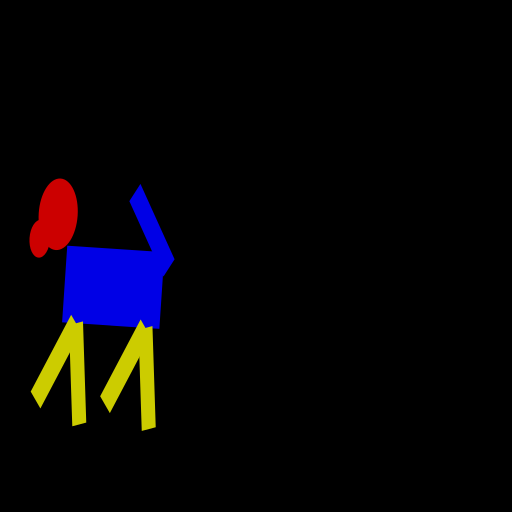

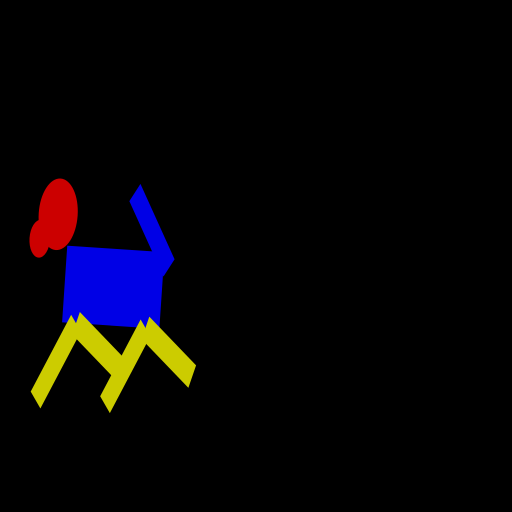

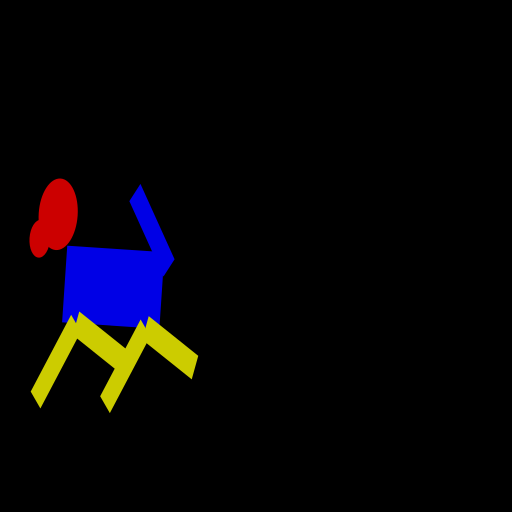

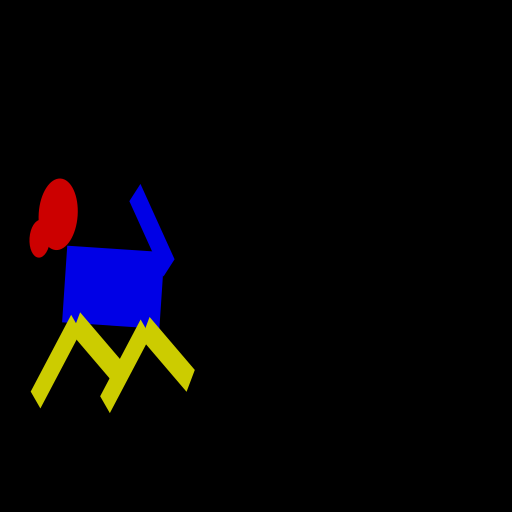

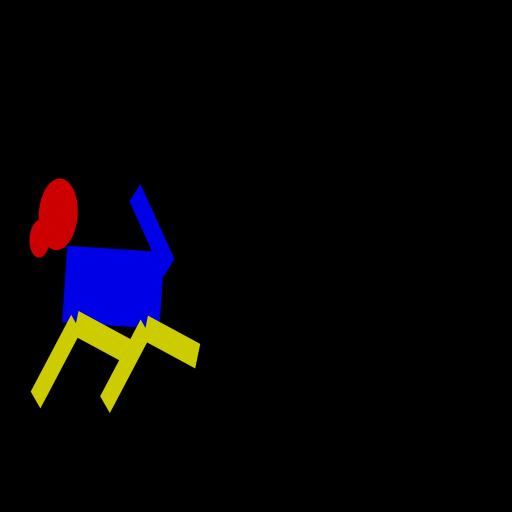

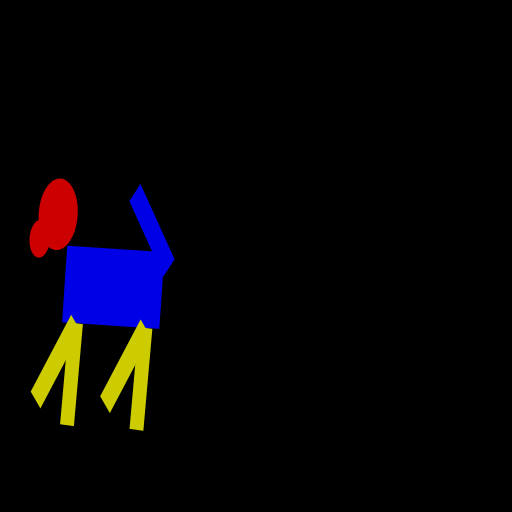

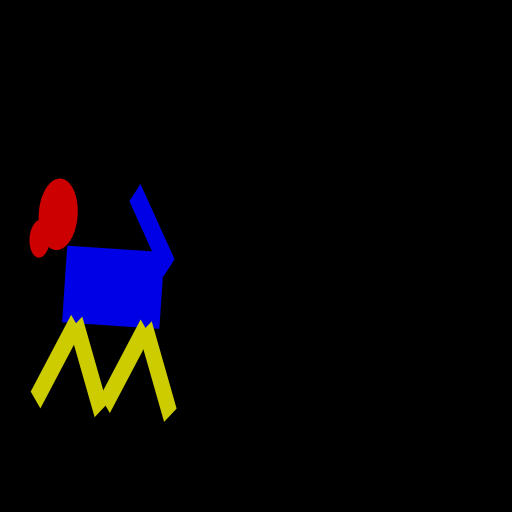

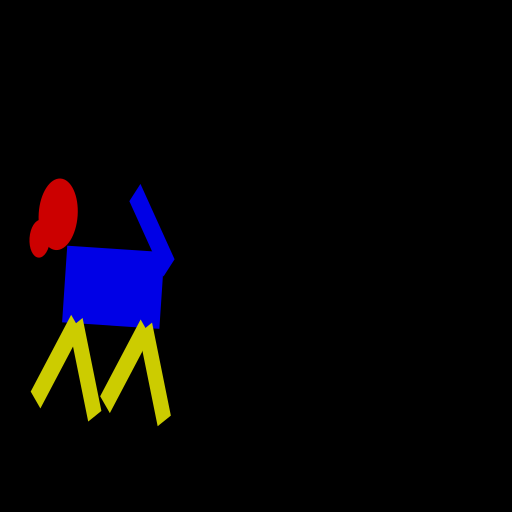

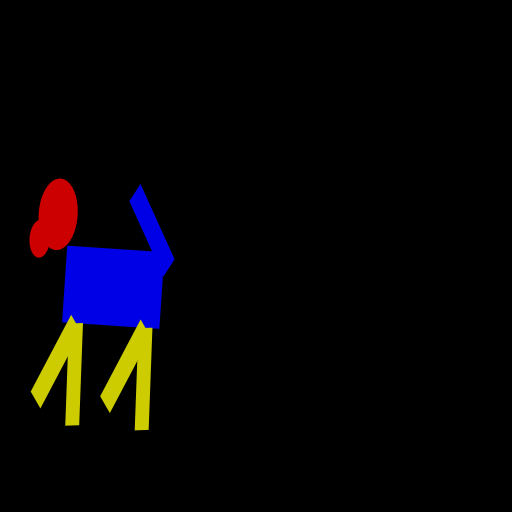

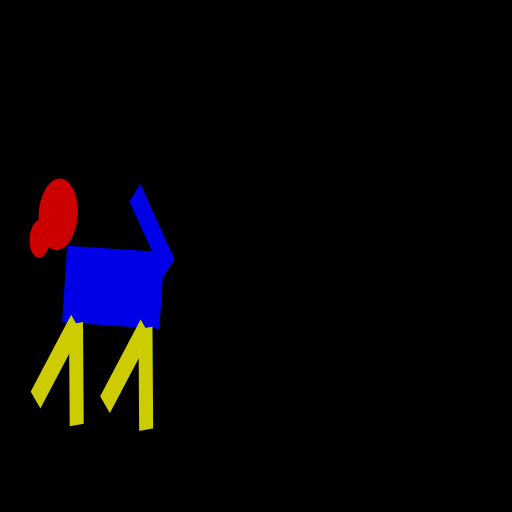

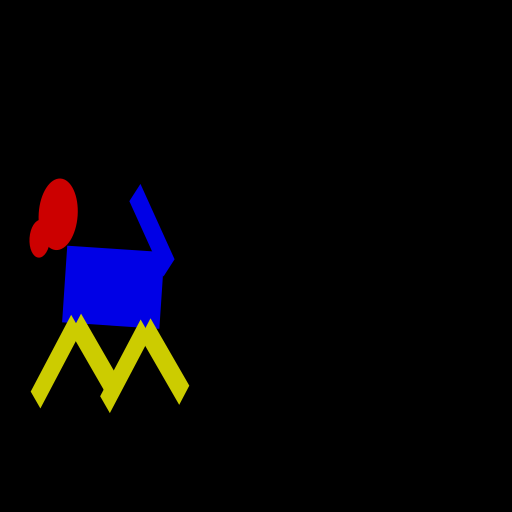

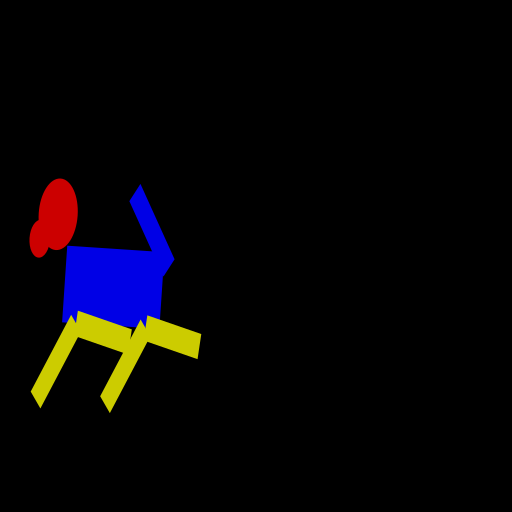

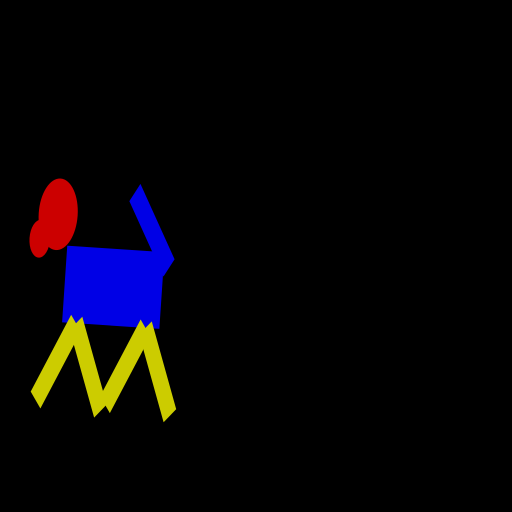

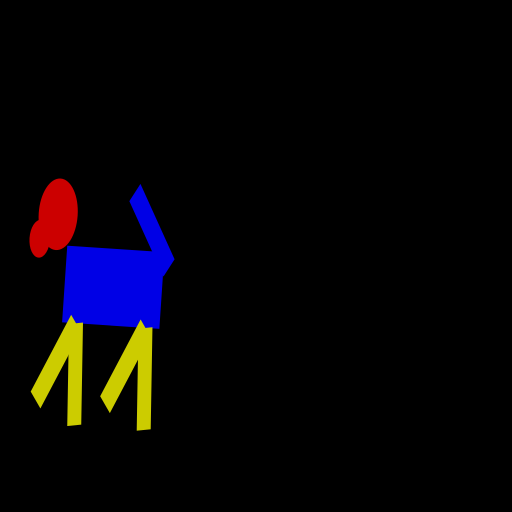

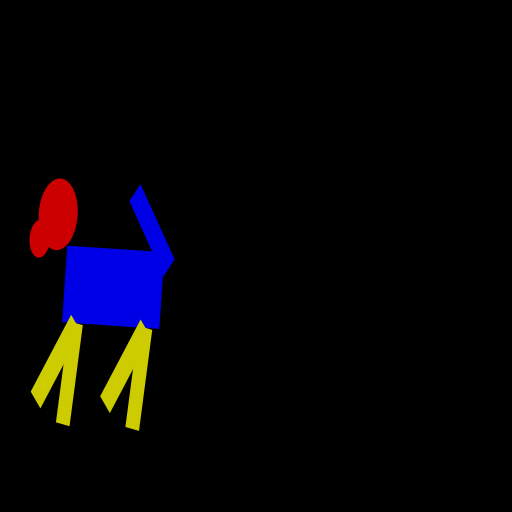

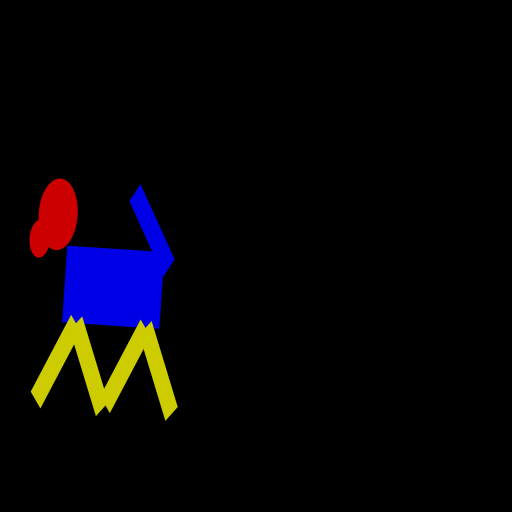

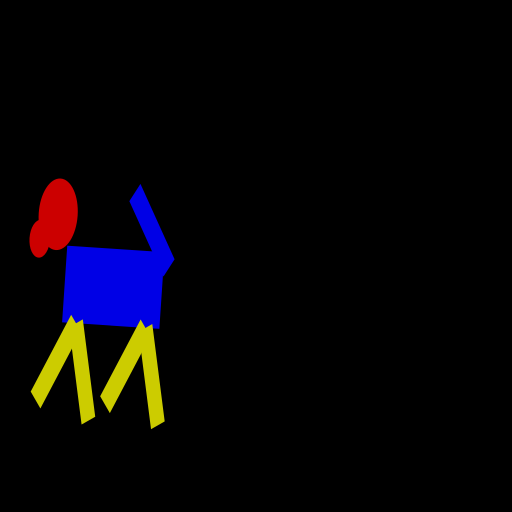

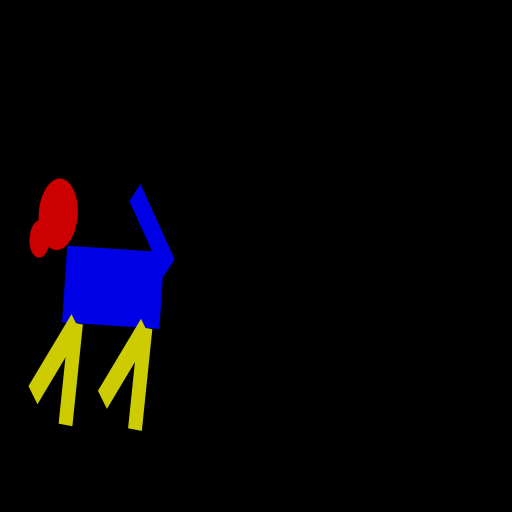

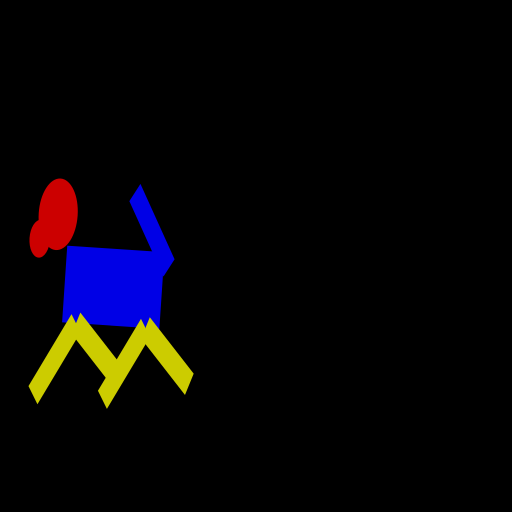

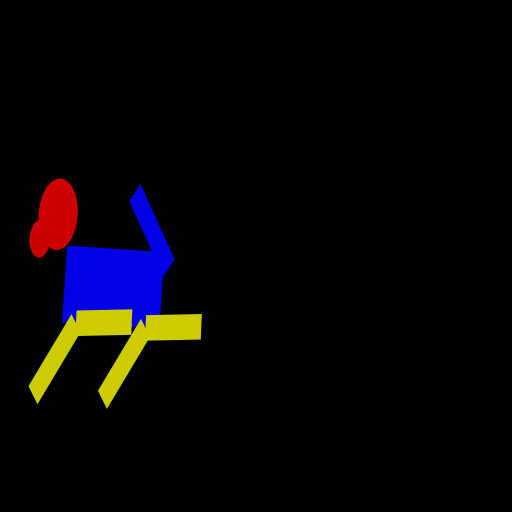

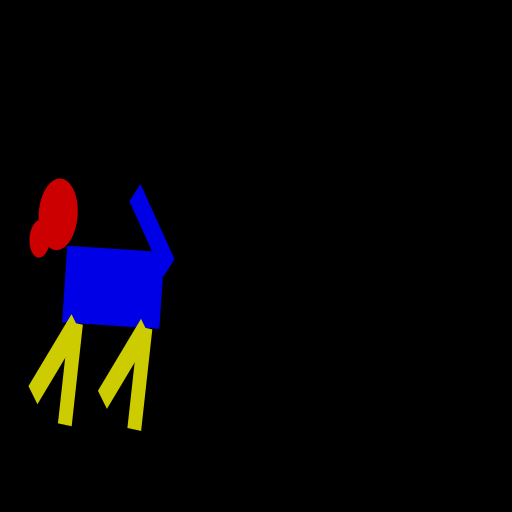

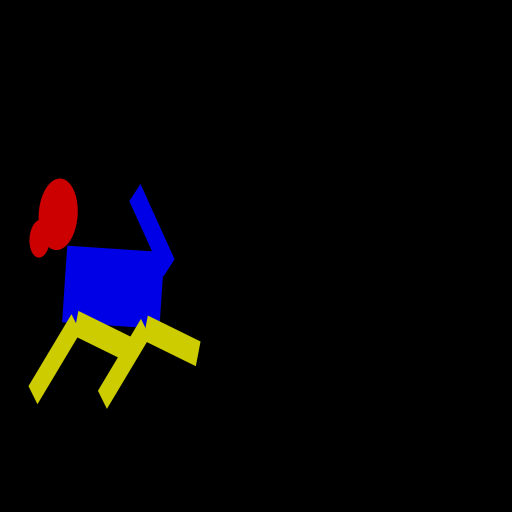

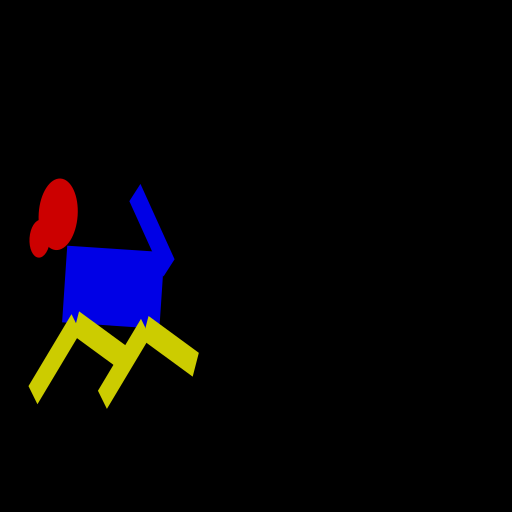

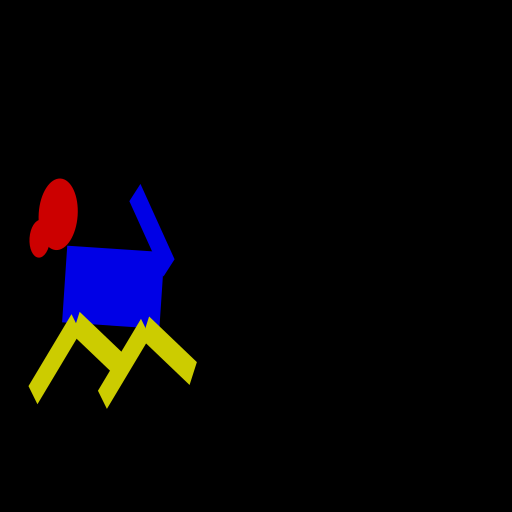

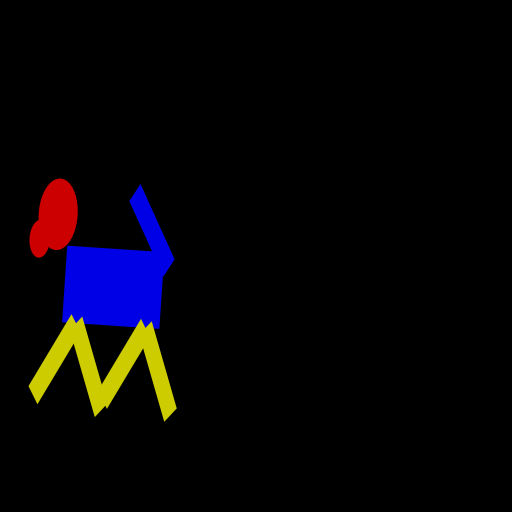

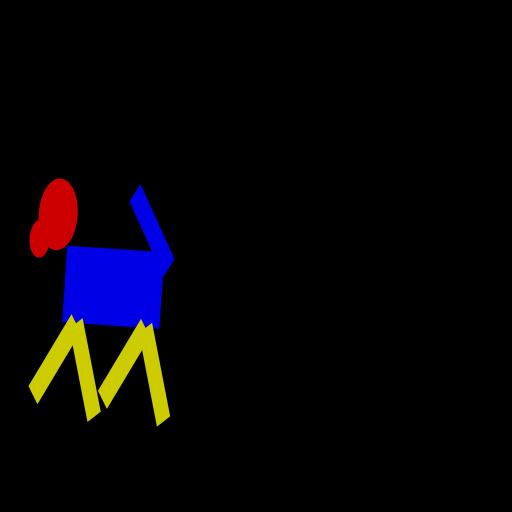

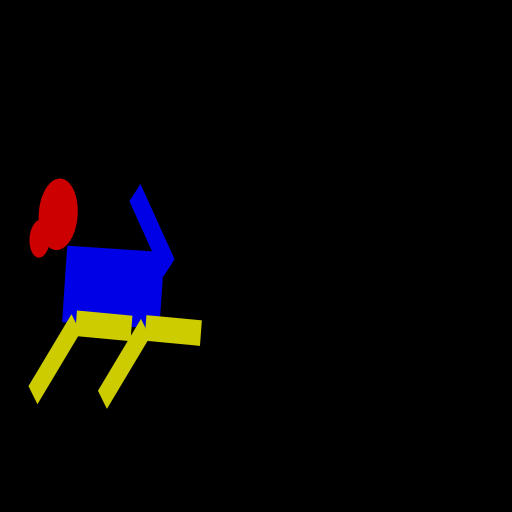

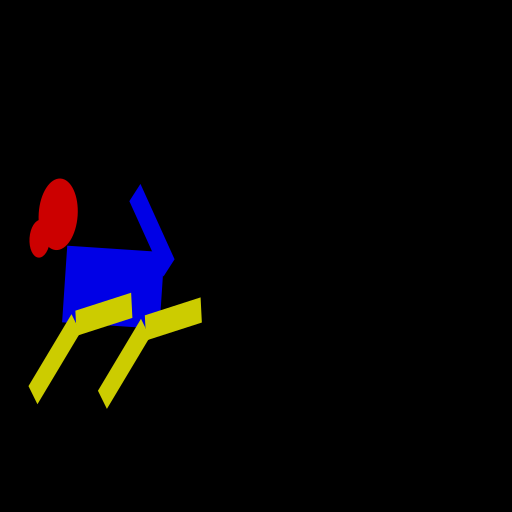

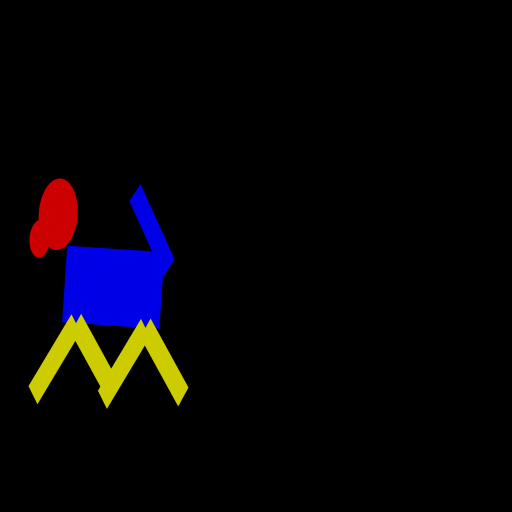

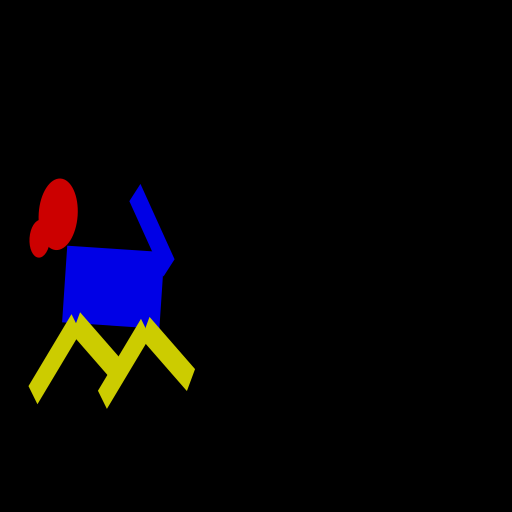

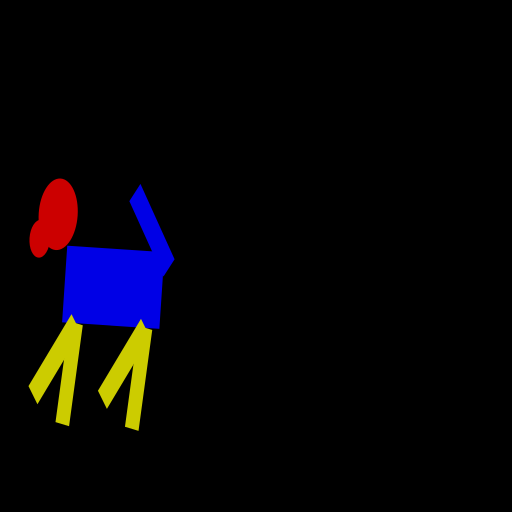

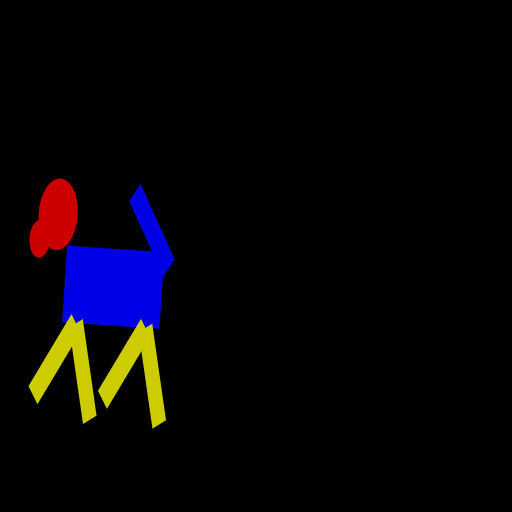

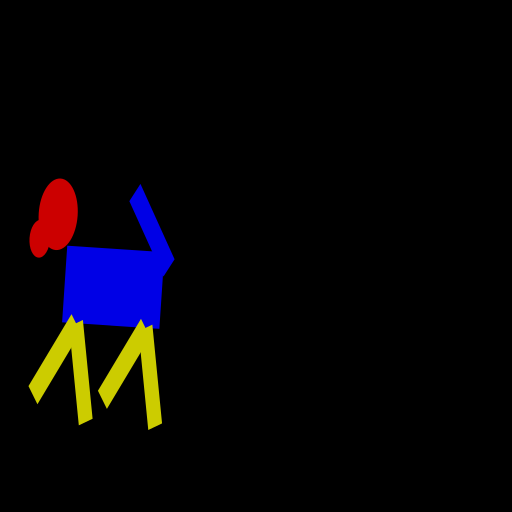

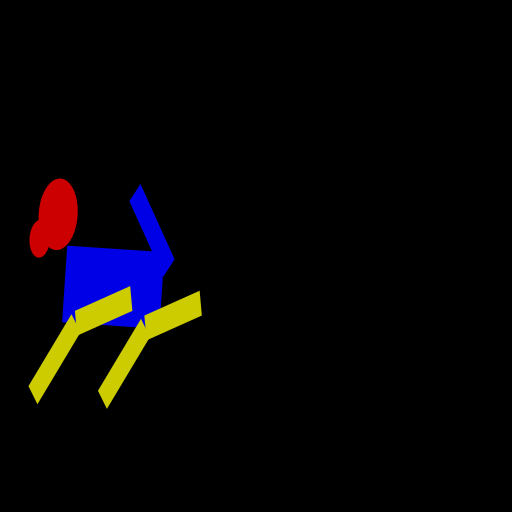

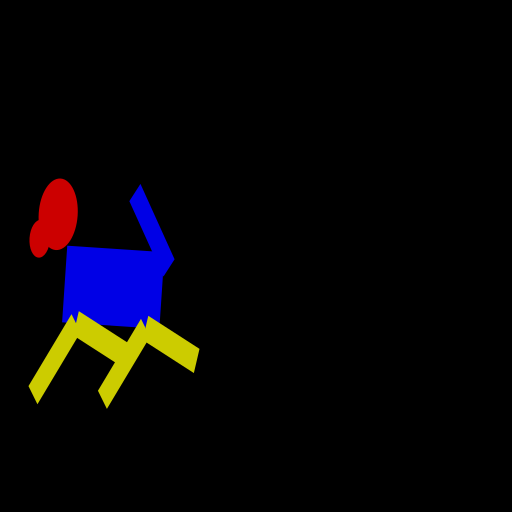

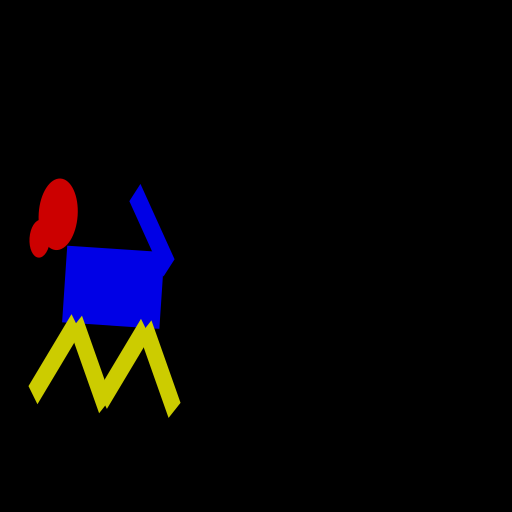

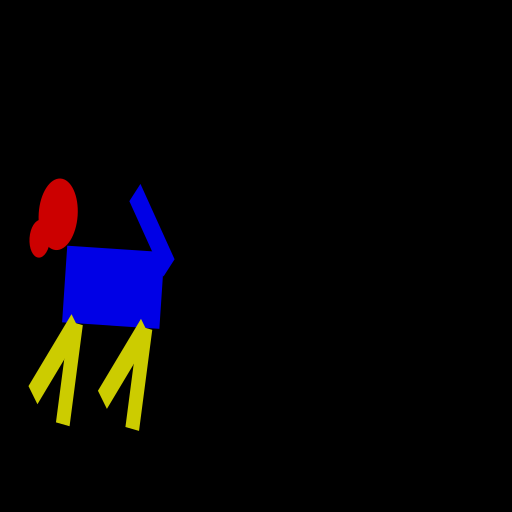

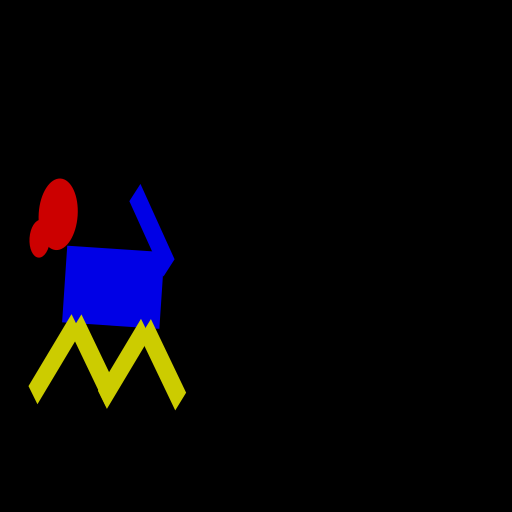

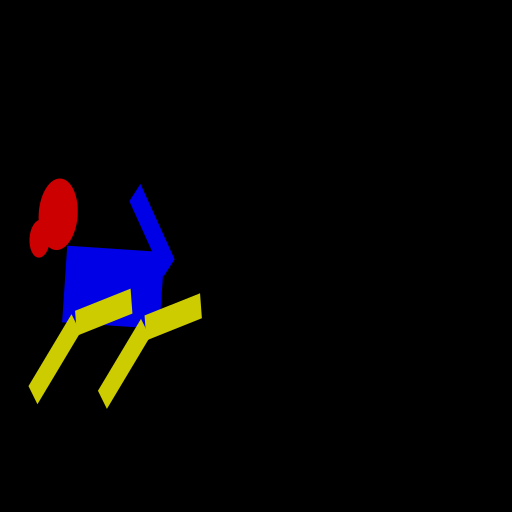

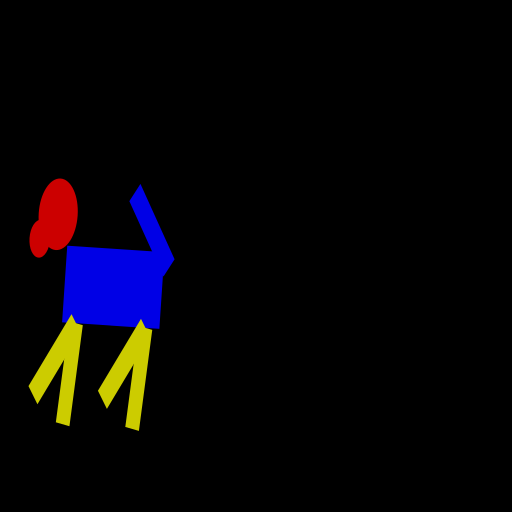

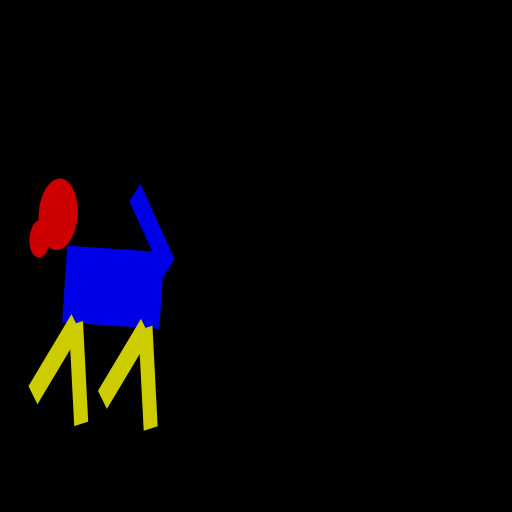

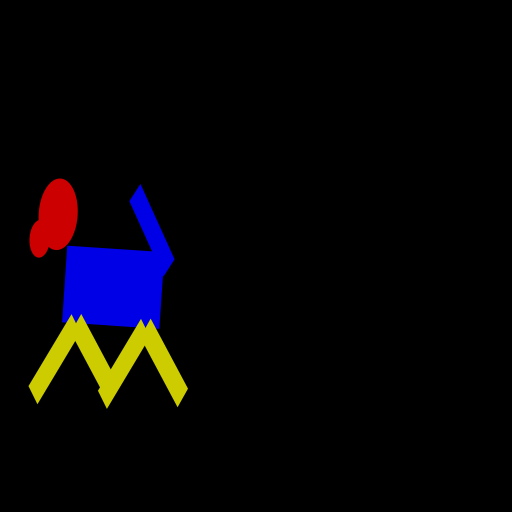

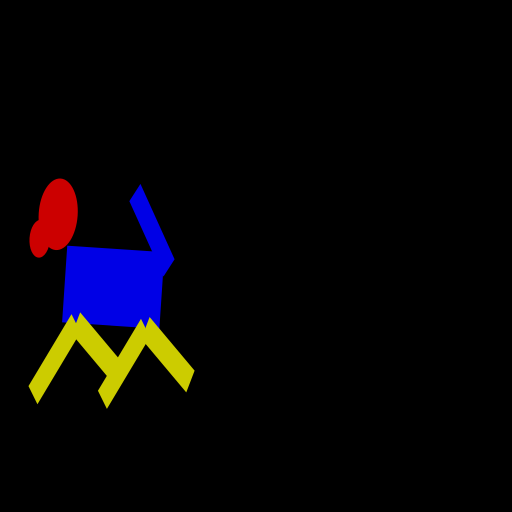

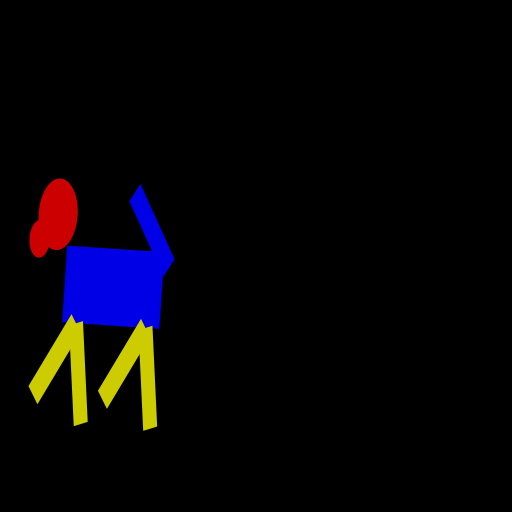

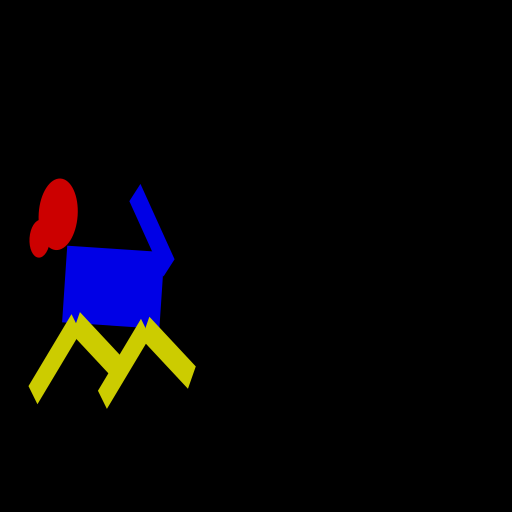

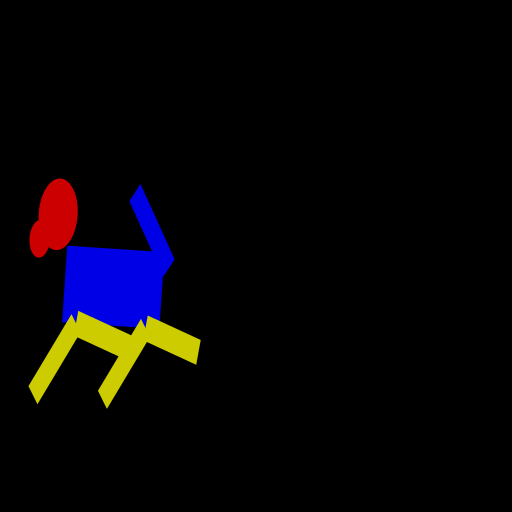

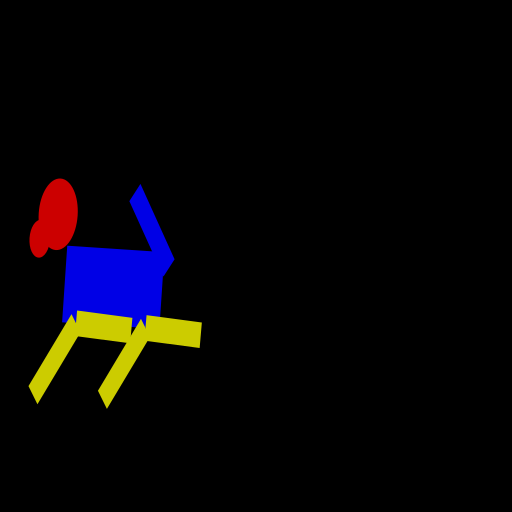

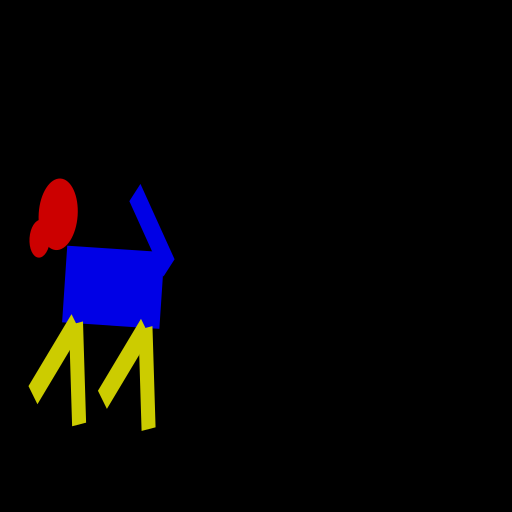

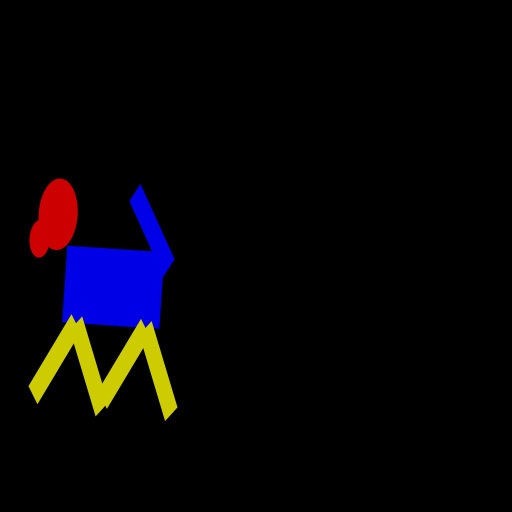

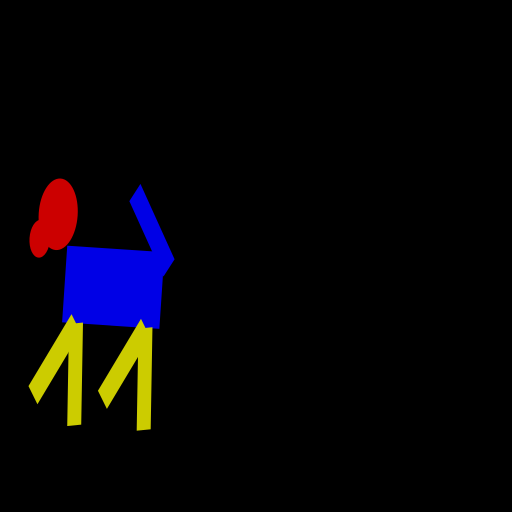

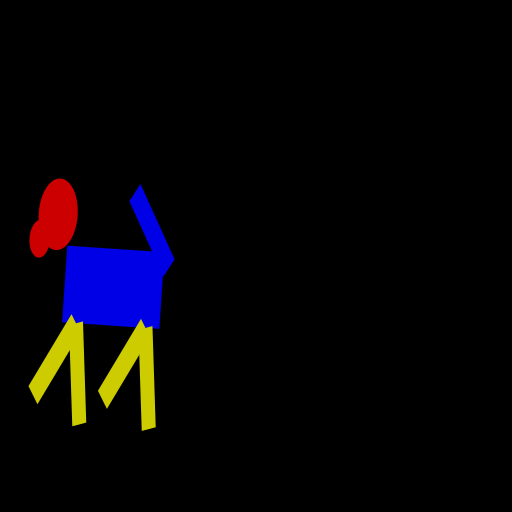

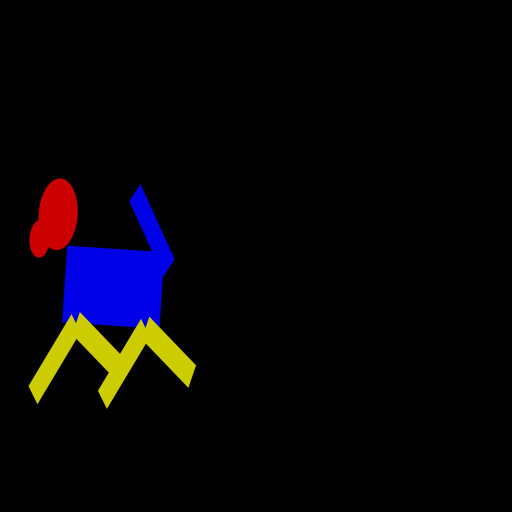

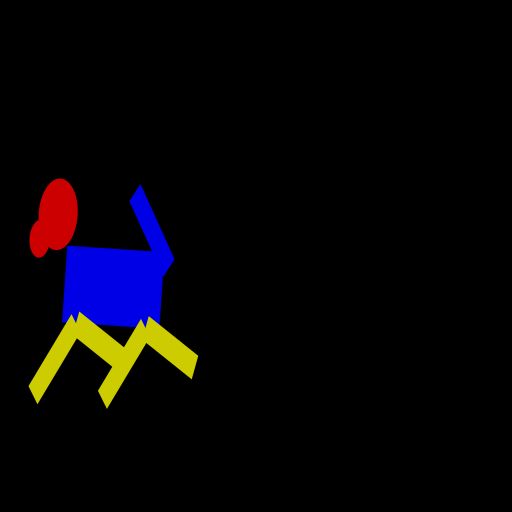

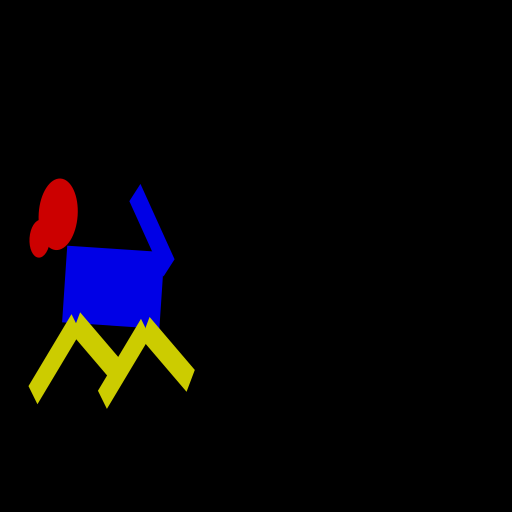

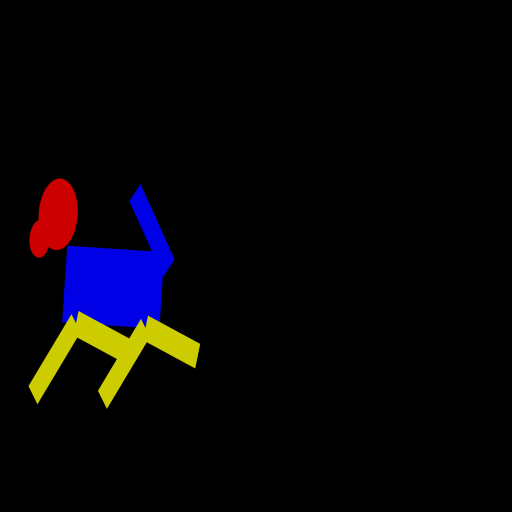

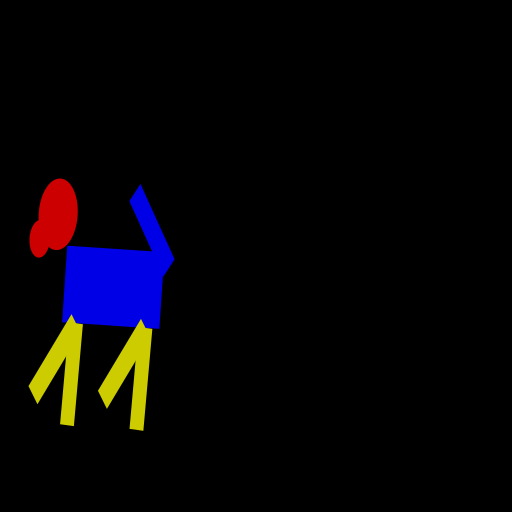

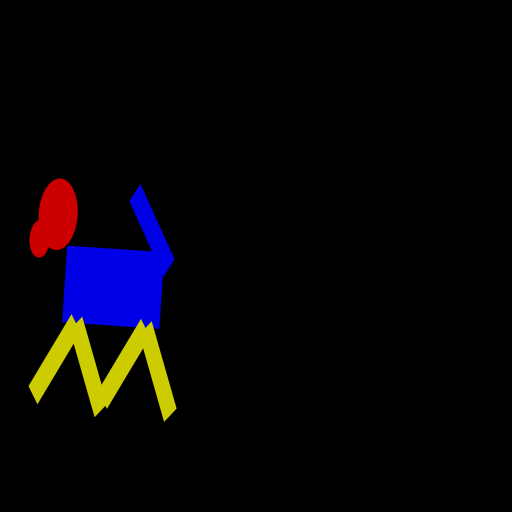

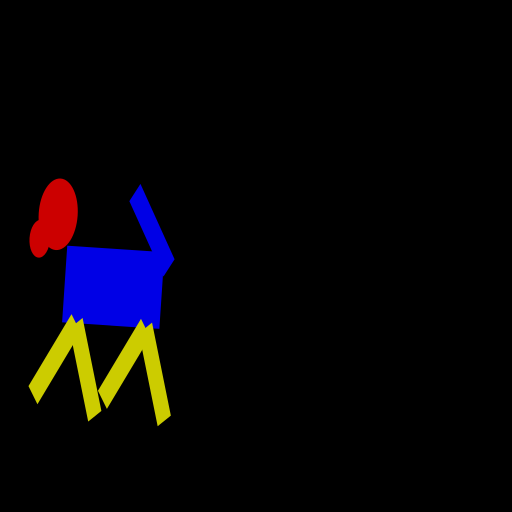

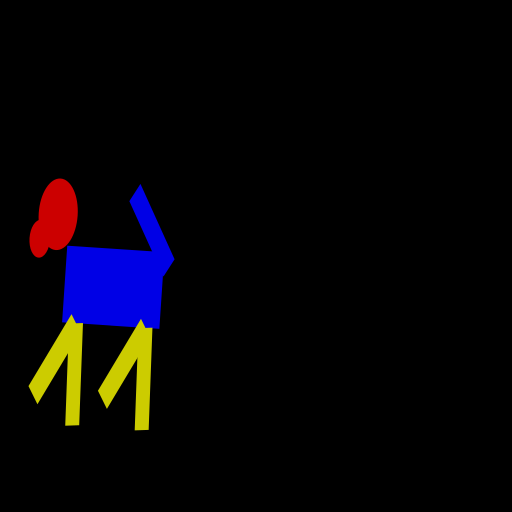

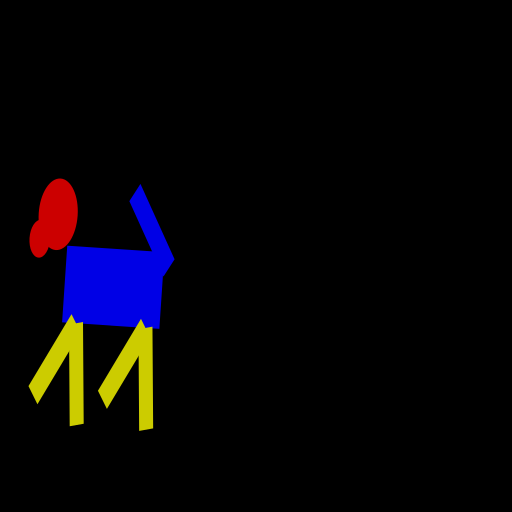

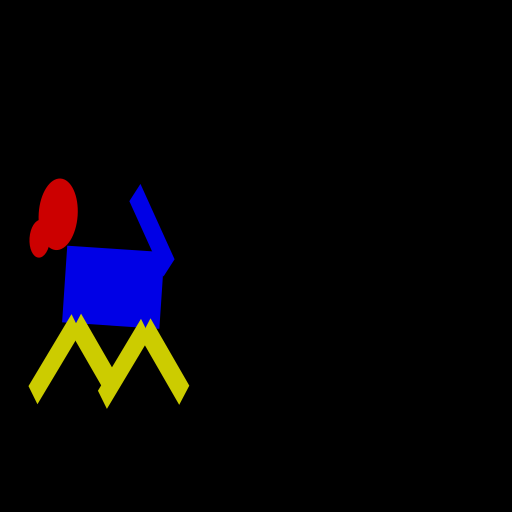

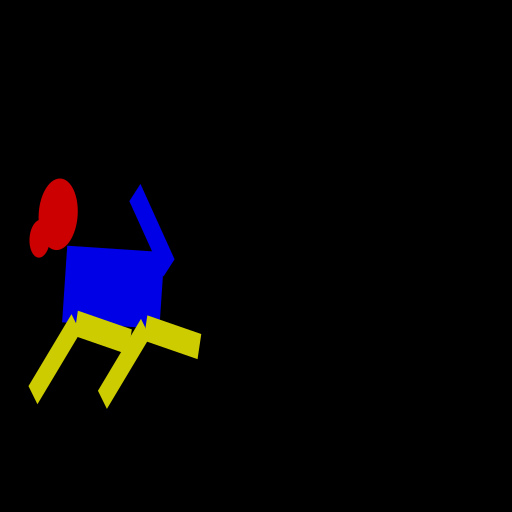

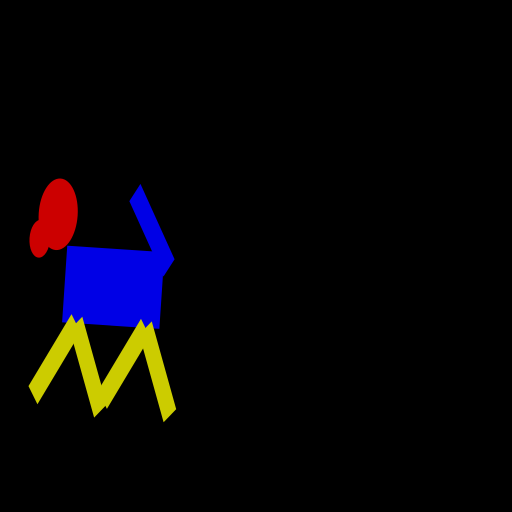

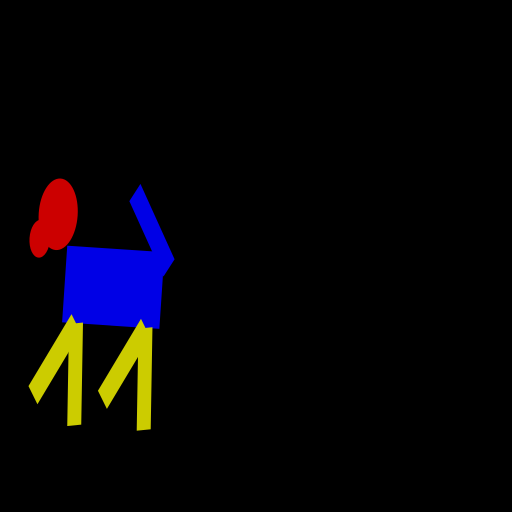

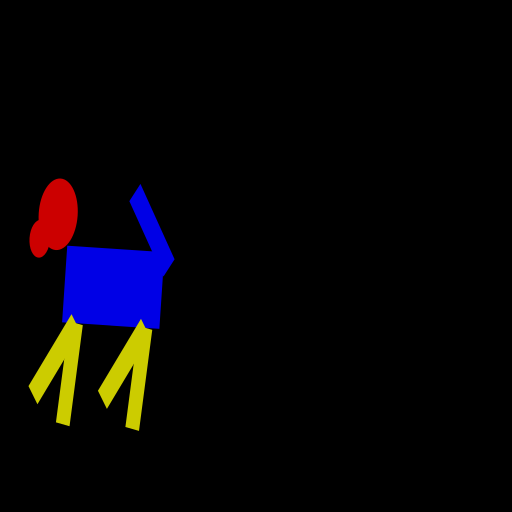

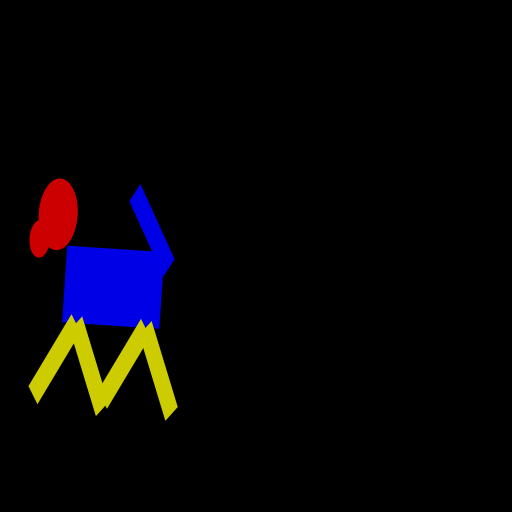

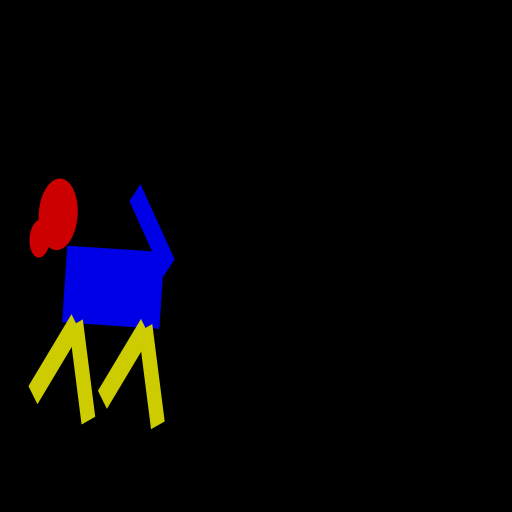

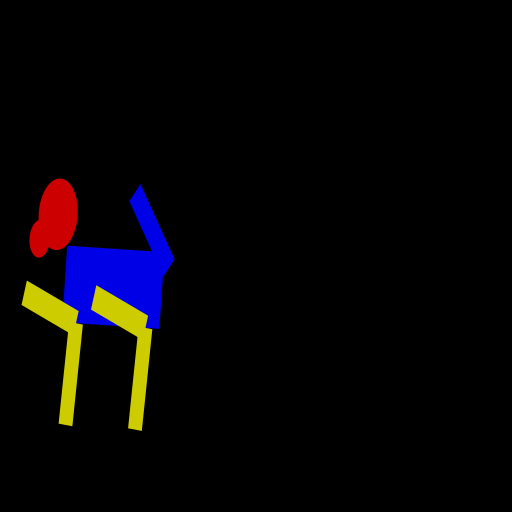

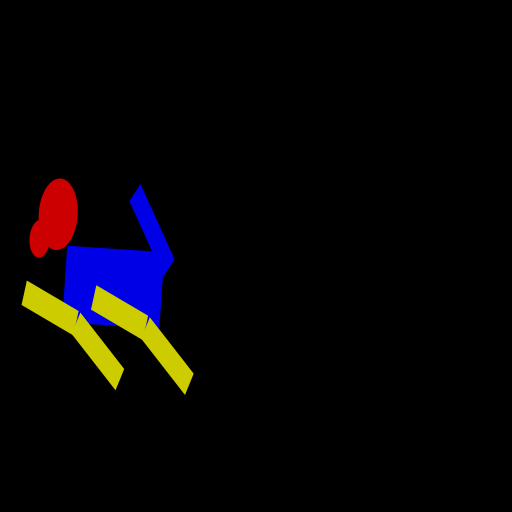

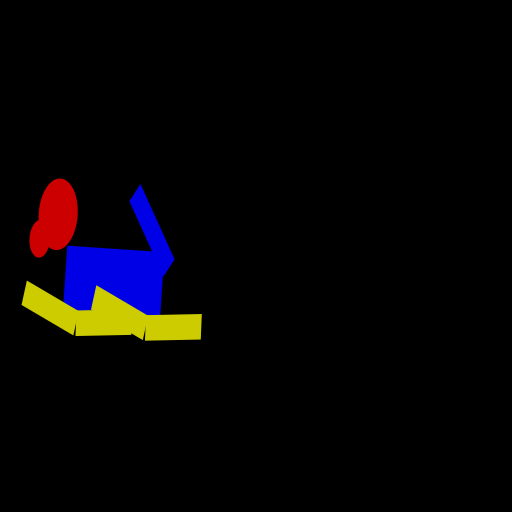

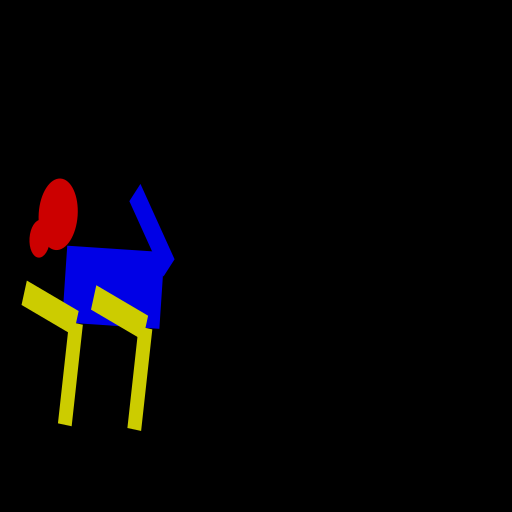

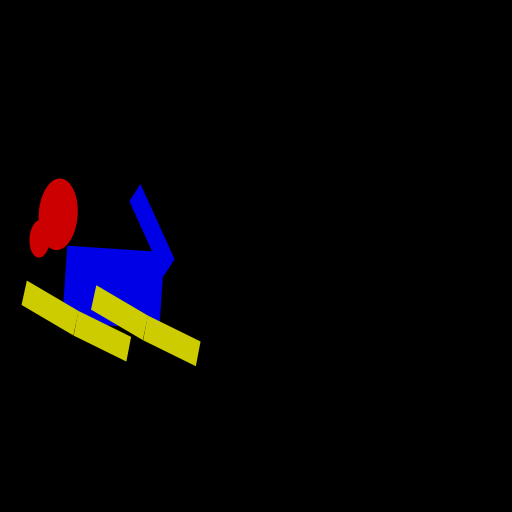

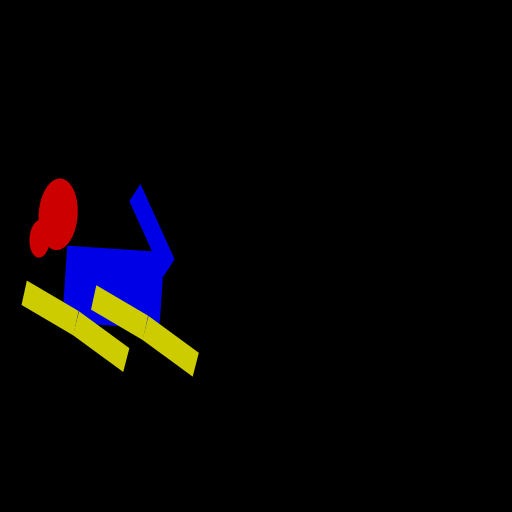

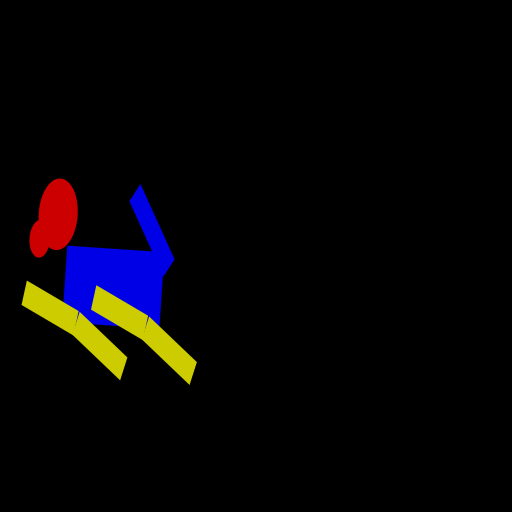

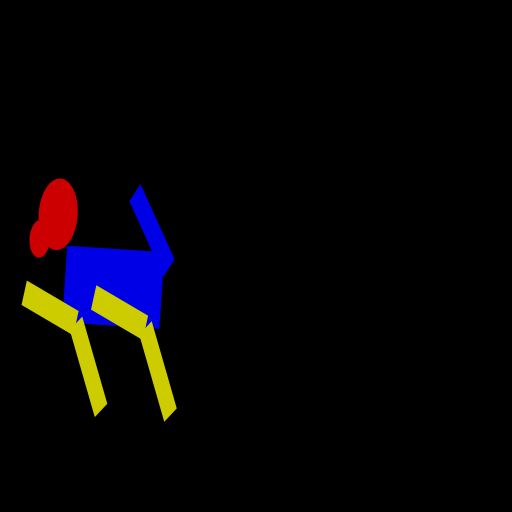

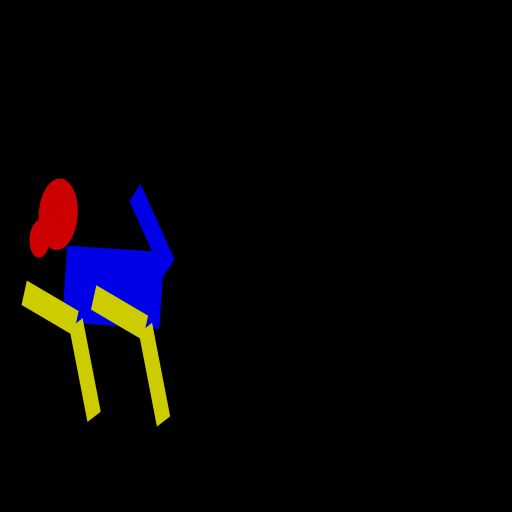

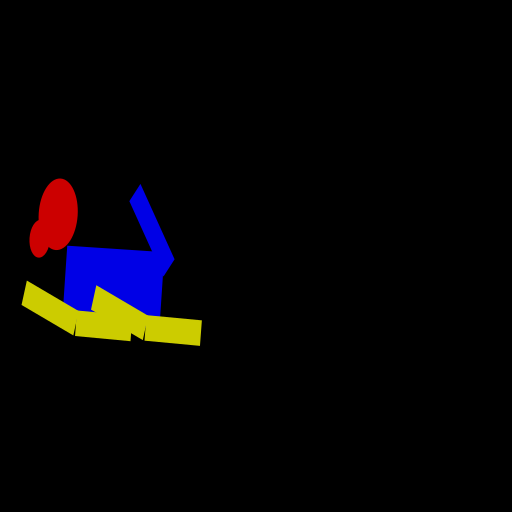

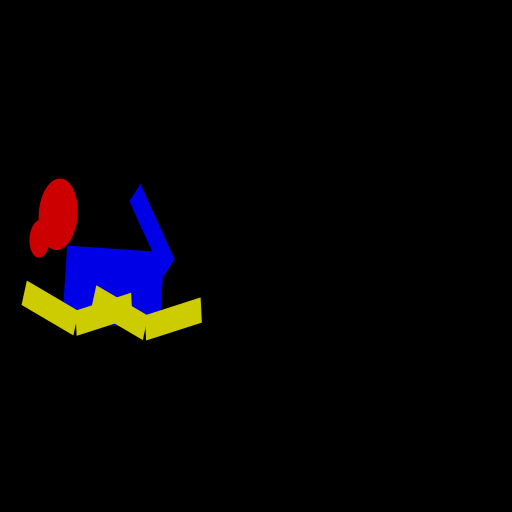

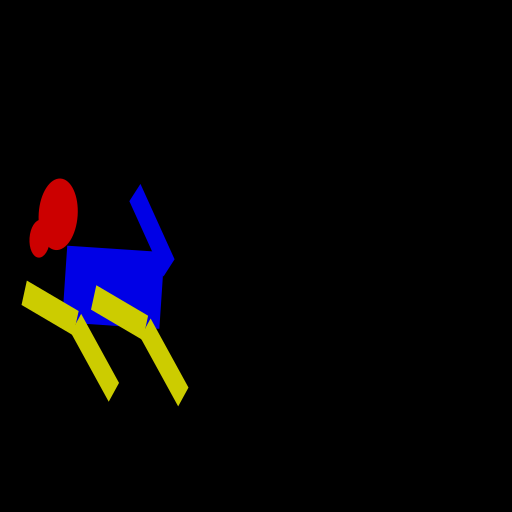

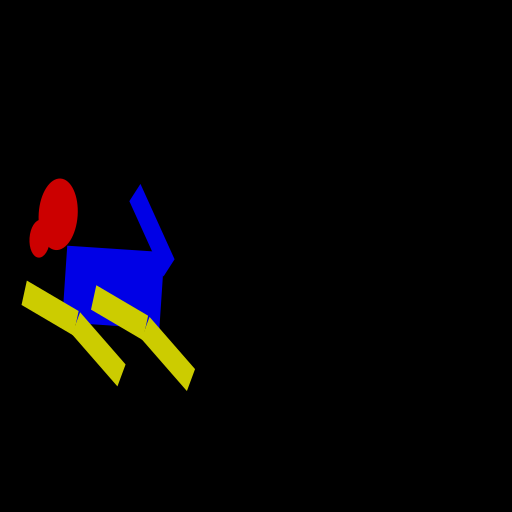

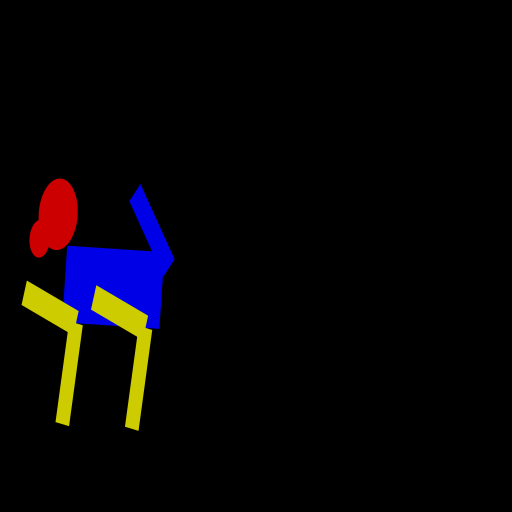

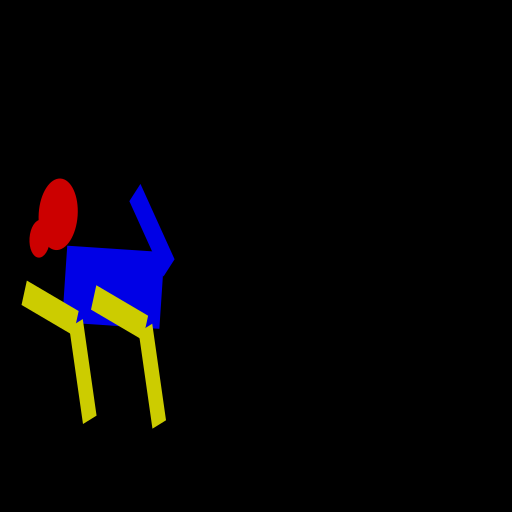

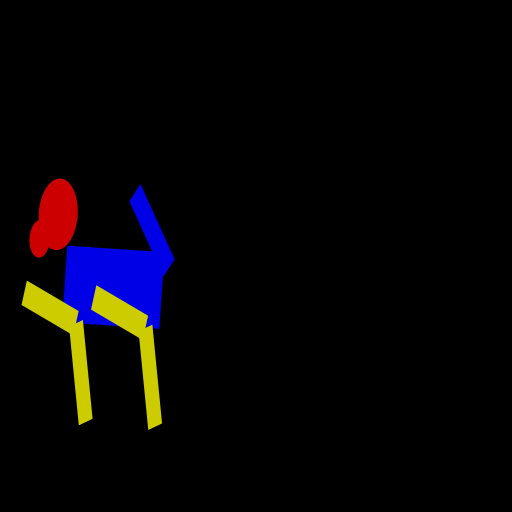

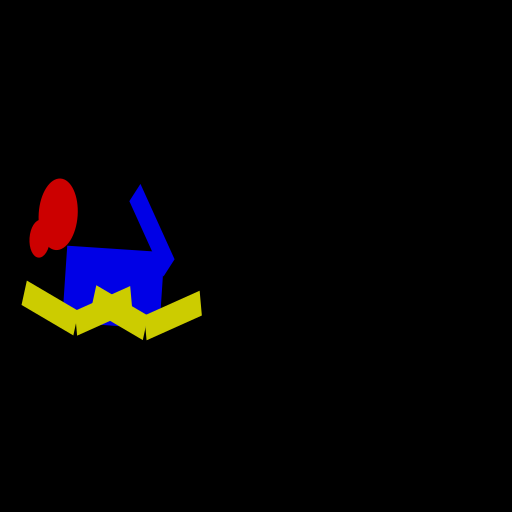

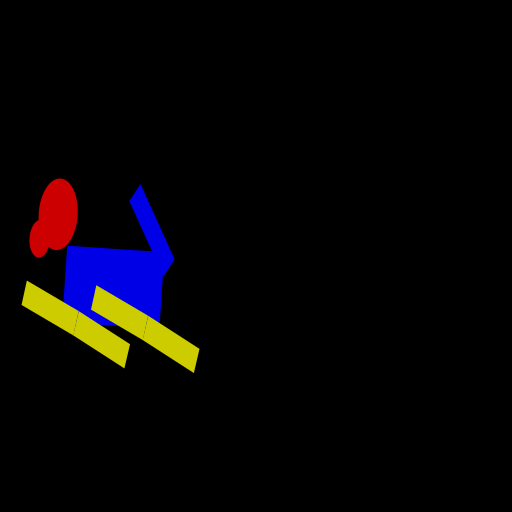

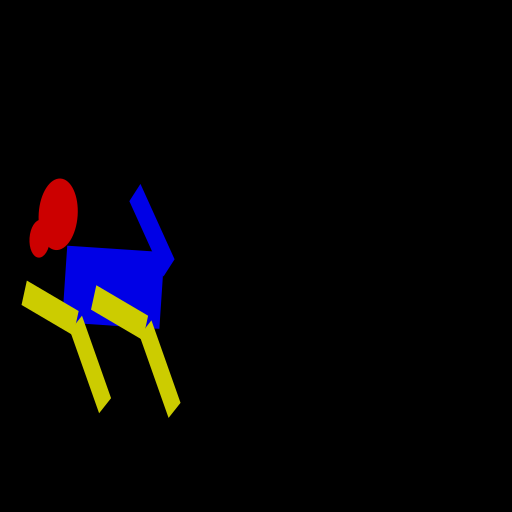

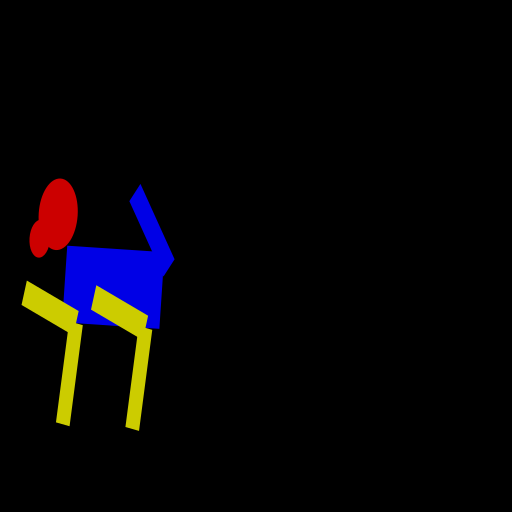

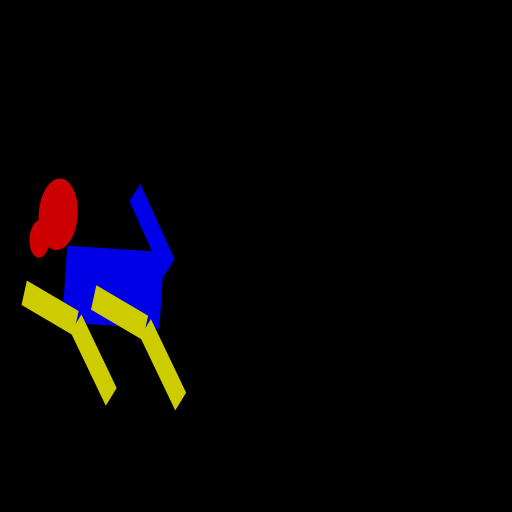

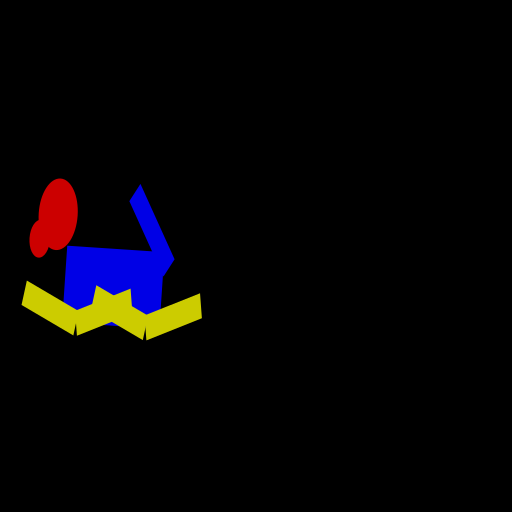

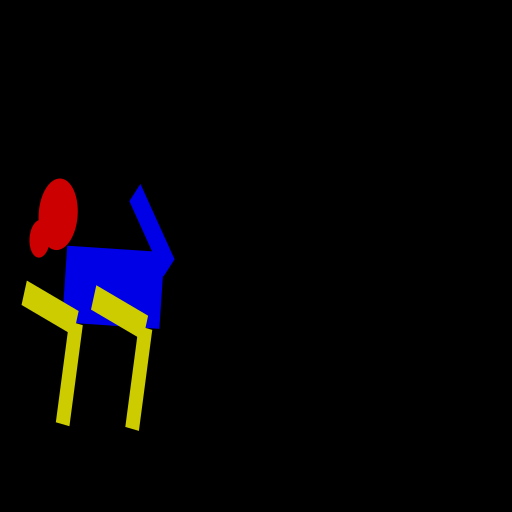

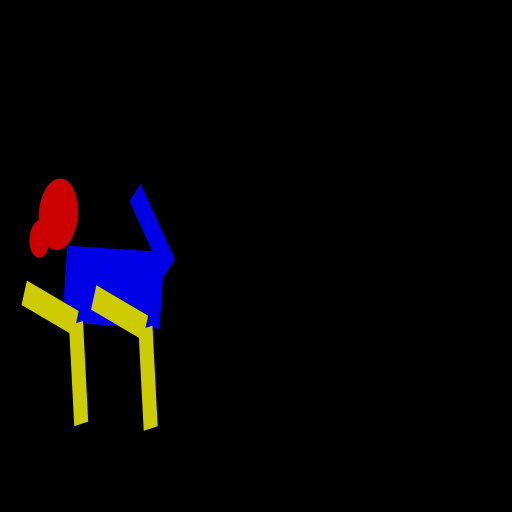

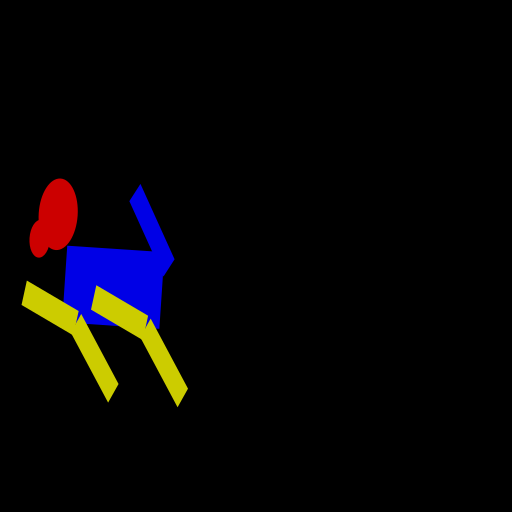

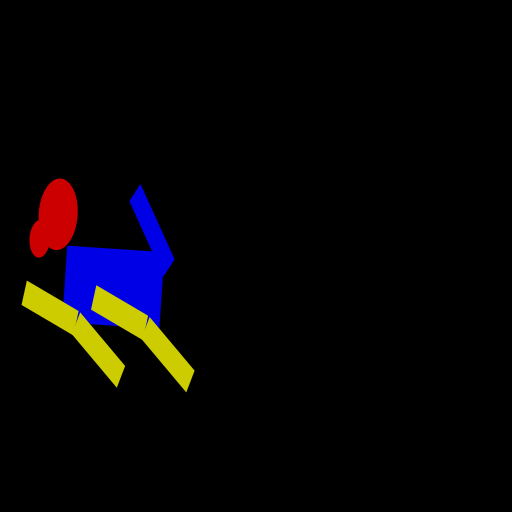

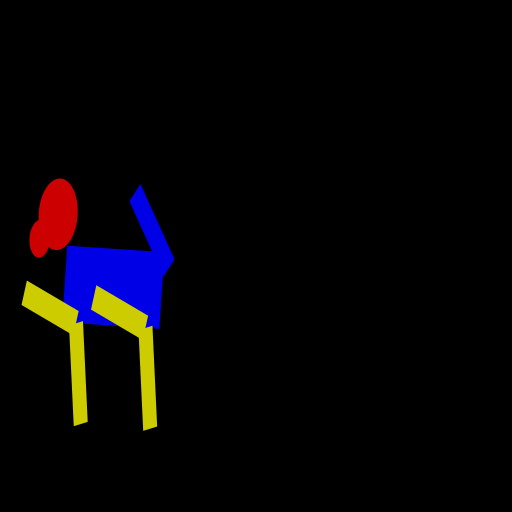

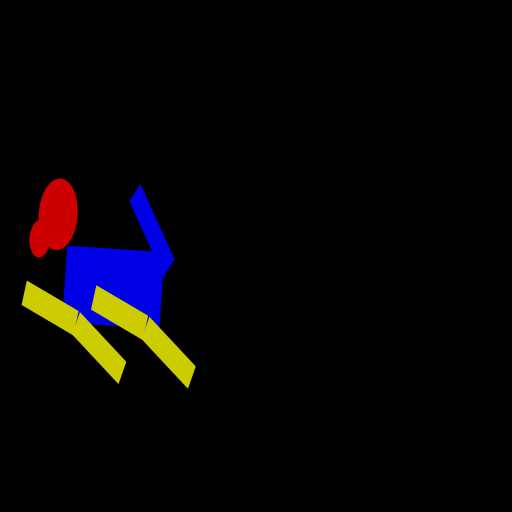

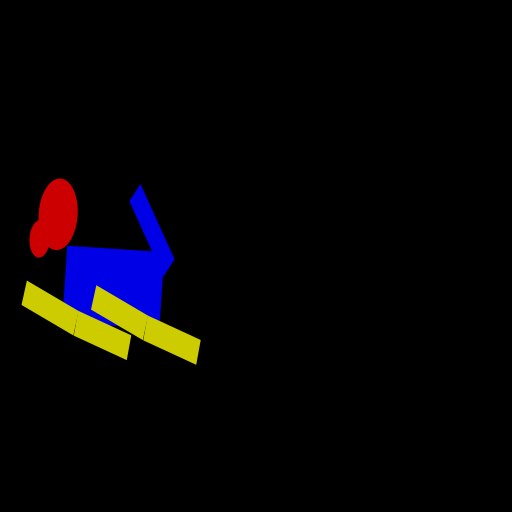

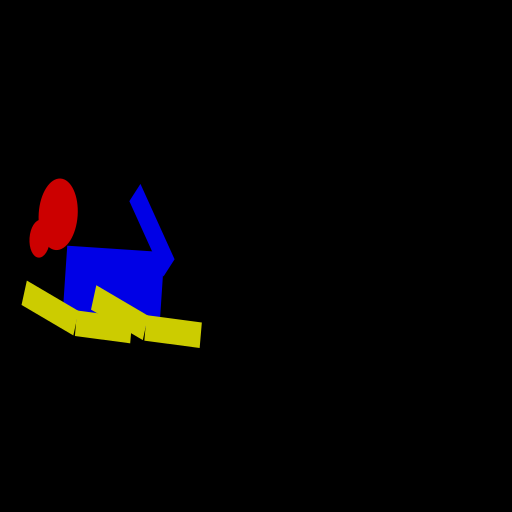

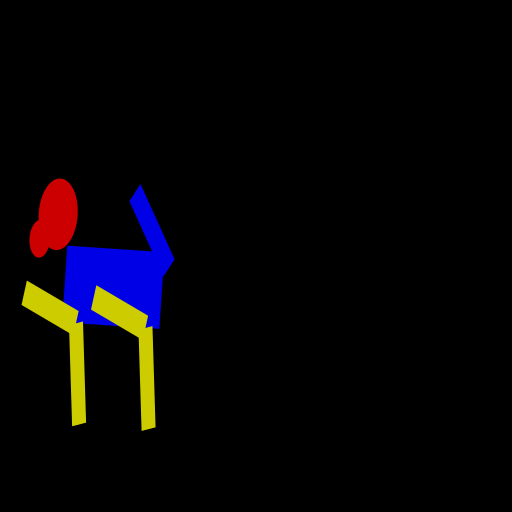

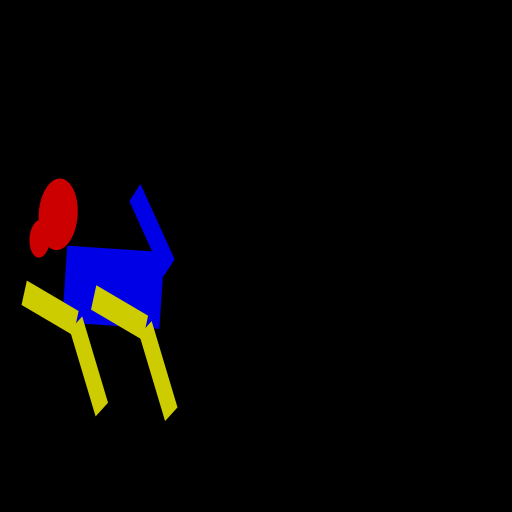

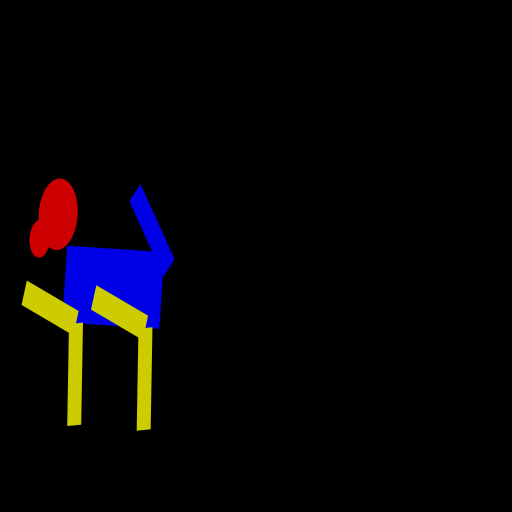

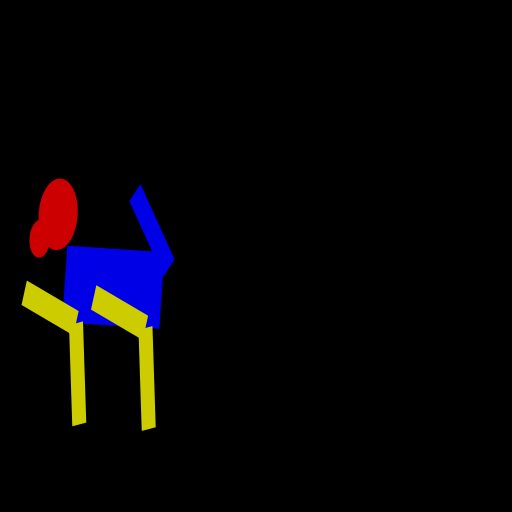

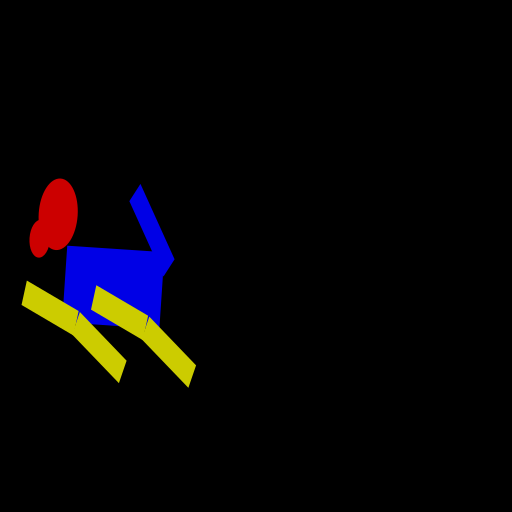

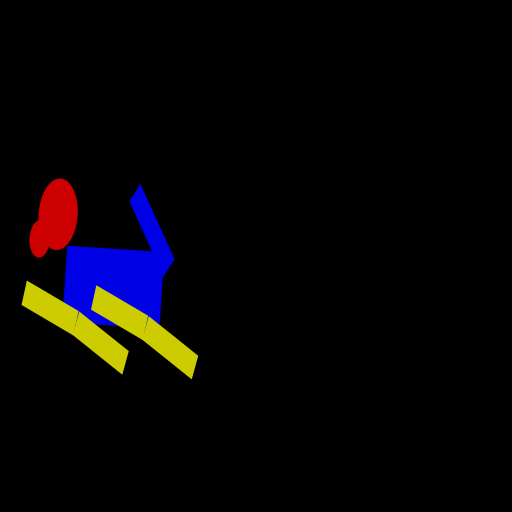

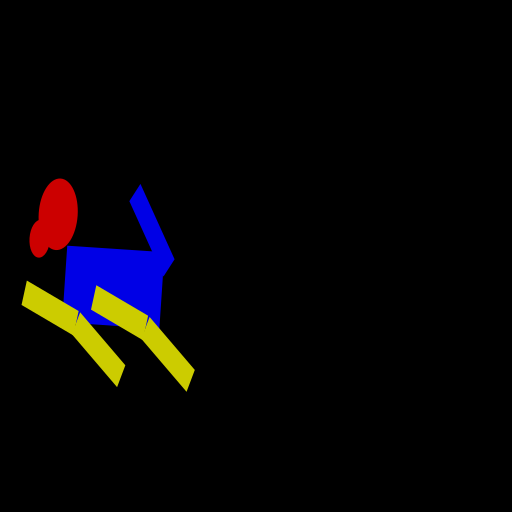

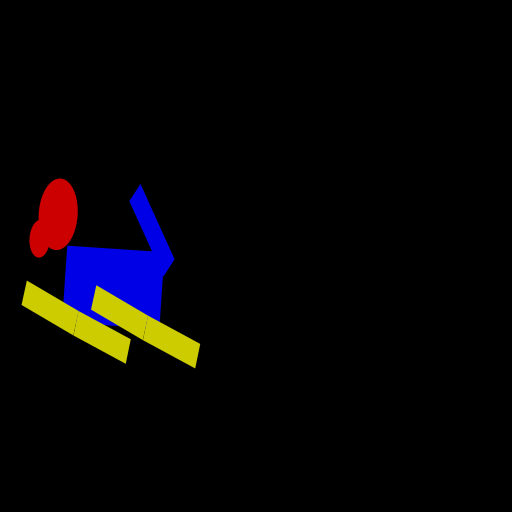

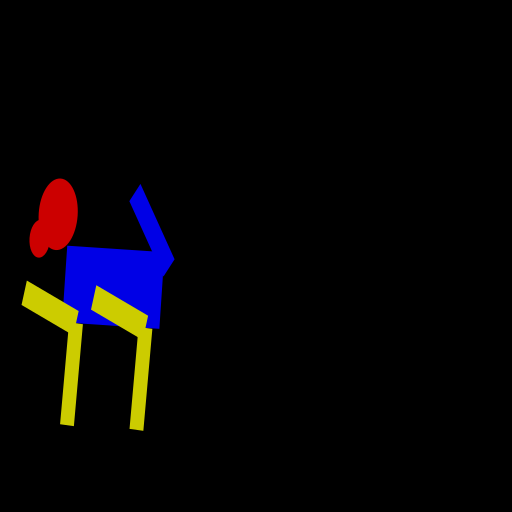

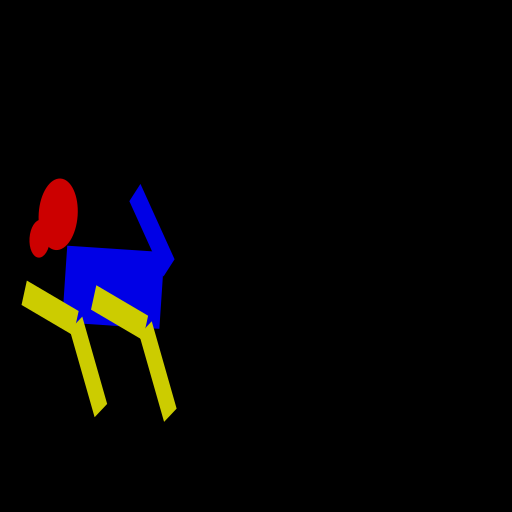

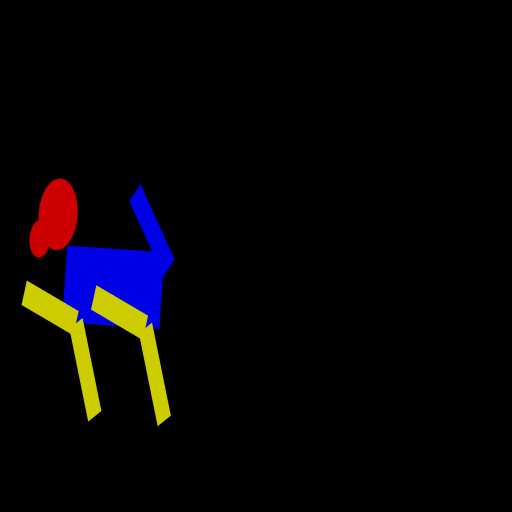

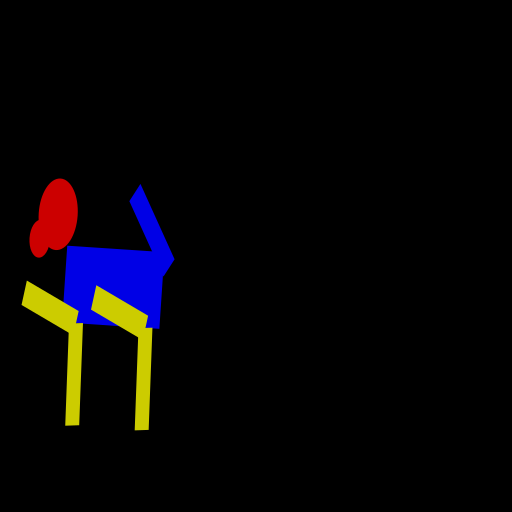

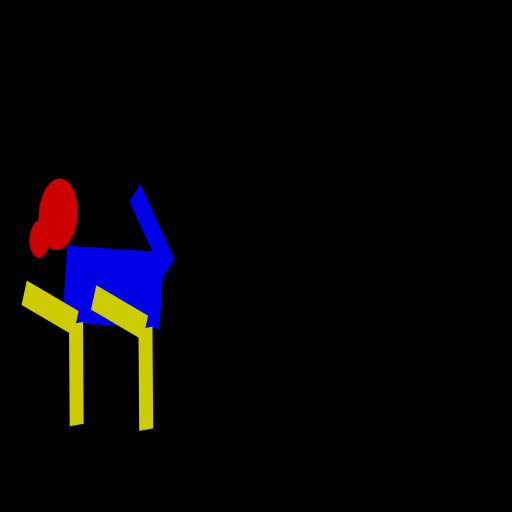

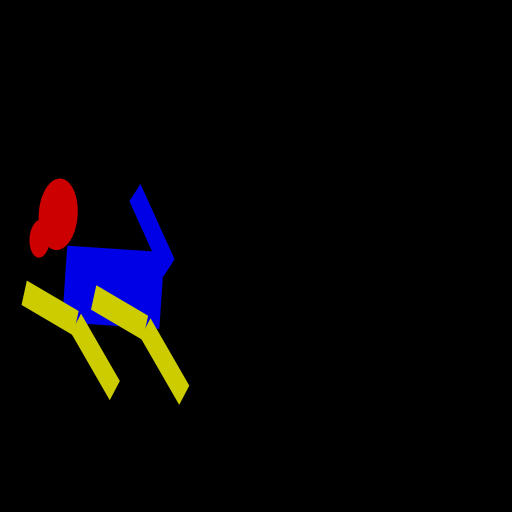

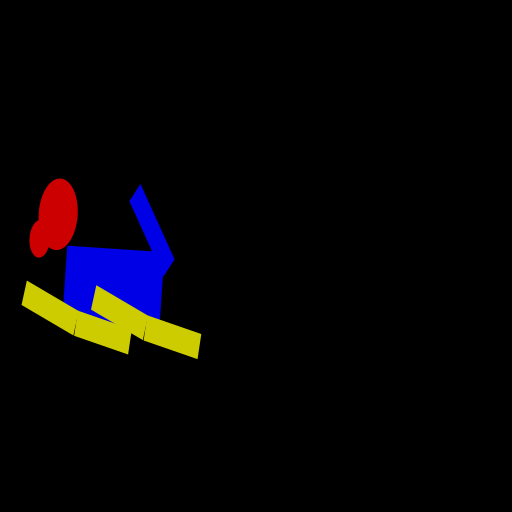

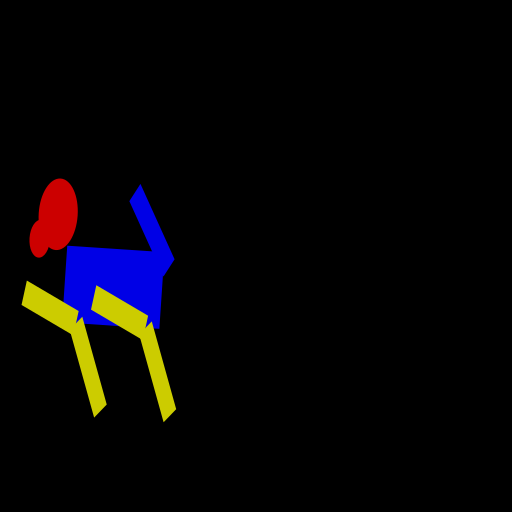

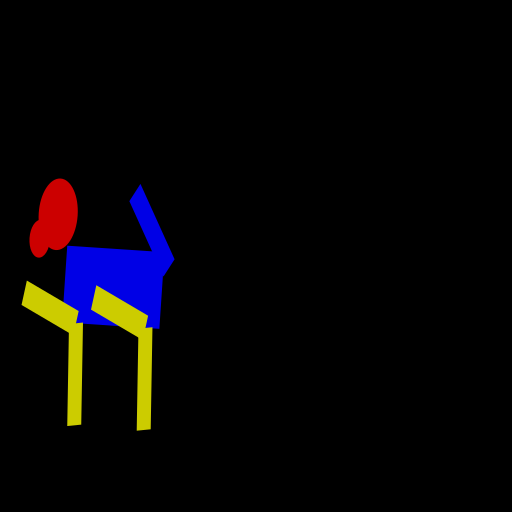

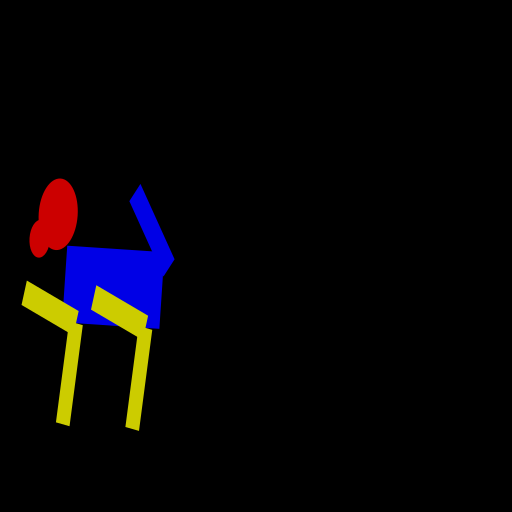

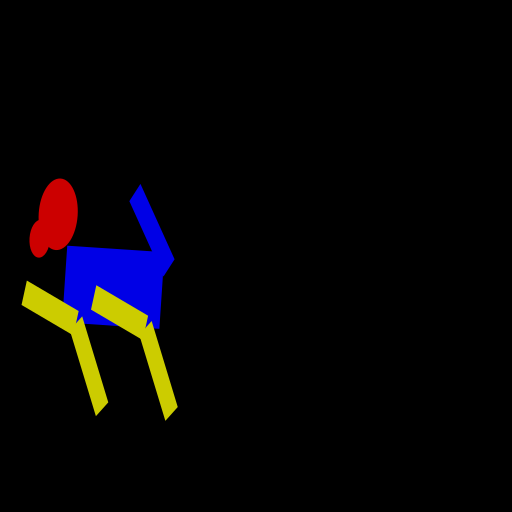

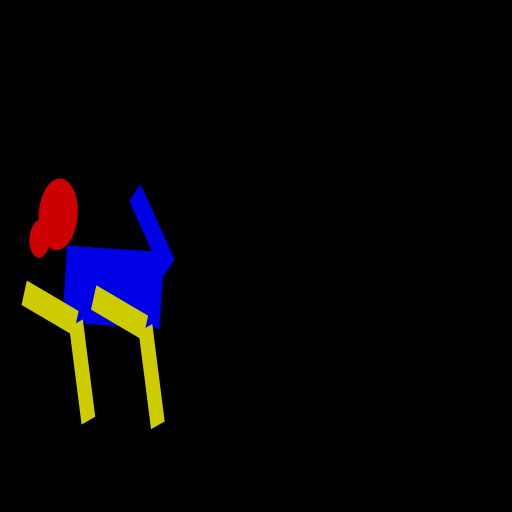

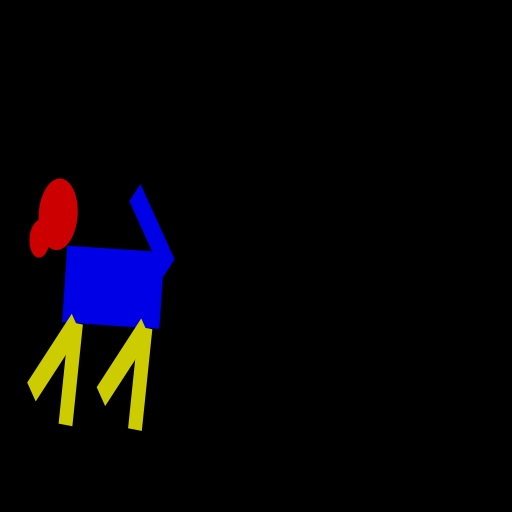

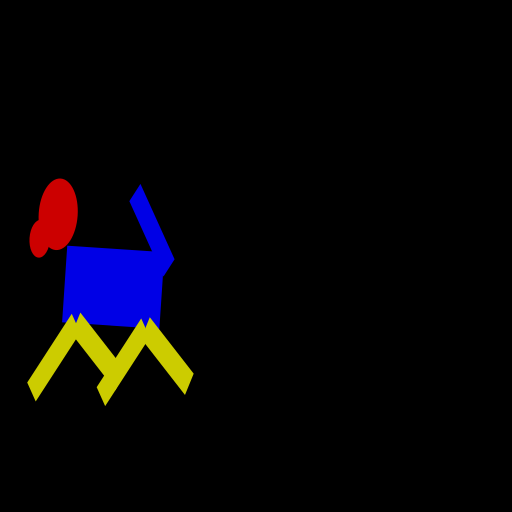

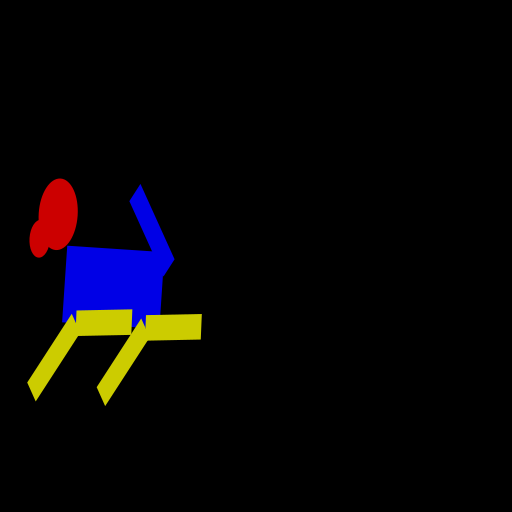

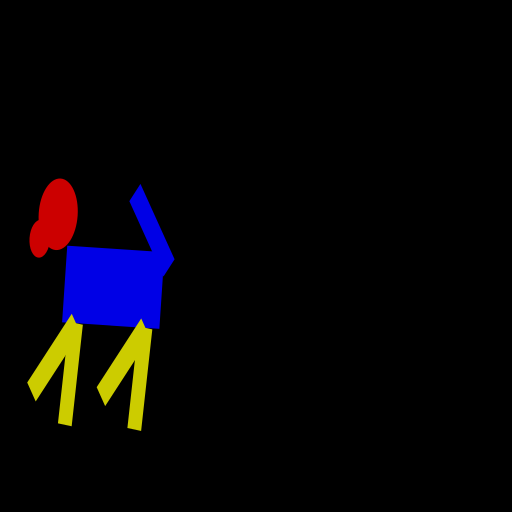

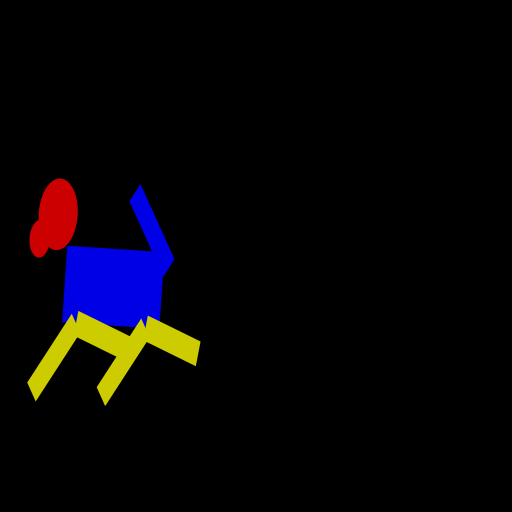

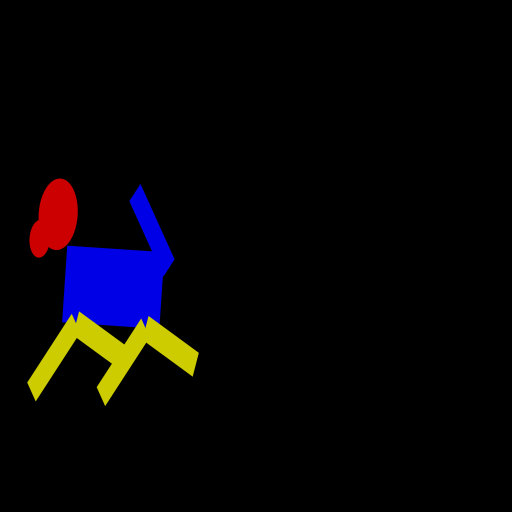

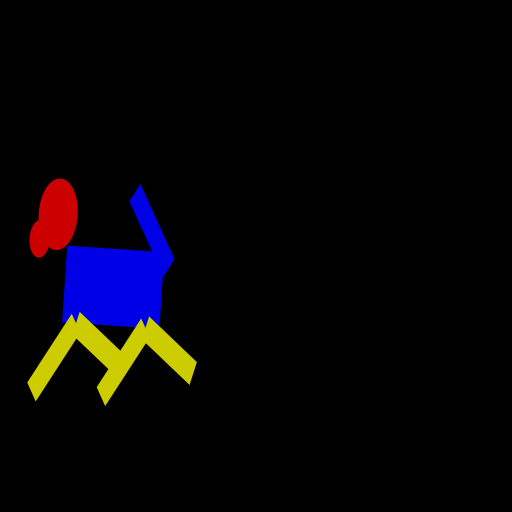

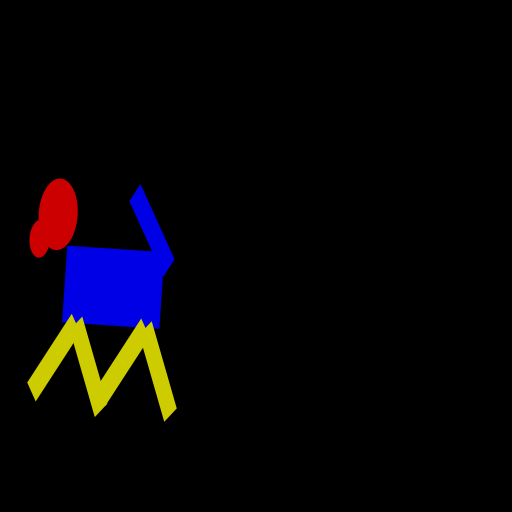

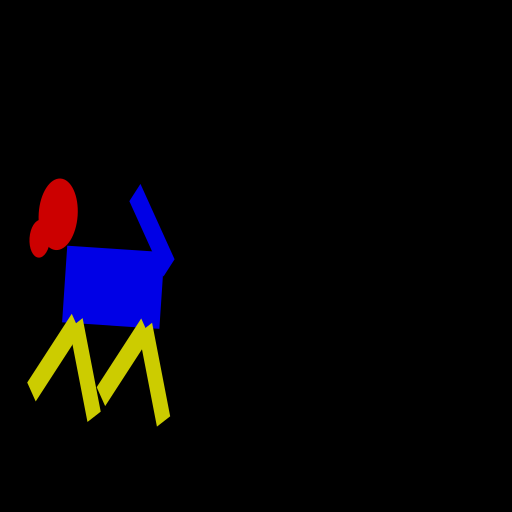

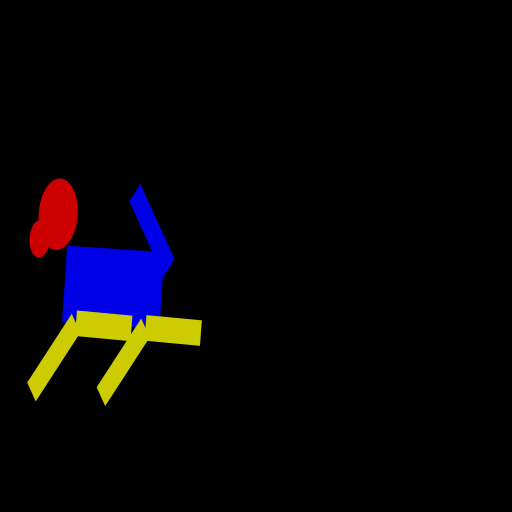

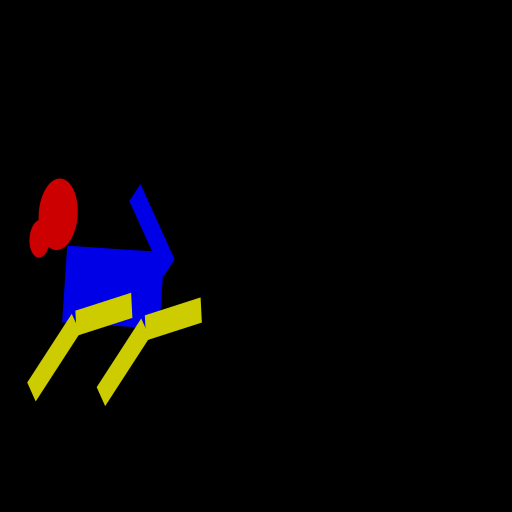

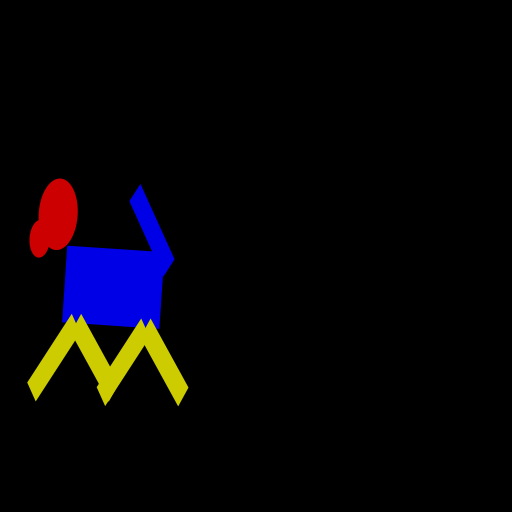

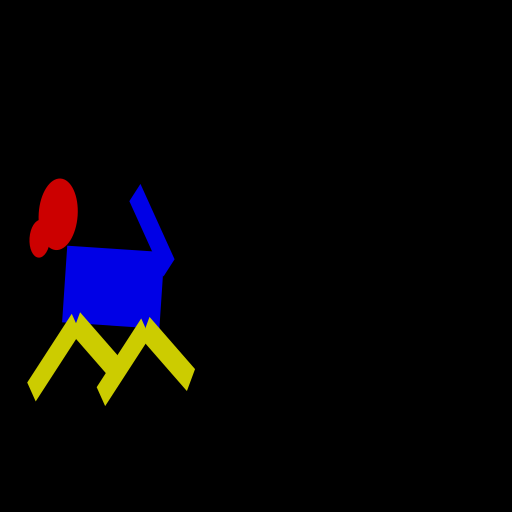

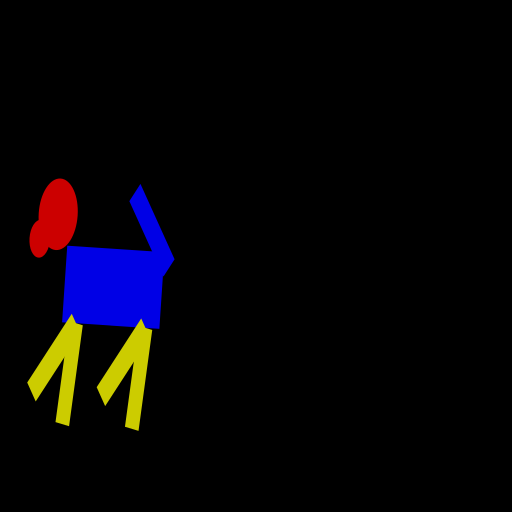

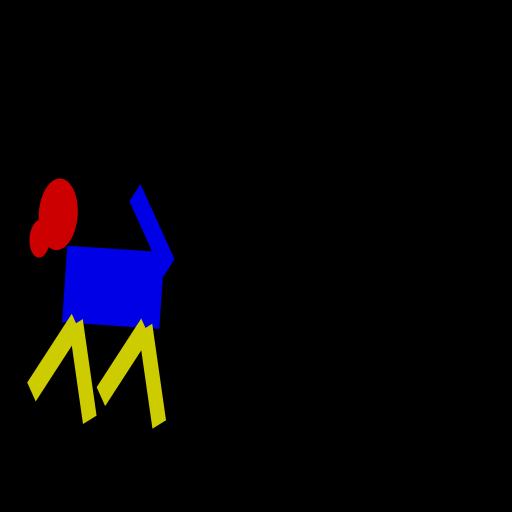

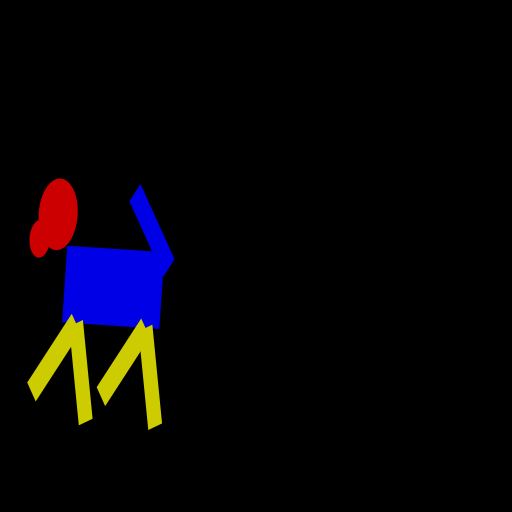

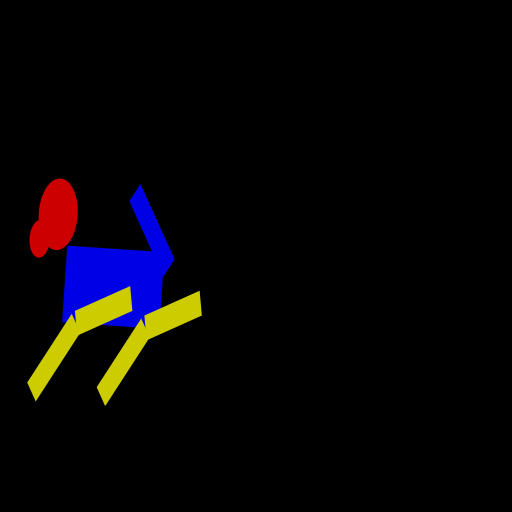

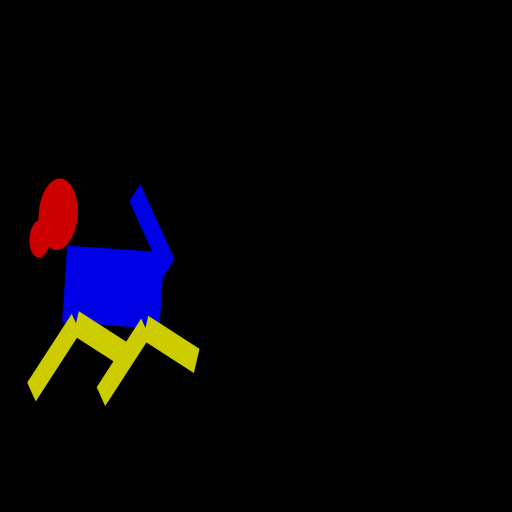

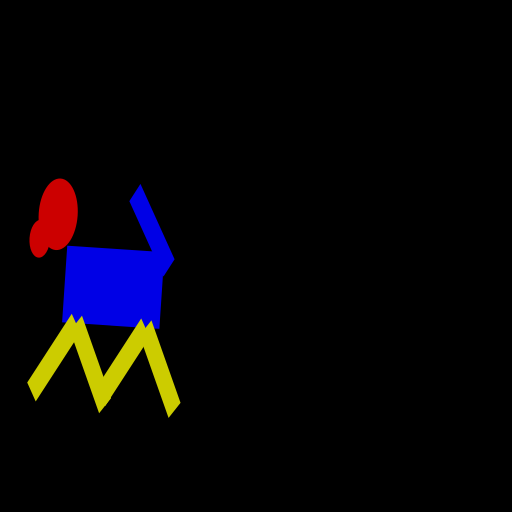

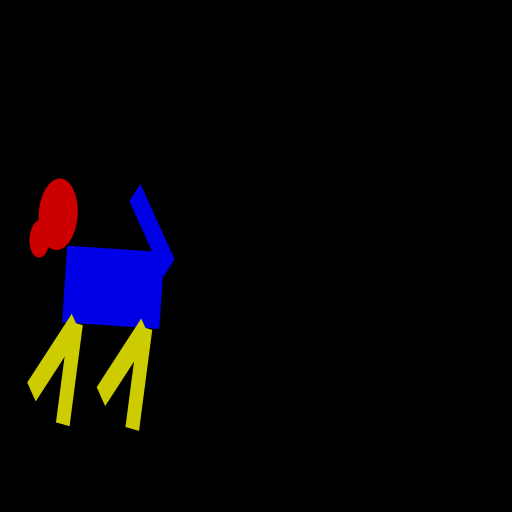

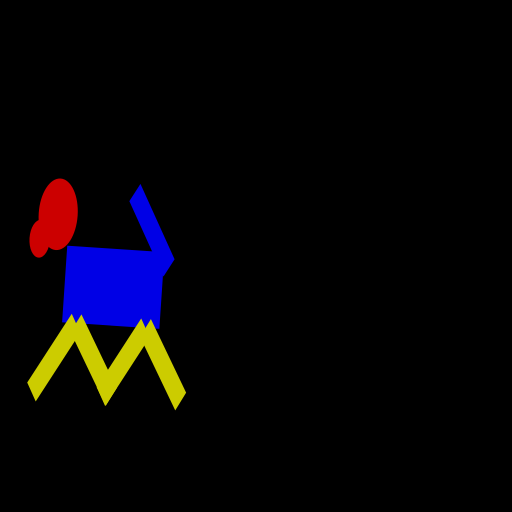

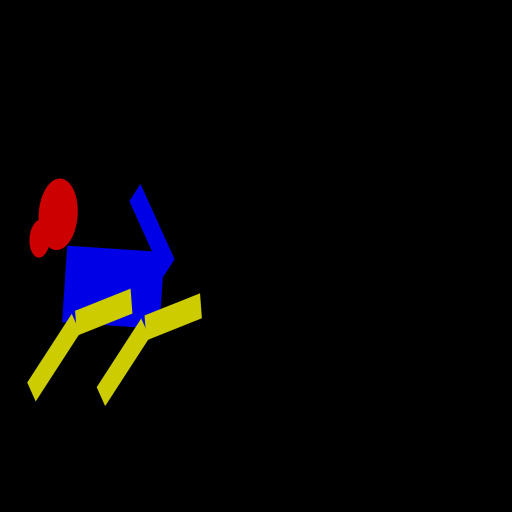

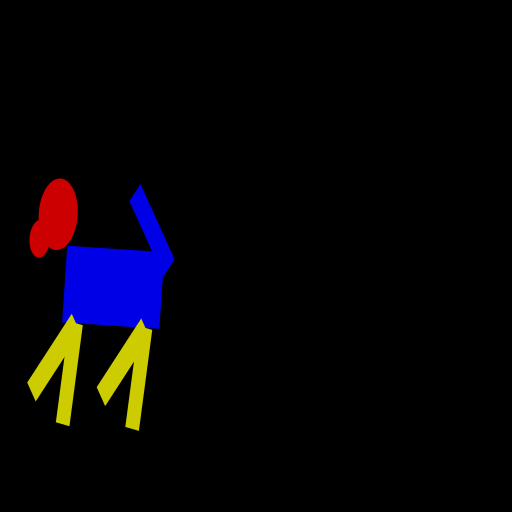

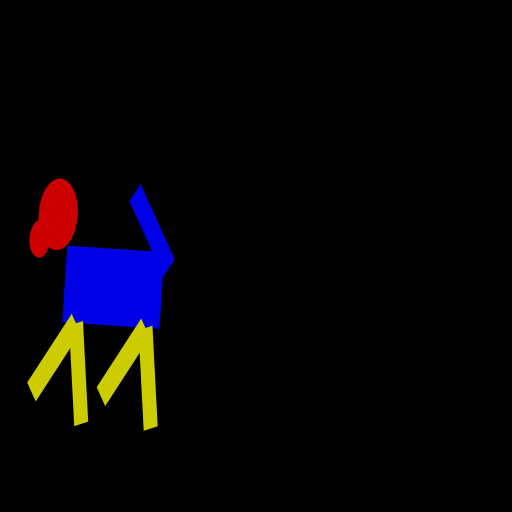

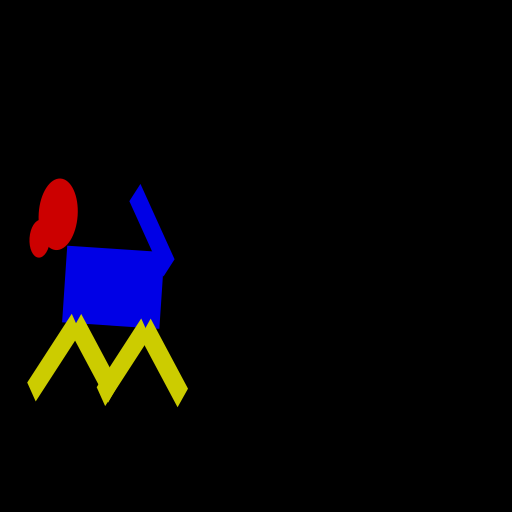

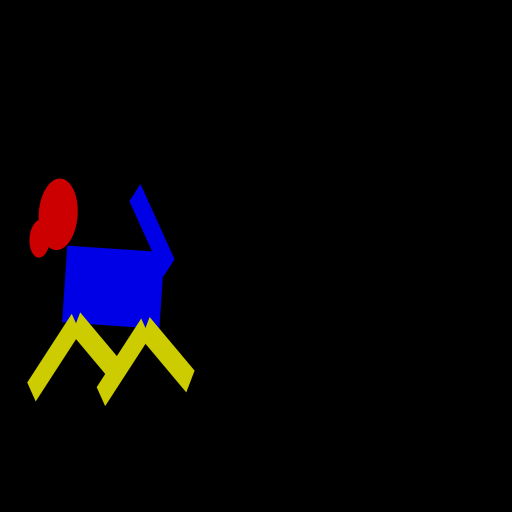

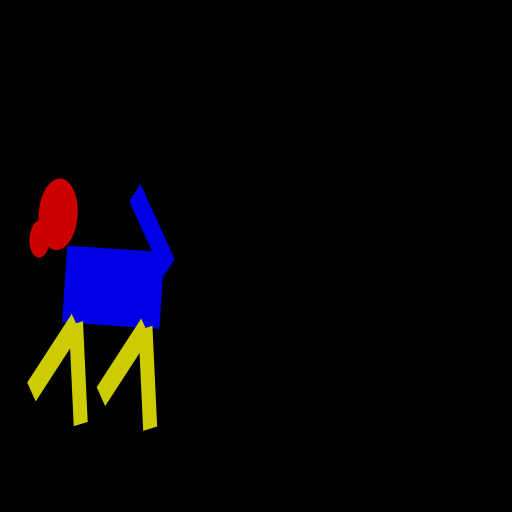

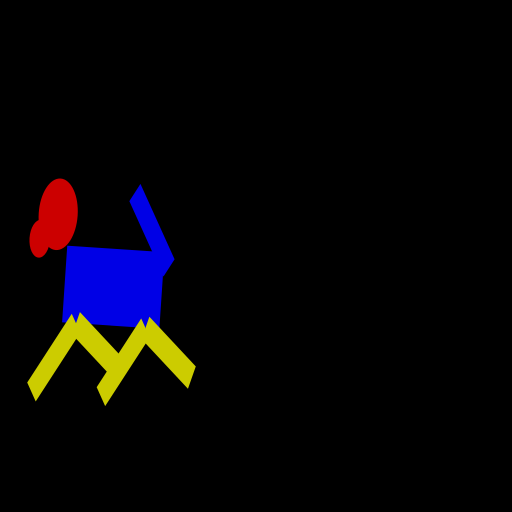

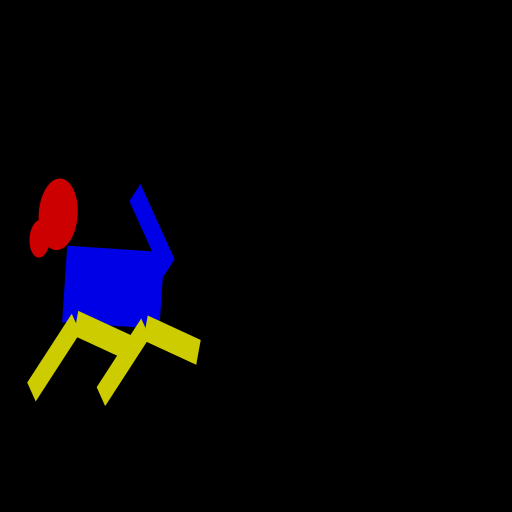

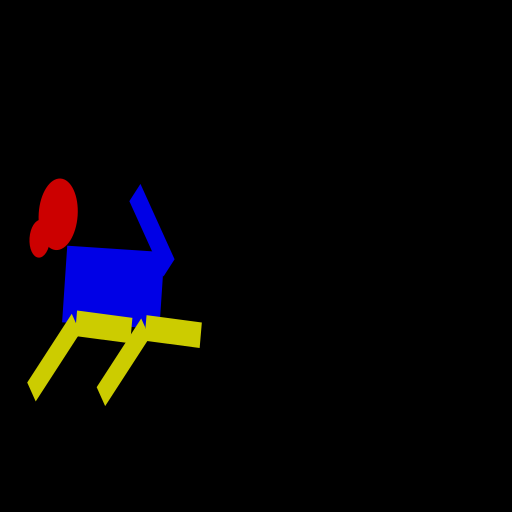

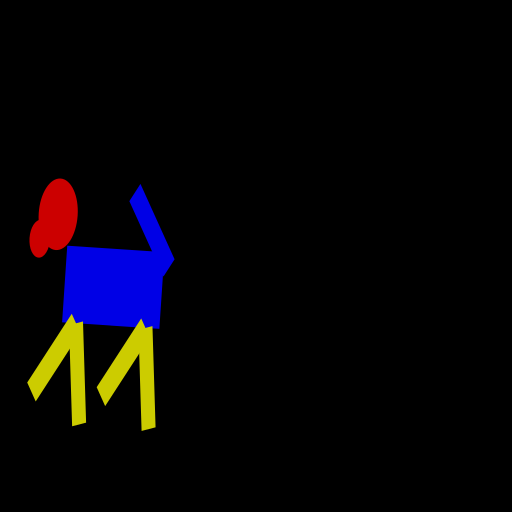

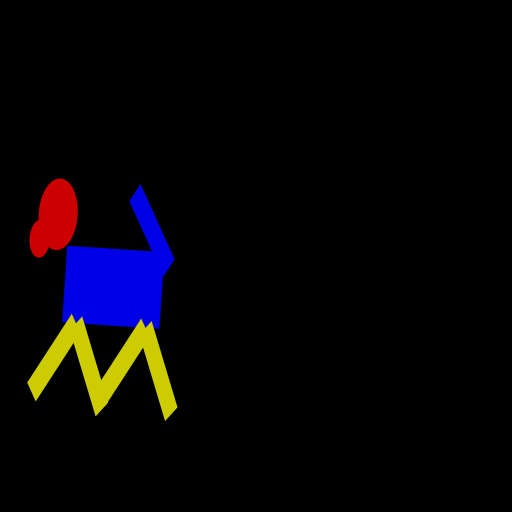

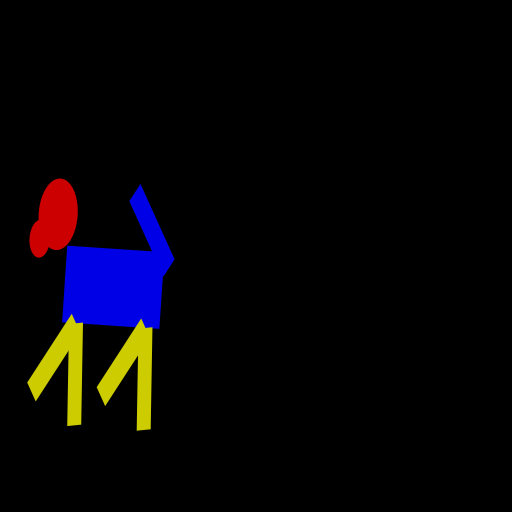

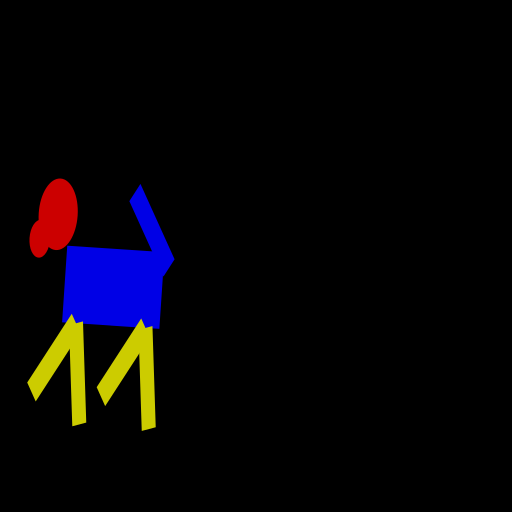

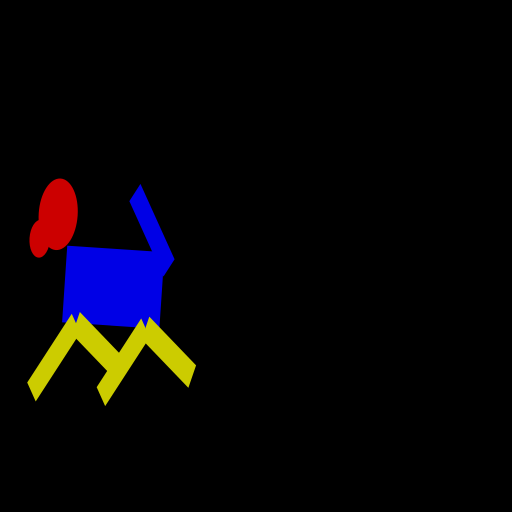

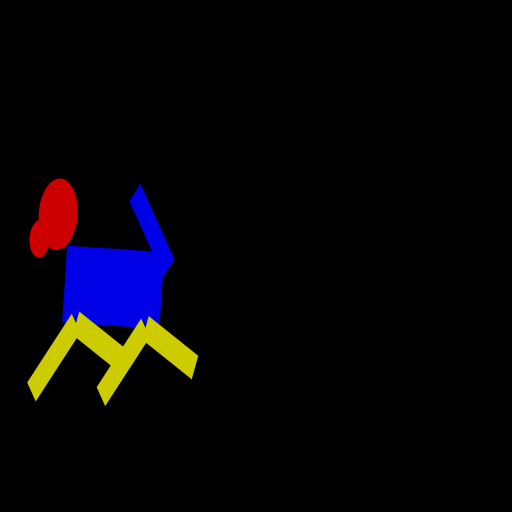

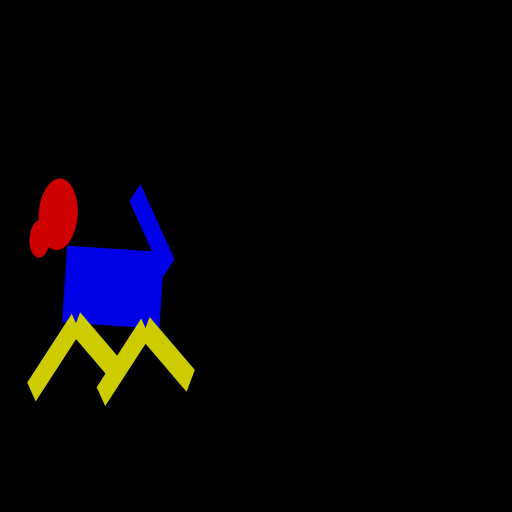

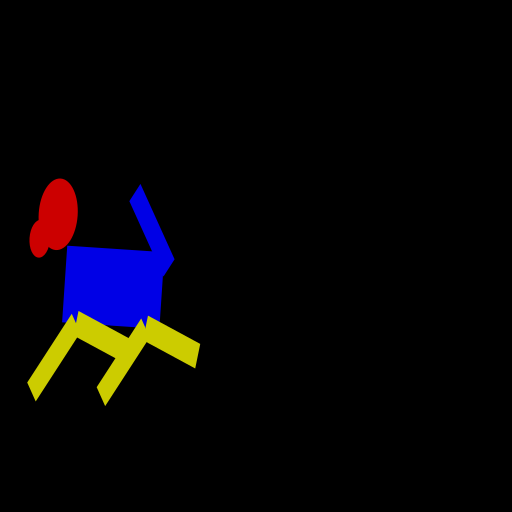

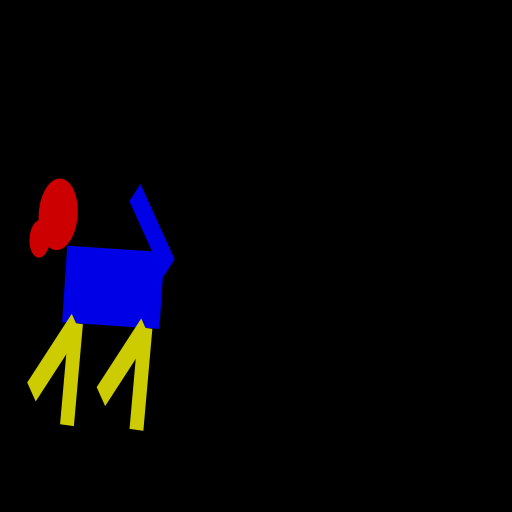

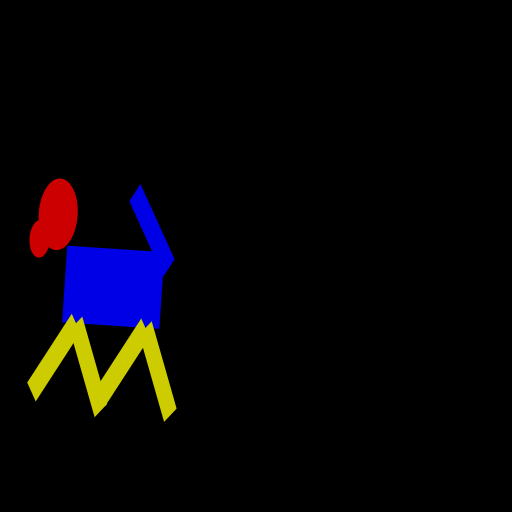

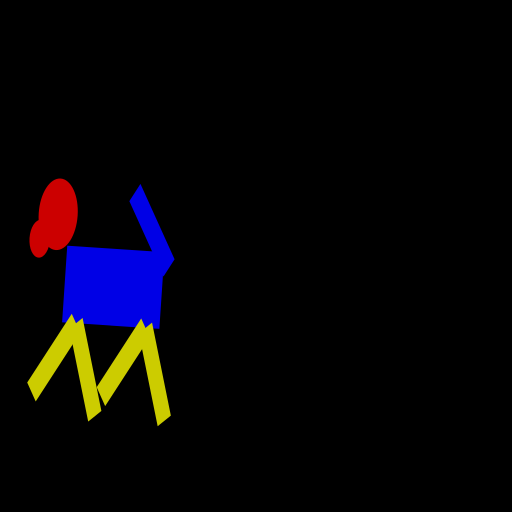

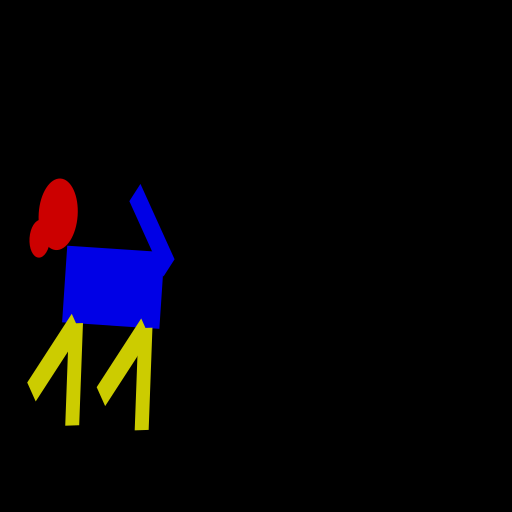

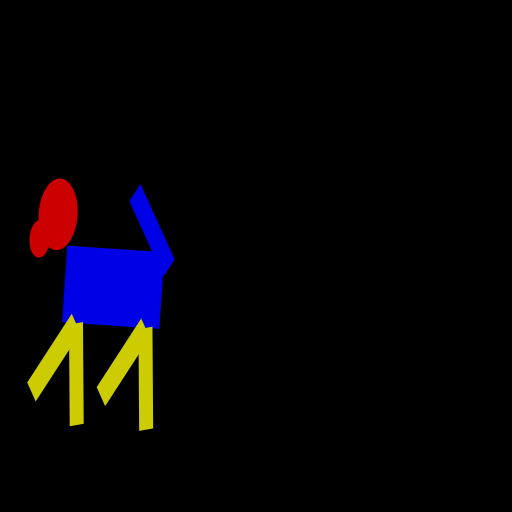

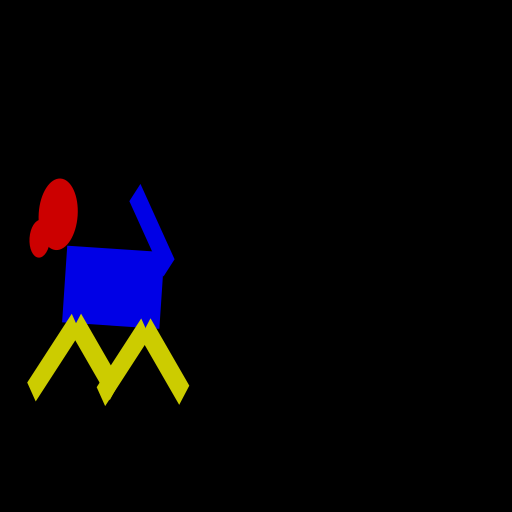

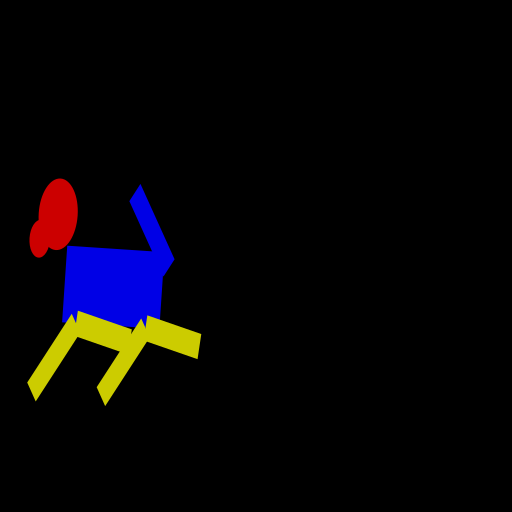

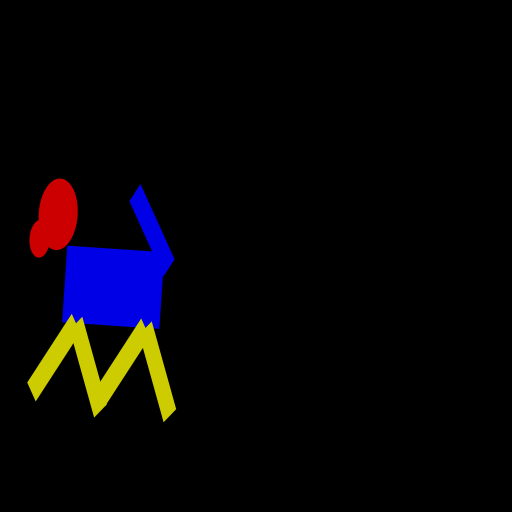

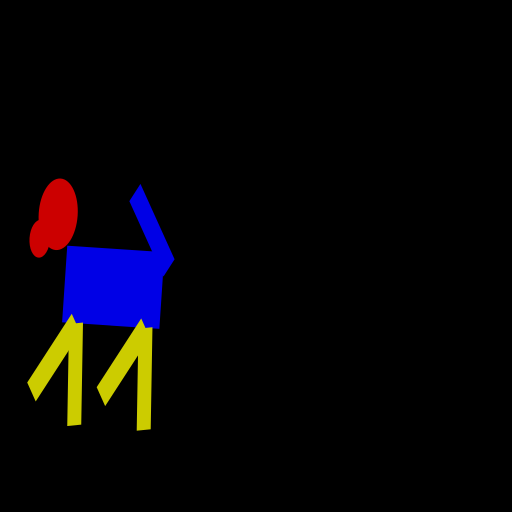

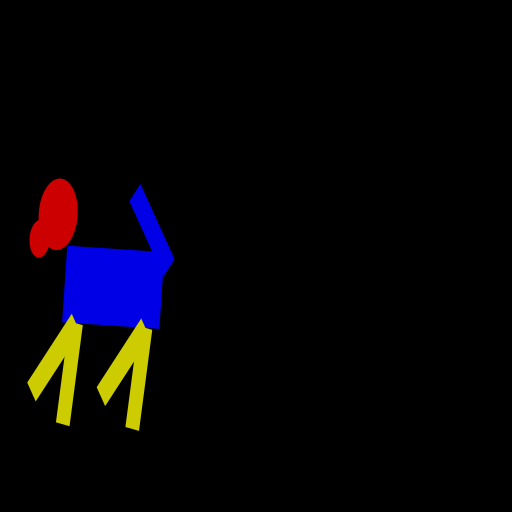

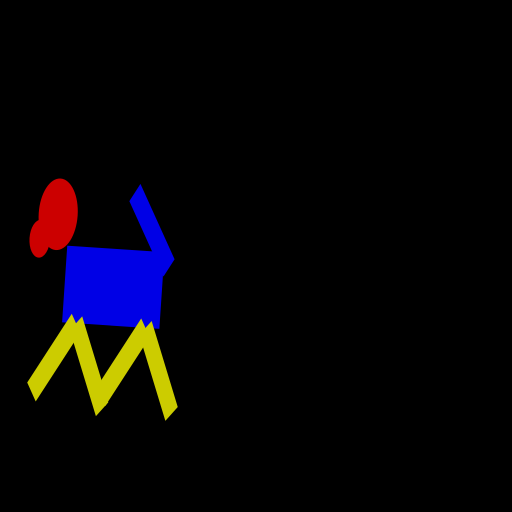

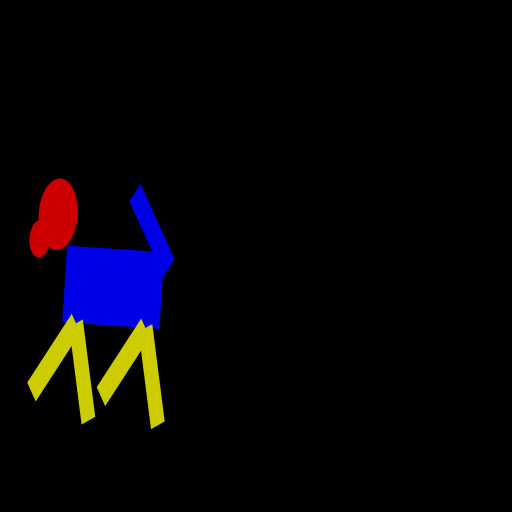

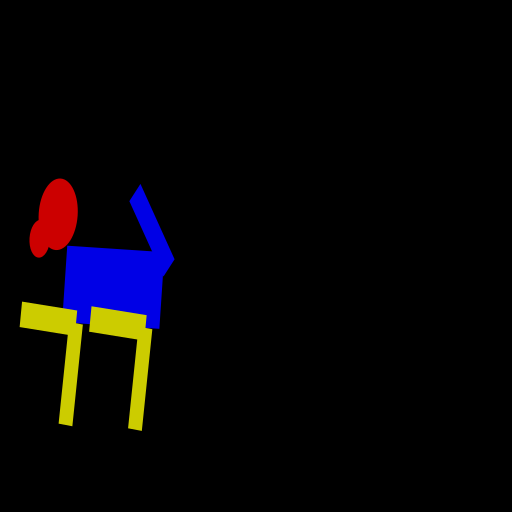

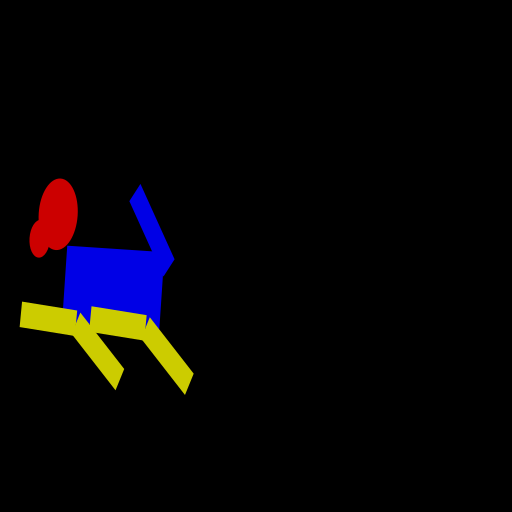

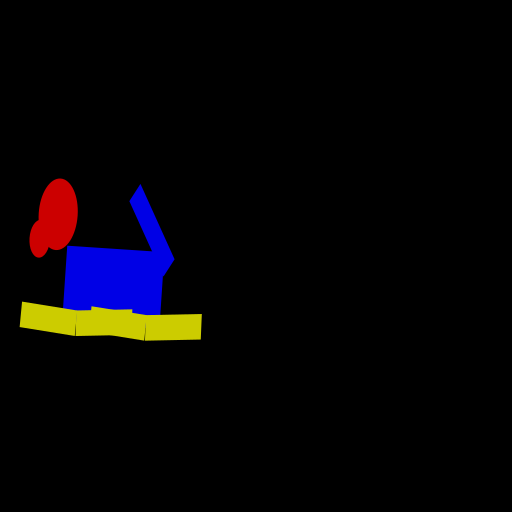

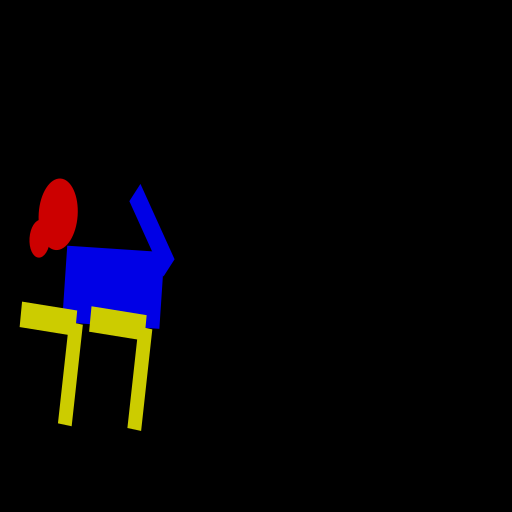

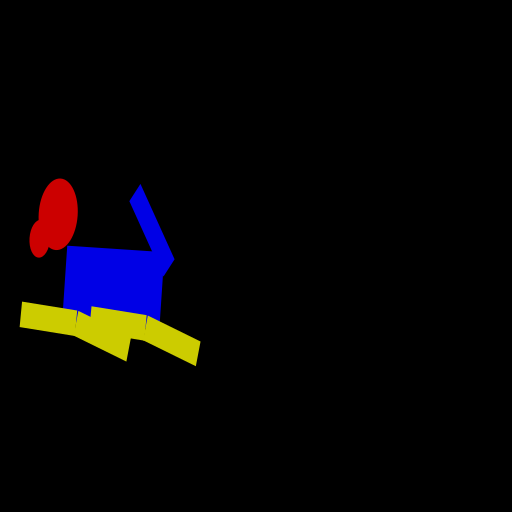

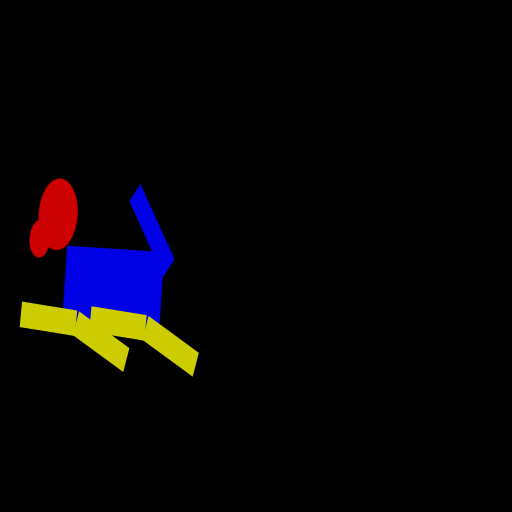

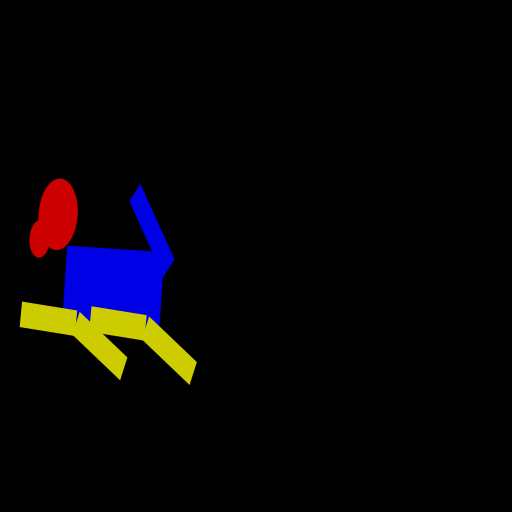

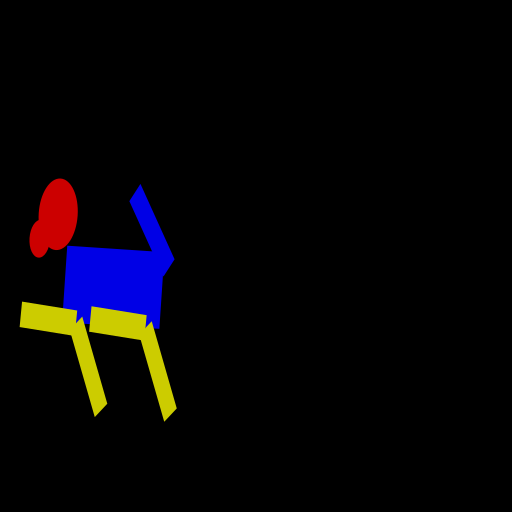

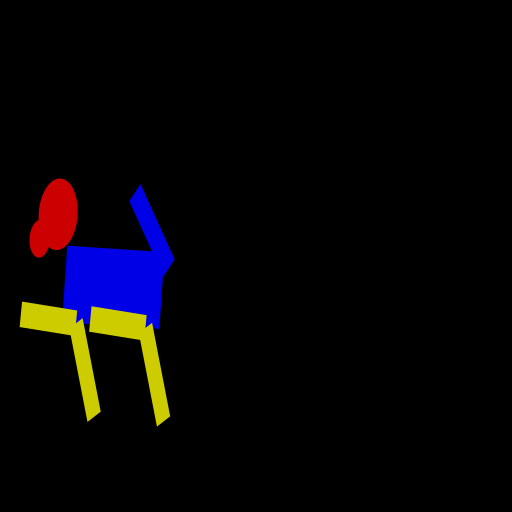

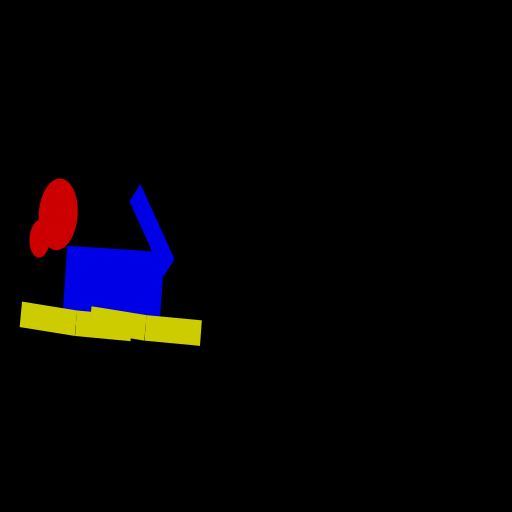

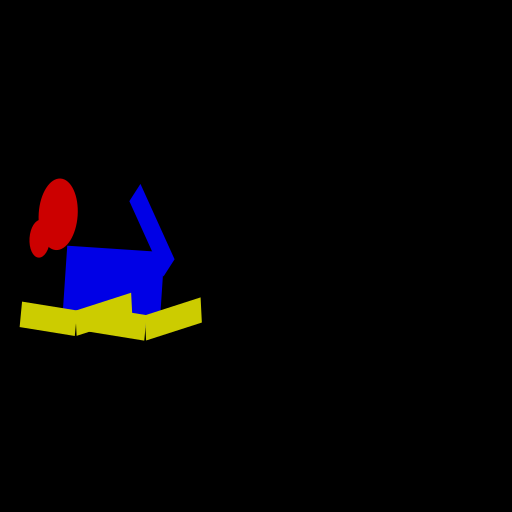

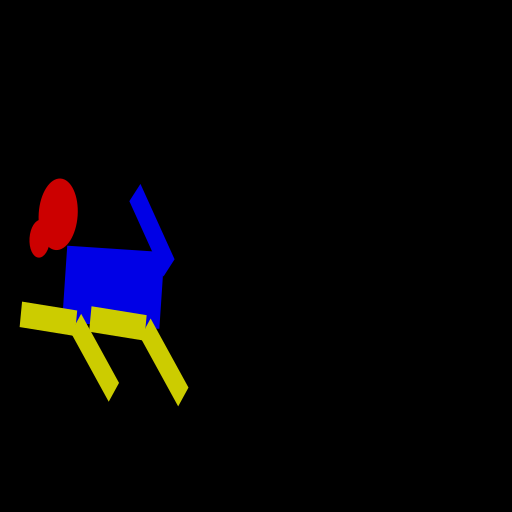

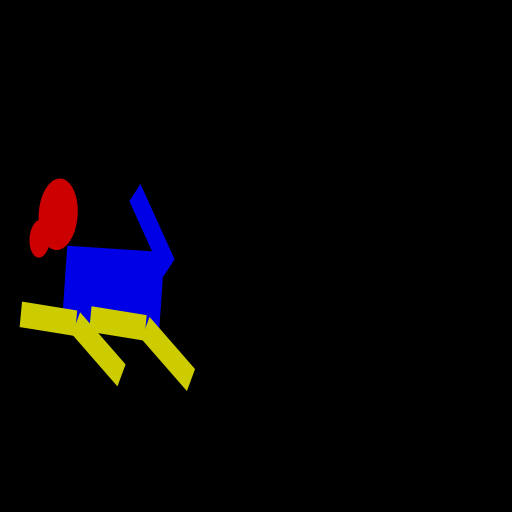

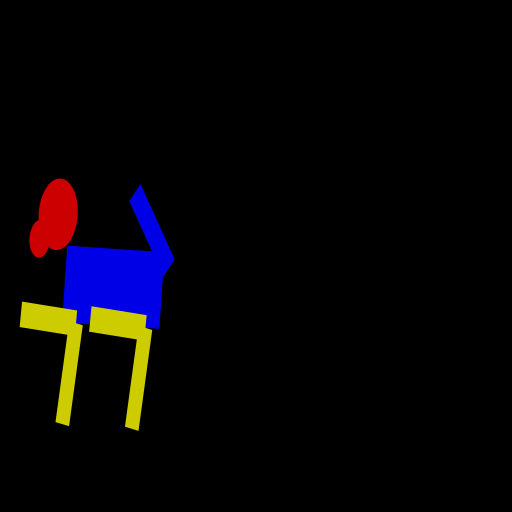

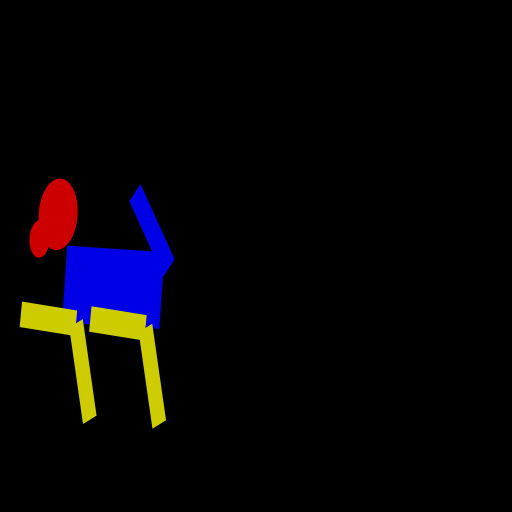

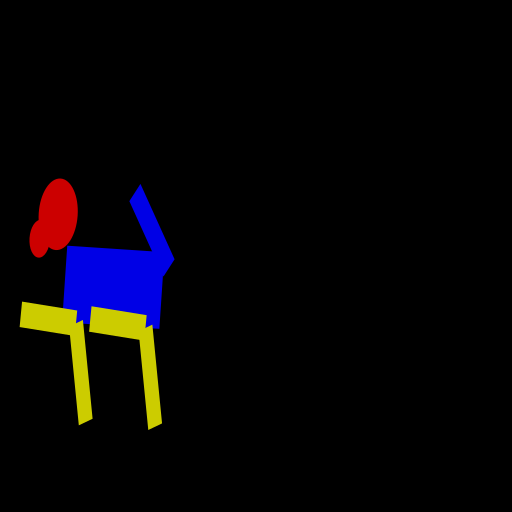

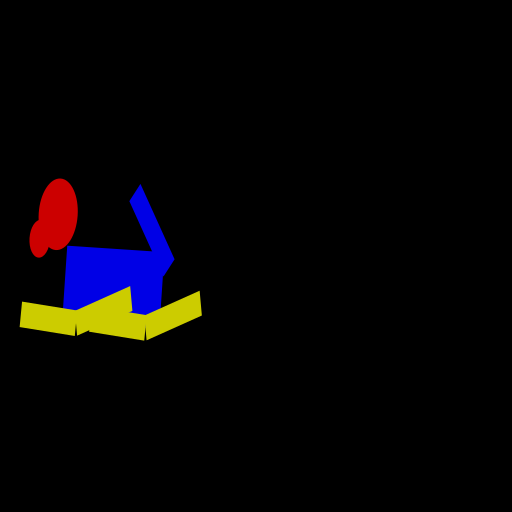

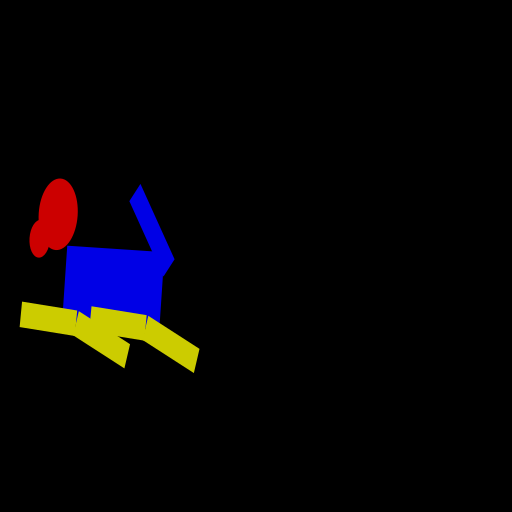

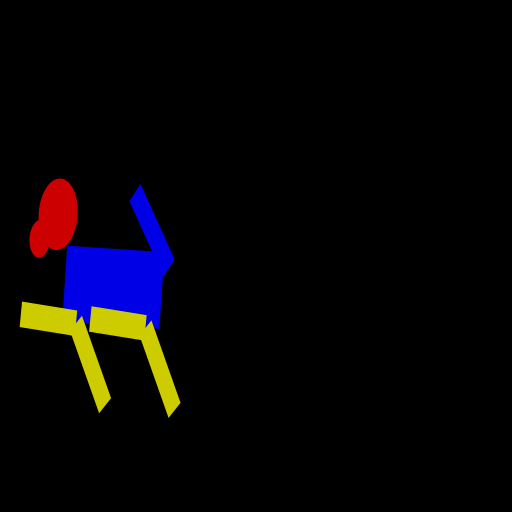

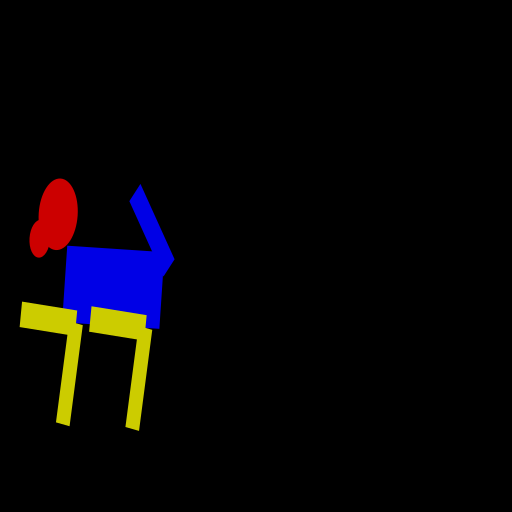

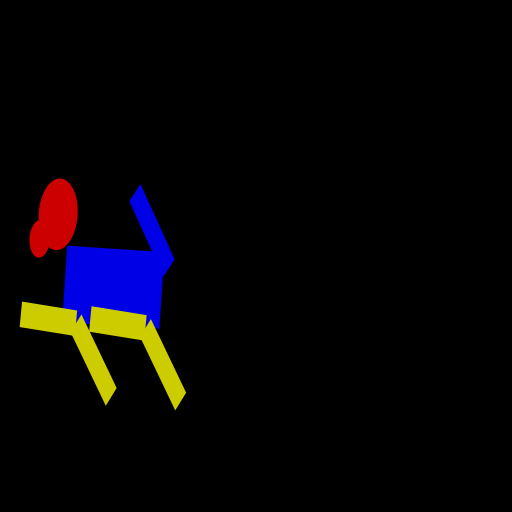

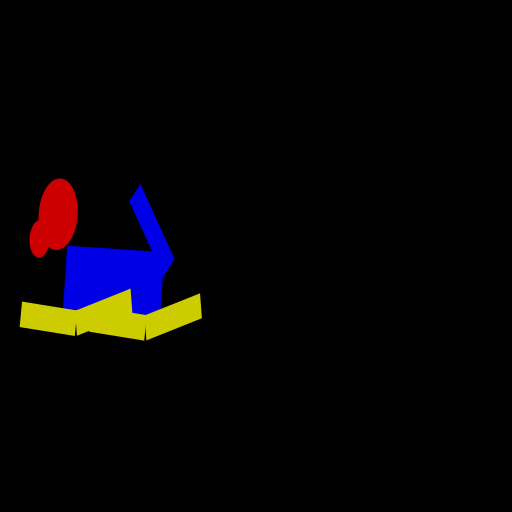

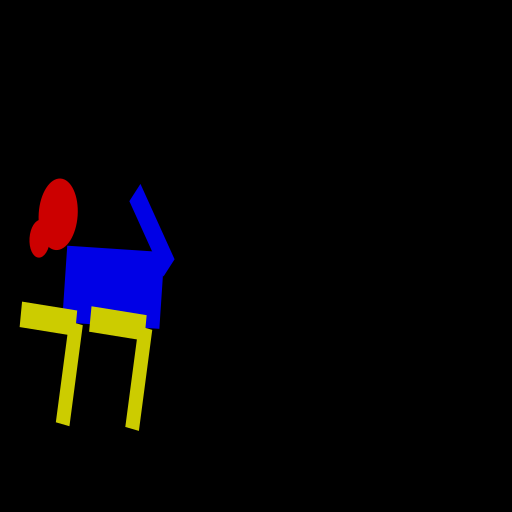

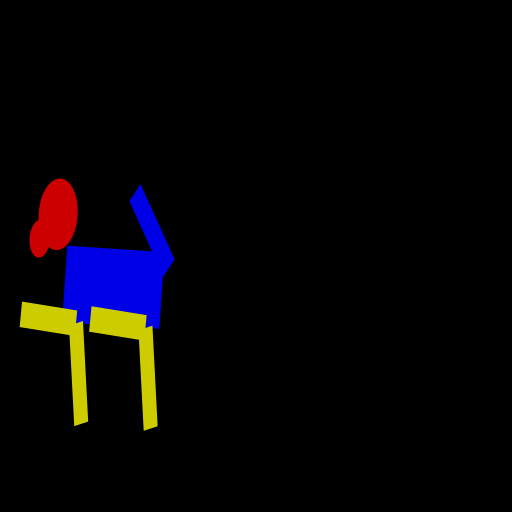

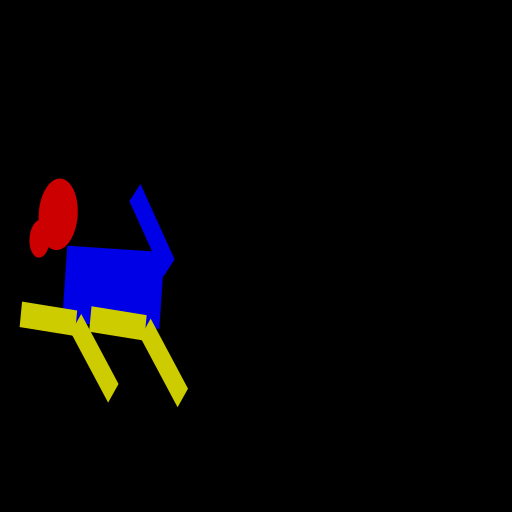

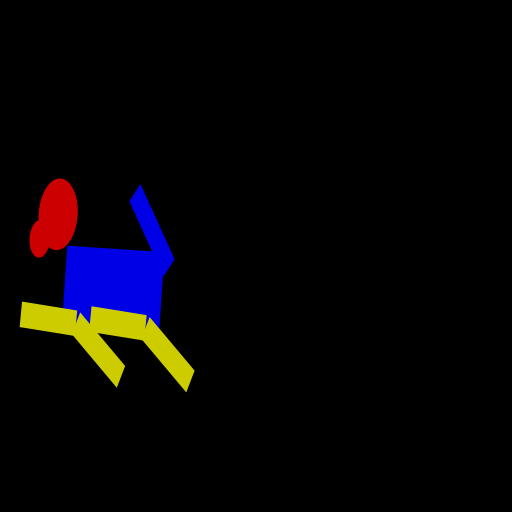

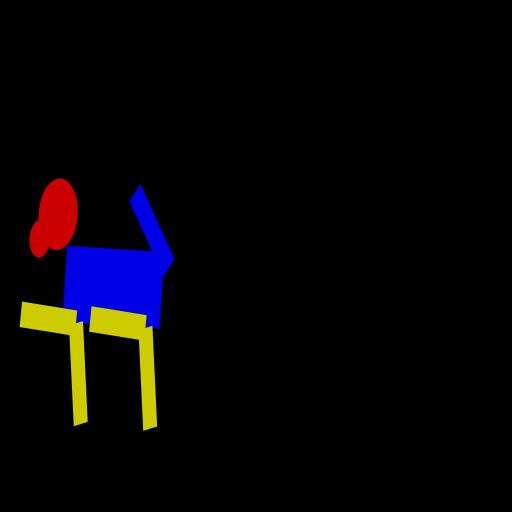

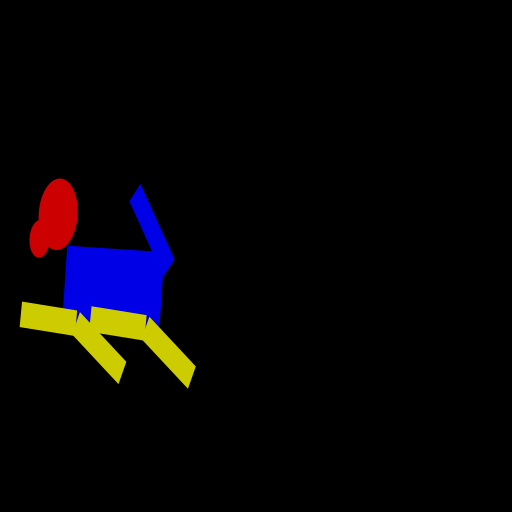

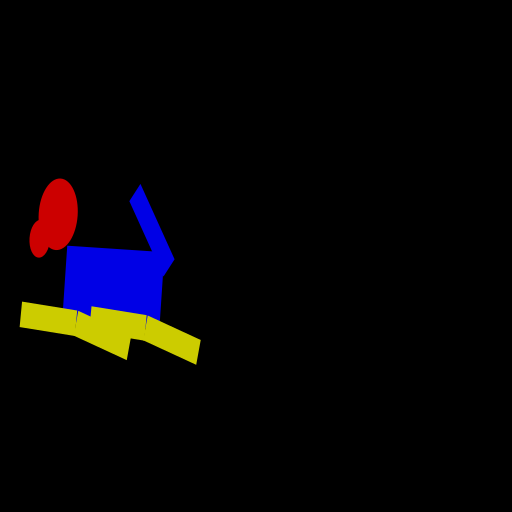

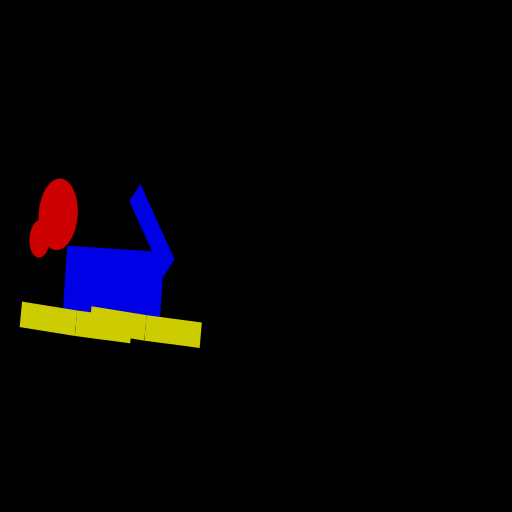

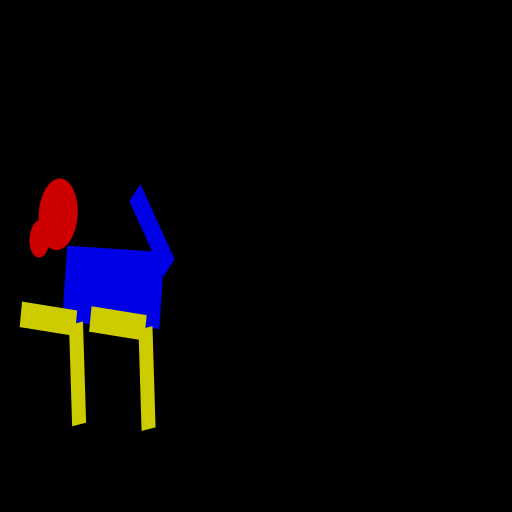

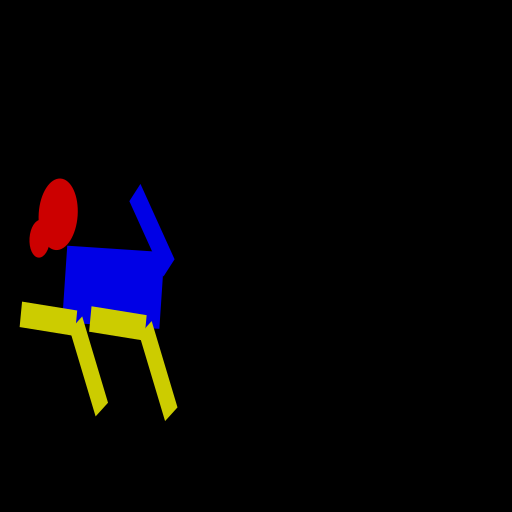

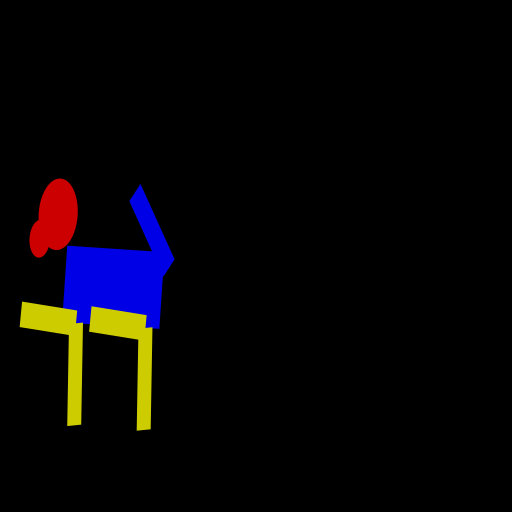

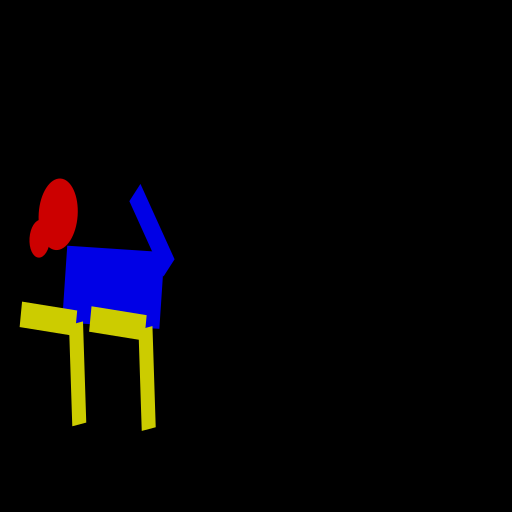

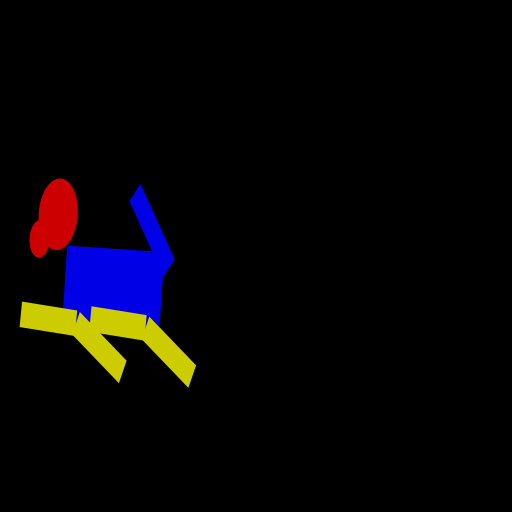

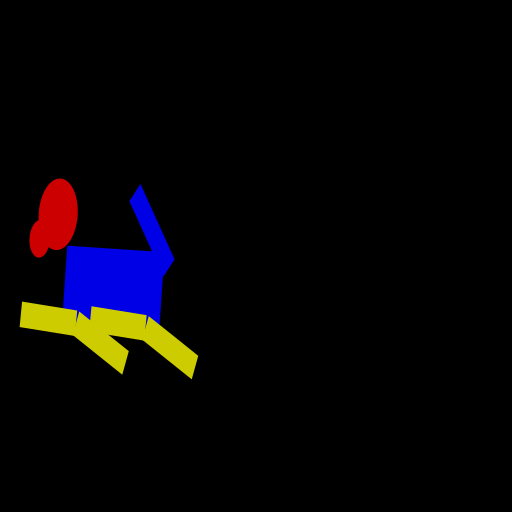

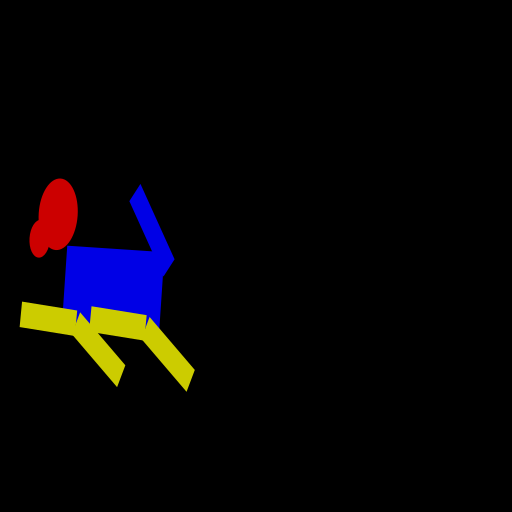

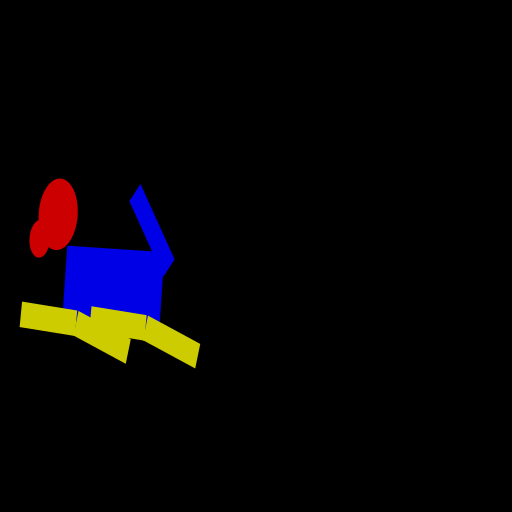

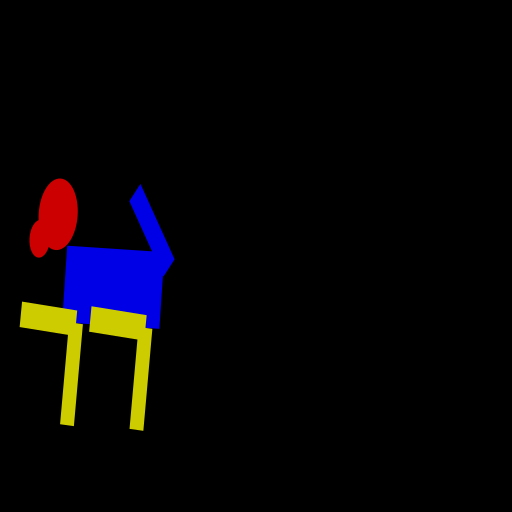

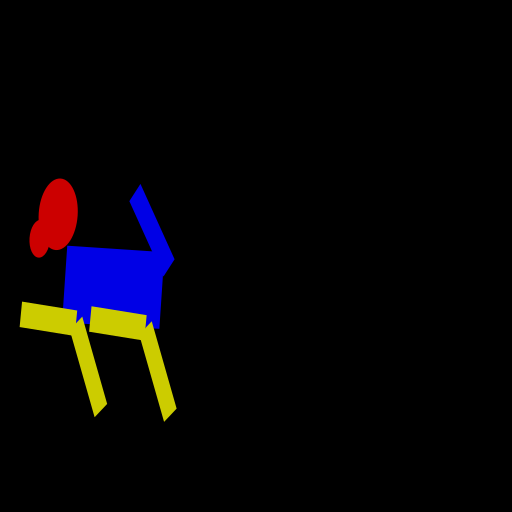

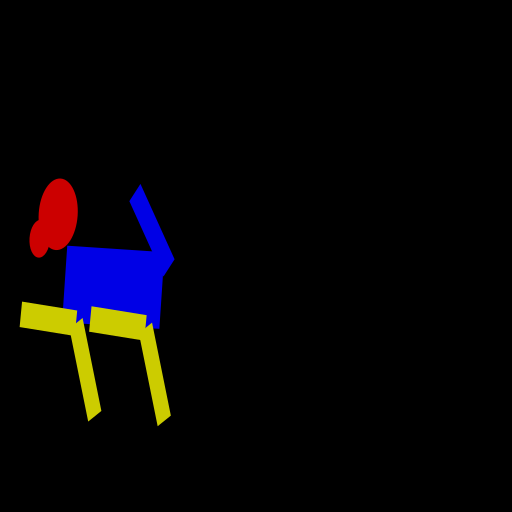

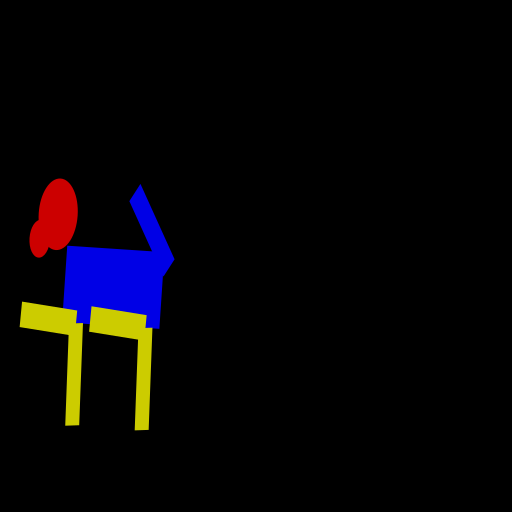

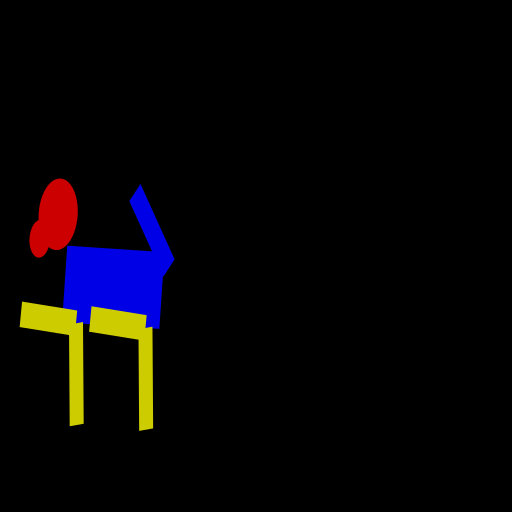

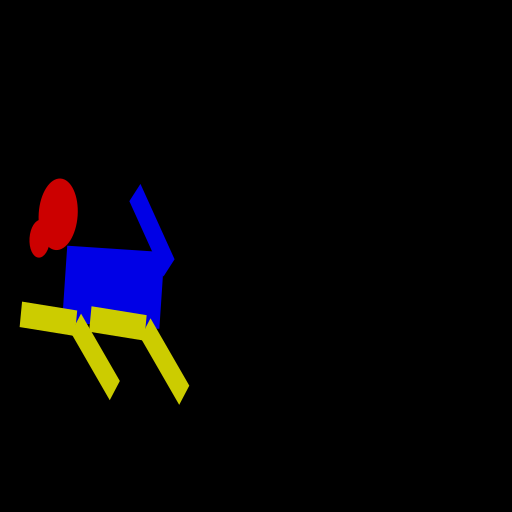

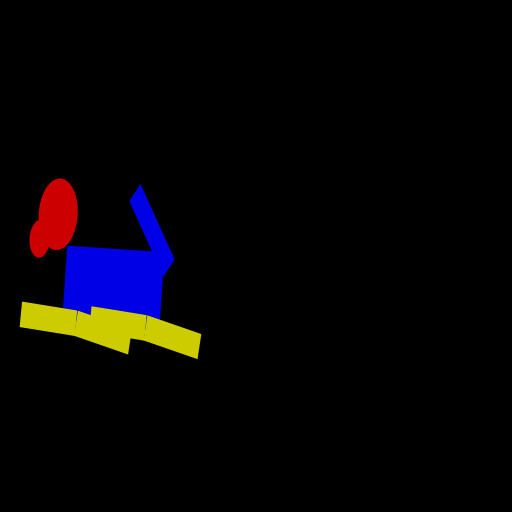

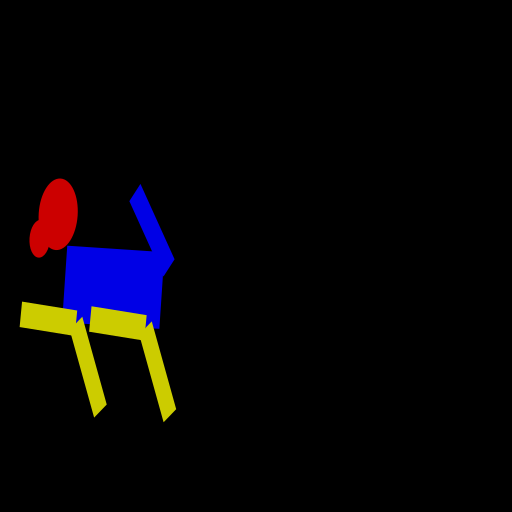

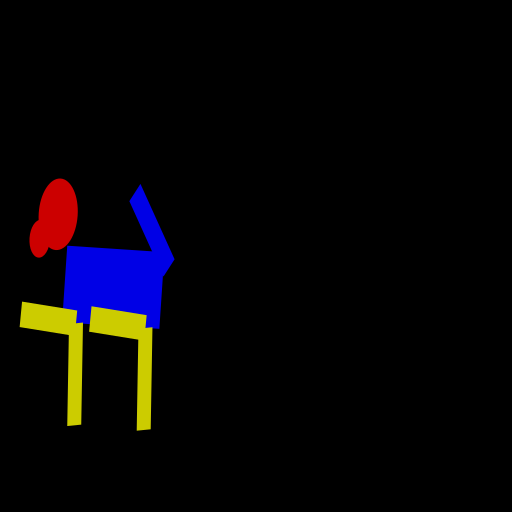

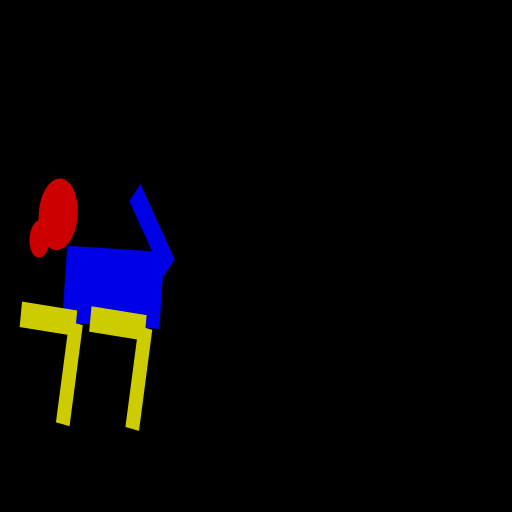

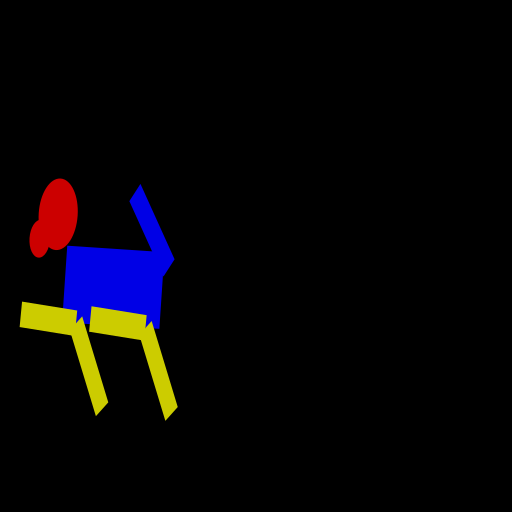

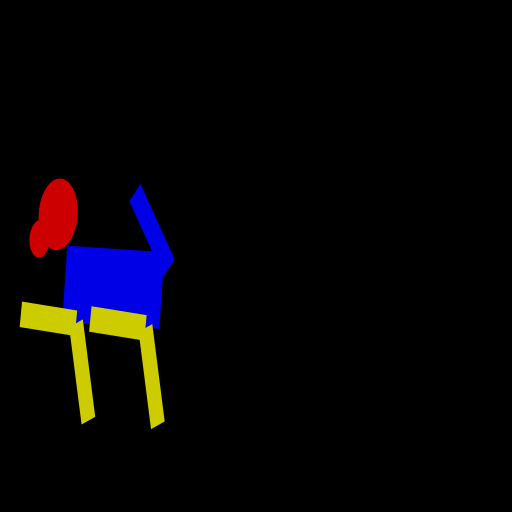

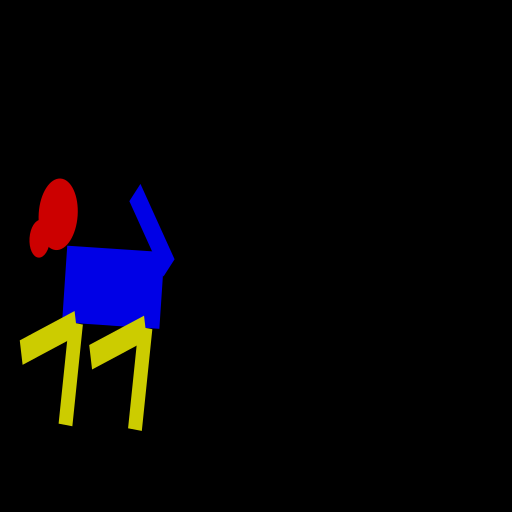

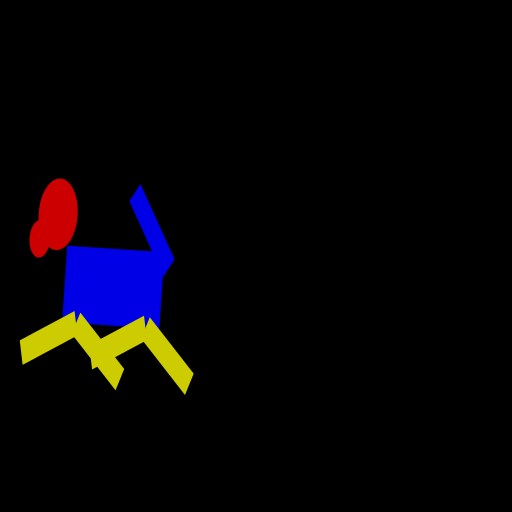

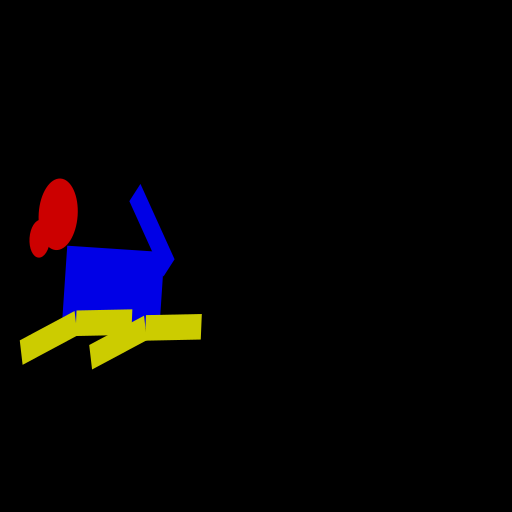

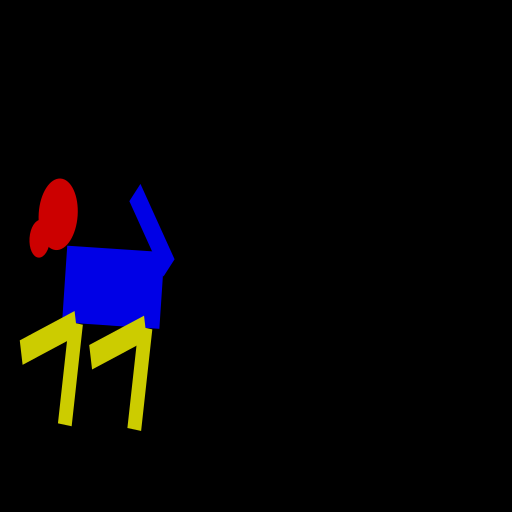

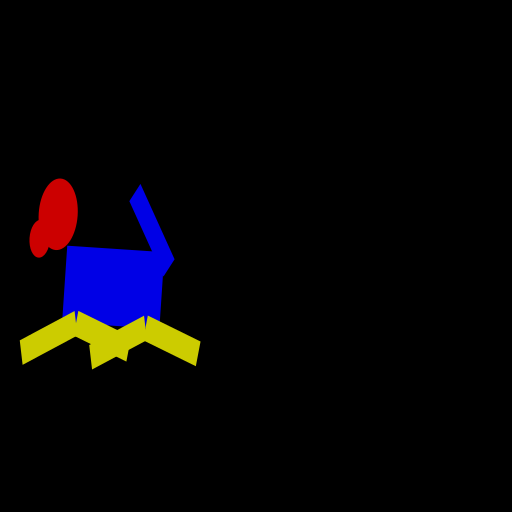

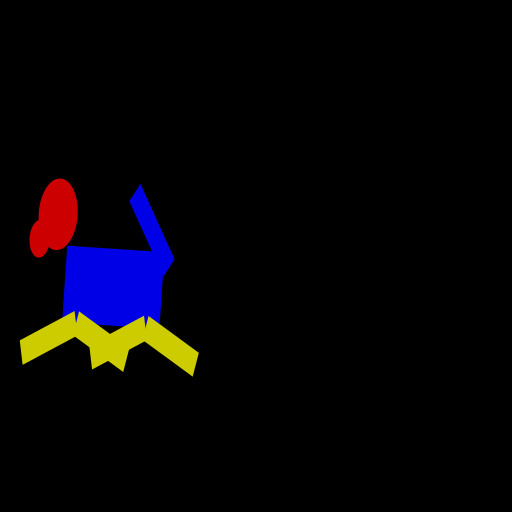

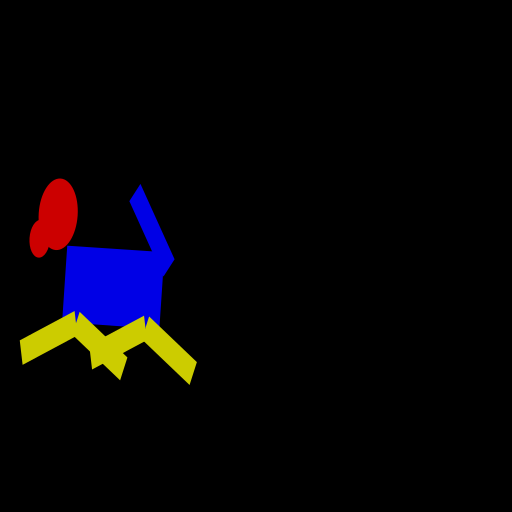

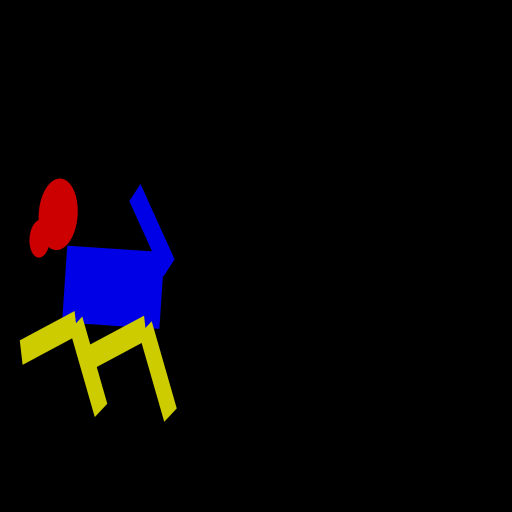

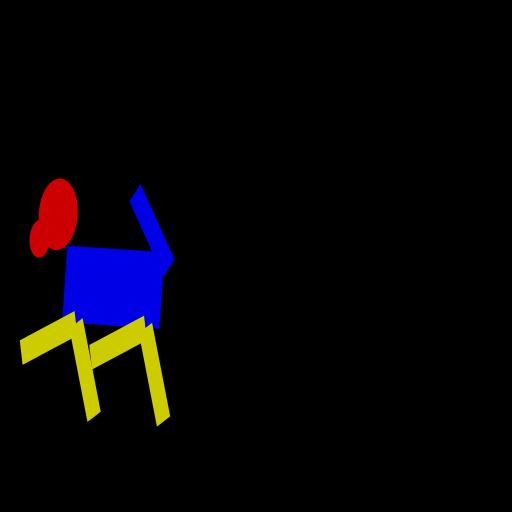

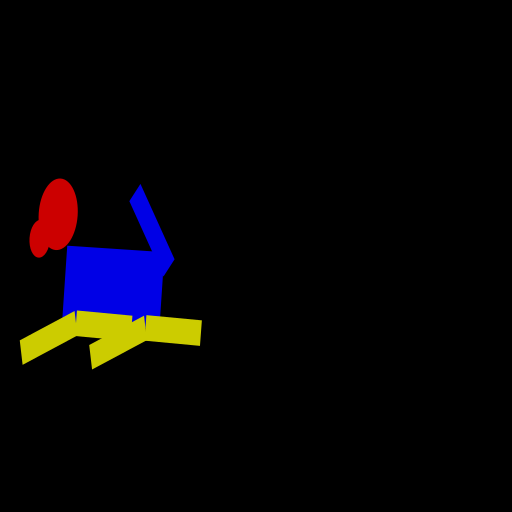

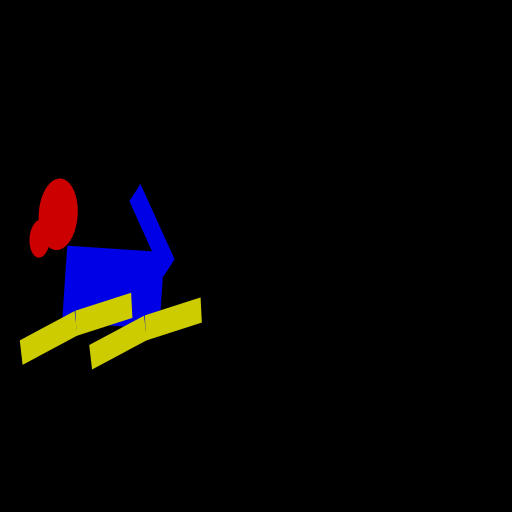

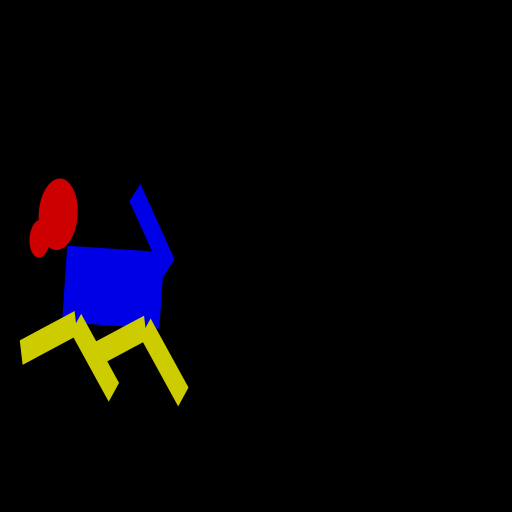

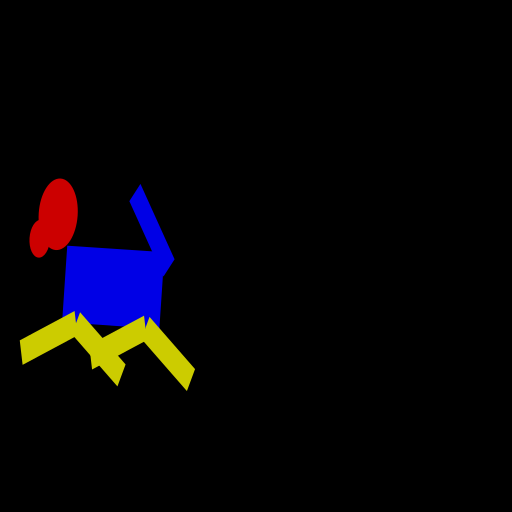

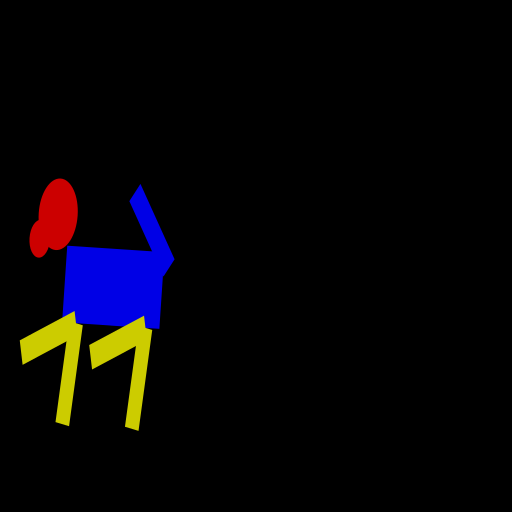

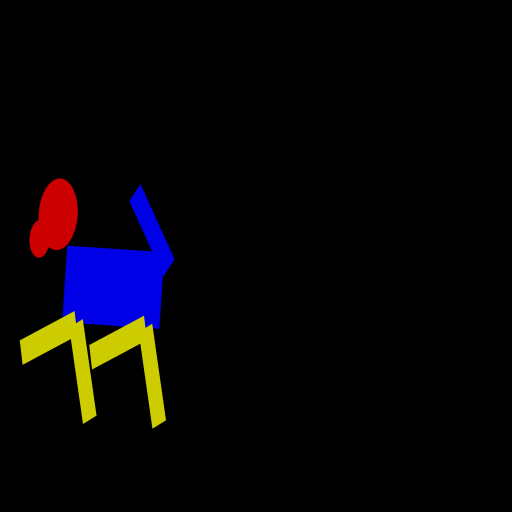

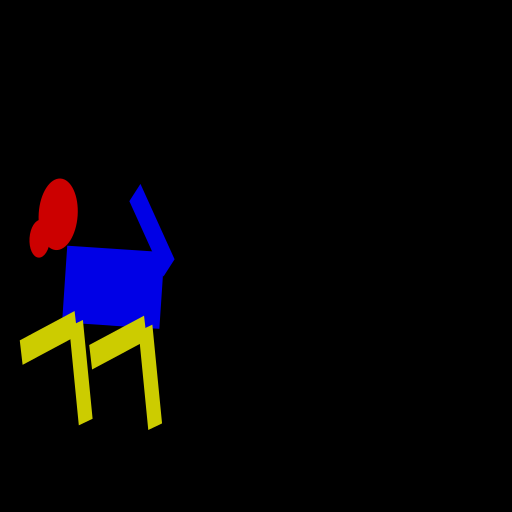

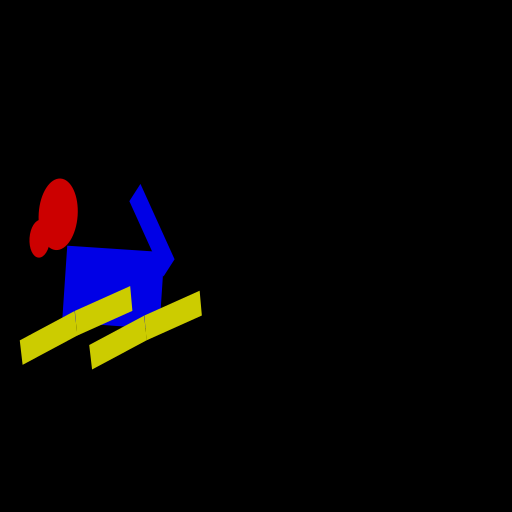

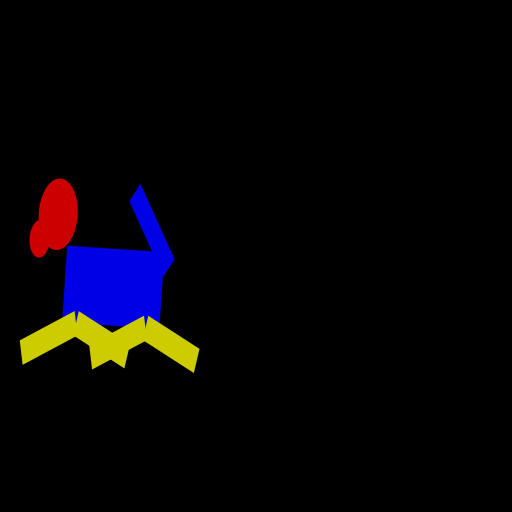

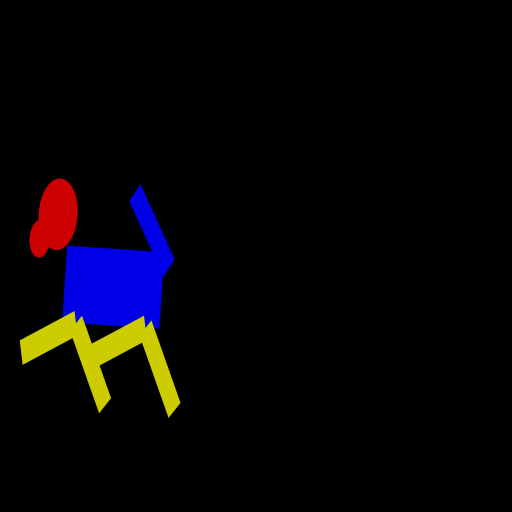

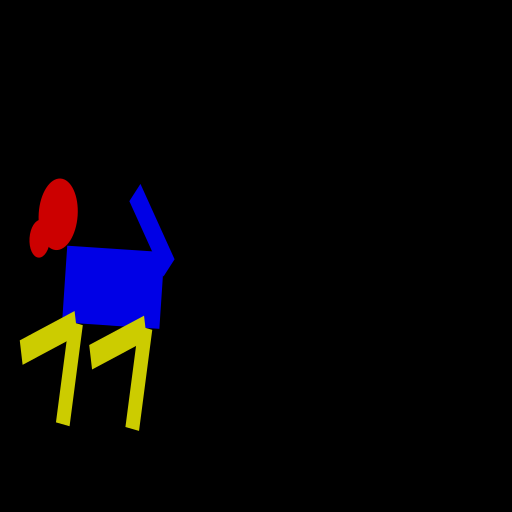

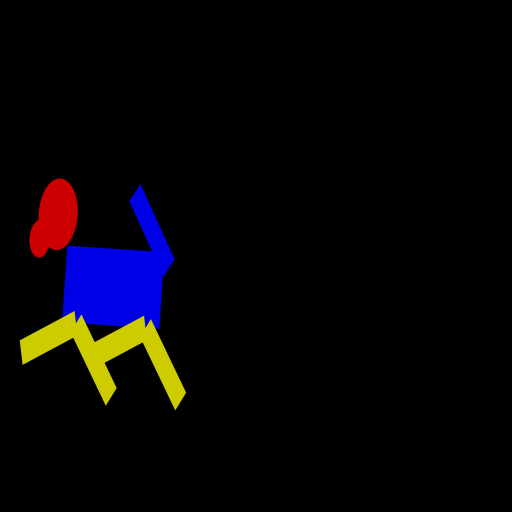

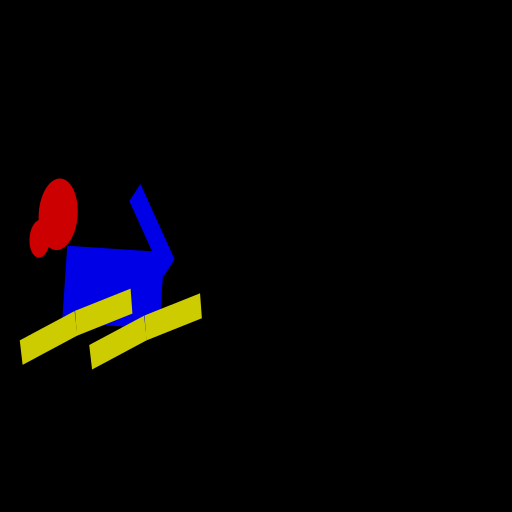

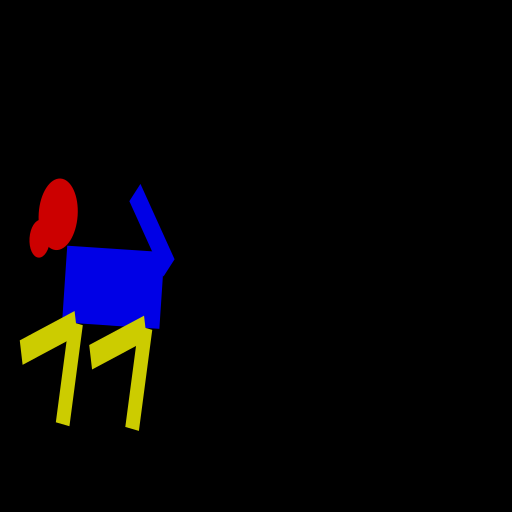

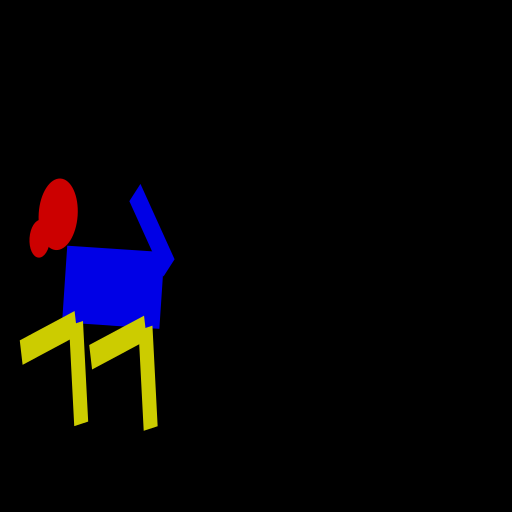

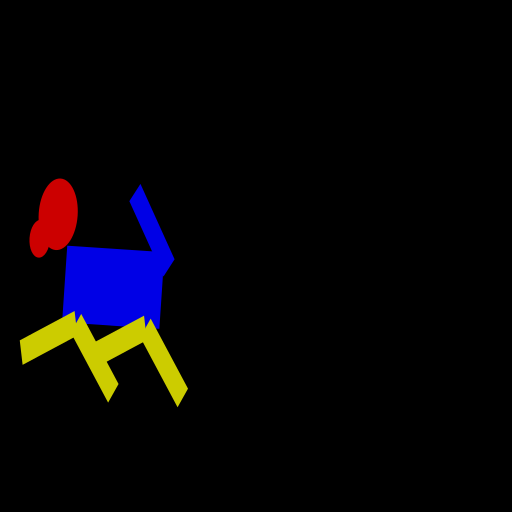

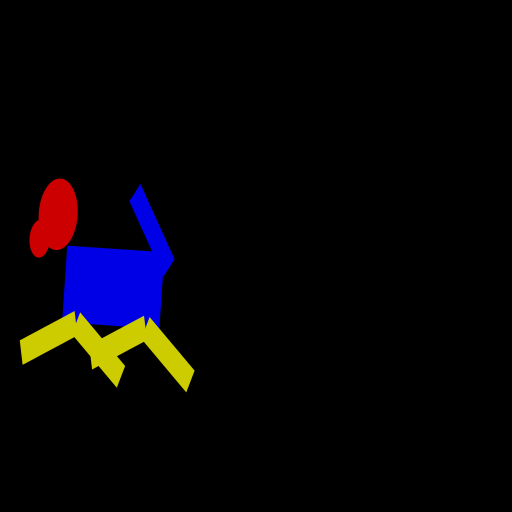

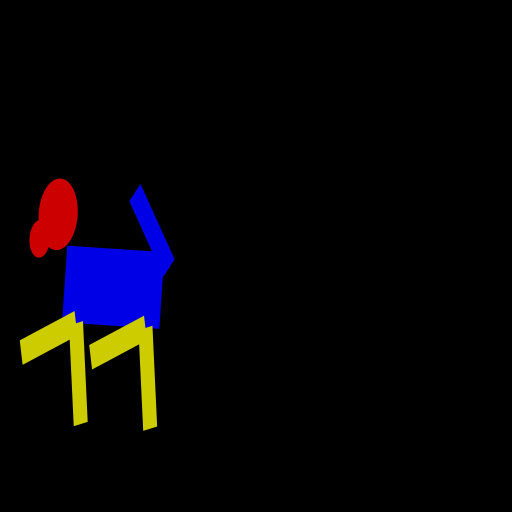

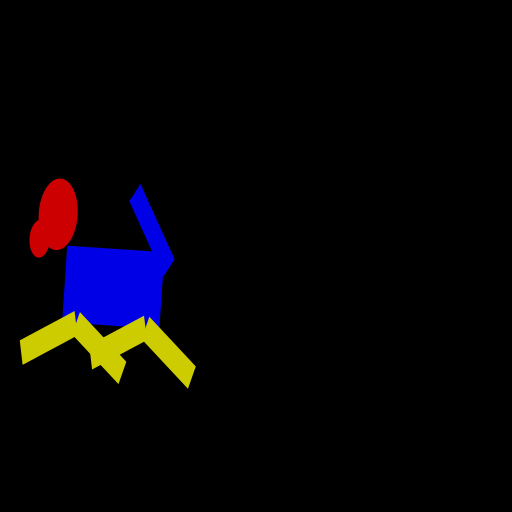

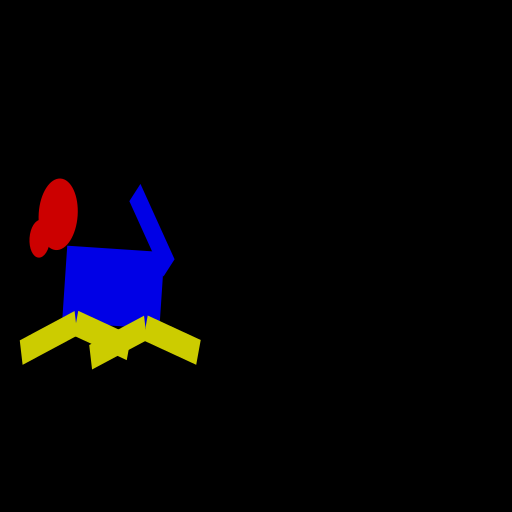

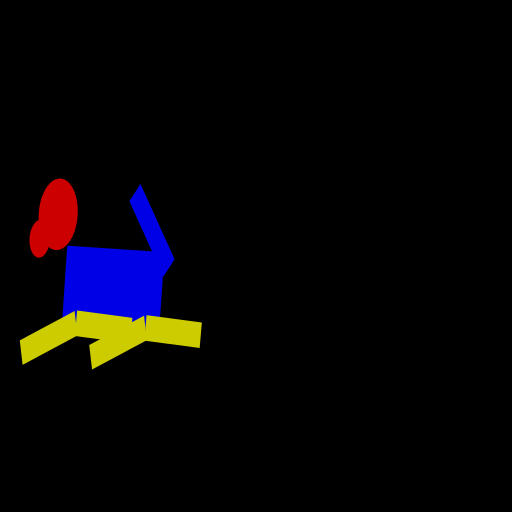

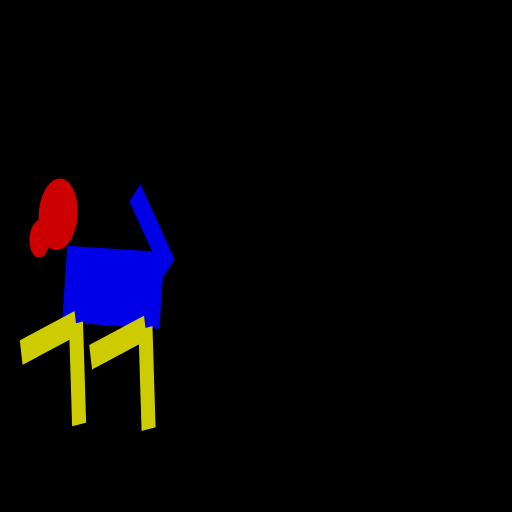

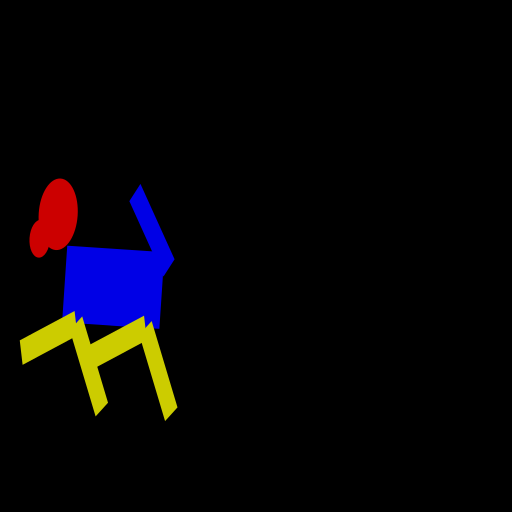

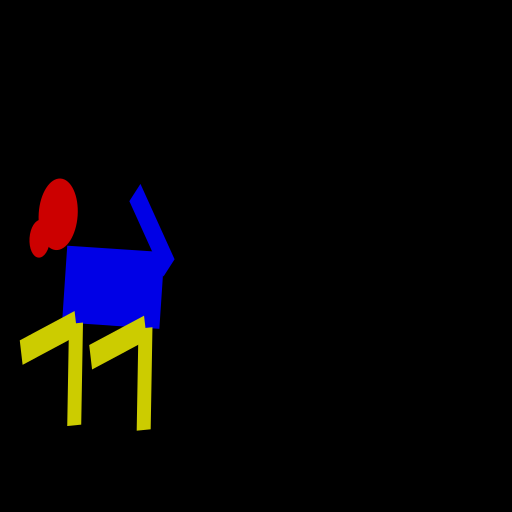

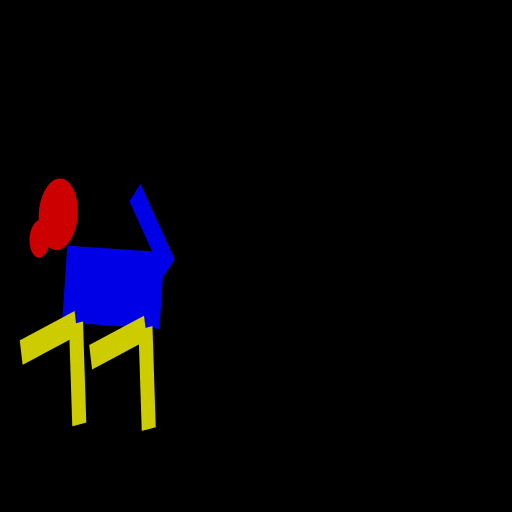

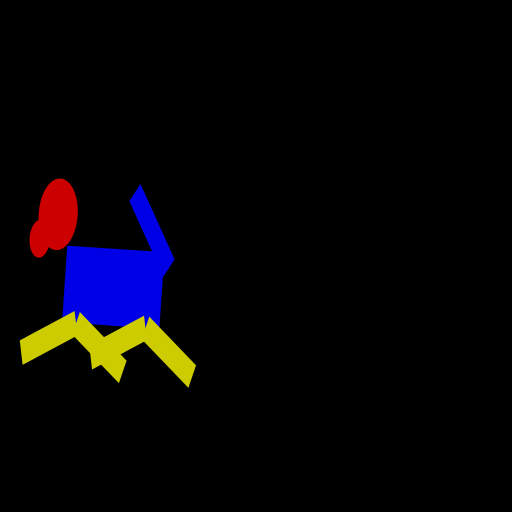

From cffi callback <function _make_write_func.<locals>.write_func at 0x7f4880a6ff28>:
Traceback (most recent call last):
  File "/home/jonathanemma/anaconda3/lib/python3.6/site-packages/cairocffi/surfaces.py", line 43, in write_func
    @ffi.callback("cairo_write_func_t", error=constants.STATUS_WRITE_ERROR)
KeyboardInterrupt


OSError: [Errno cairo returned CAIRO_STATUS_WRITE_ERROR: b'error while writing to output stream'] 11

In [12]:
d = dog()
d.generate_dog()